In [50]:
import pandas as pd
daily_data = pd.read_csv("/home/zyyuan/project1/try/out_market_data/20251017_SHFE_ag2512.csv")
daily_data[['bv1','av1','bv2','av2','bp1','ap1','bp2','ap2','volume']]
daily_data['hms'] = pd.to_datetime(daily_data['hms'])
ms_delta = pd.to_timedelta(daily_data['ms'], unit='ms')
daily_data['timestamp'] = daily_data['hms'] + ms_delta
daily_data['total_ask_amt'] = (
    daily_data['ap1'] * daily_data['av1'] + 
    daily_data['ap2'] * daily_data['av2']  
    # daily_data['ap3'] * daily_data['av3'] + 
    # daily_data['ap4'] * daily_data['av4'] + 
    # daily_data['ap5'] * daily_data['av5']
)
daily_data['total_ask_vol'] = daily_data[['av1', 'av2', 'av3', 'av4', 'av5']].sum(axis=1)
daily_data['total_ask_vol'] = daily_data[['av1', 'av2']].sum(axis=1)
# 计算加权 Ask Price
daily_data['vwap_ask'] = daily_data['total_ask_amt'] / daily_data['total_ask_vol']

# 2. 计算买方 (Bid) 的总挂单金额和总挂单量
daily_data['total_bid_amt'] = (
    daily_data['bp1'] * daily_data['bv1'] + 
    daily_data['bp2'] * daily_data['bv2'] 
    # daily_data['bp3'] * daily_data['bv3'] + 
    # daily_data['bp4'] * daily_data['bv4'] + 
    # daily_data['bp5'] * daily_data['bv5']
)
daily_data['total_bid_vol'] = daily_data[['bv1', 'bv2', 'bv3', 'bv4', 'bv5']].sum(axis=1)
daily_data['total_bid_vol'] = daily_data[['bv1', 'bv2']].sum(axis=1)
daily_data['vwap_bid'] = daily_data['total_bid_amt'] / daily_data['total_bid_vol']
daily_data['deep_spread'] = daily_data['vwap_ask'] - daily_data['vwap_bid']

# 可选：与 Level 1 Spread 做对比，观察流动性斜率
daily_data['l1_spread'] = daily_data['ap1'] - daily_data['bp1']
daily_data['l2_spread'] = daily_data['ap2'] - daily_data['bp2']
daily_data['l3_spread'] = daily_data['ap3'] - daily_data['bp3']
daily_data['l4_spread'] = daily_data['ap4'] - daily_data['bp4']
daily_data['l5_spread'] = daily_data['ap5'] - daily_data['bp5']
daily_data['liquidity_slope'] = daily_data['deep_spread'] - daily_data['l1_spread']
daily_data['mid_price'] = (daily_data['ap1']+daily_data['bp1'])/2
daily_data.loc[daily_data['bp1'] == 0, 'mid_price'] = daily_data.loc[daily_data['bp1'] == 0, 'ap1']
daily_data.loc[daily_data['ap1'] == 0, 'mid_price'] = daily_data.loc[daily_data['ap1'] == 0, 'bp1']
daily_data['vwap_300'] = (daily_data['turnover'].diff(600) / (daily_data['volume'].diff(600)*15)).shift(-600)
daily_data['label'] = (daily_data['vwap_300'] - daily_data['mid_price']).abs()
daily_data['deep_mean'] = daily_data['deep_spread'].rolling(120).mean()
daily_data['deep_std'] = daily_data['deep_spread'].rolling(120).std()
daily_data['upper_bound'] = daily_data['deep_mean'] + 2 * daily_data['deep_std']
daily_data['lower_bound'] = (daily_data['deep_mean'] - 2 * daily_data['deep_std']).clip(lower=0)
daily_data['deep_mean'].corr(daily_data['label'])

np.float64(0.17228700783154235)

In [59]:
main_data = pd.read_csv("/home/zyyuan/market_data_ag2512/20250918_SHFE_ag2512.csv")
second_data = pd.read_csv("/home/zyyuan/market_data_ag2512/20250918_SHFE_ag2512.csv")


In [60]:
main_data

,type,source,trade_day,action_day,inst,hms,ms,last,volume,bp1,...,ordercnt_ask2,ordercnt_bid3,ordercnt_ask3,ordercnt_bid4,ordercnt_ask4,ordercnt_bid5,ordercnt_ask5,bid_total_price,ask_total_price,depth
0,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 18:35:18,500,NaN,0,NaN,...,0,0,0,0,0,0,0,0,0,5
1,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 20:59:00,500,9924.0,979,9924.0,...,0,0,0,0,0,0,0,0,0,5
2,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 21:00:00,500,9937.0,1354,9930.0,...,0,0,0,0,0,0,0,0,0,5
3,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 21:00:01,0,9932.0,1715,9932.0,...,0,0,0,0,0,0,0,0,0,5
4,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 21:00:01,500,9934.0,1889,9930.0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62076,D,M,2025-09-18,2025-09-18,ag2512,2025-09-18 14:59:58,500,9837.0,646004,9835.0,...,0,0,0,0,0,0,0,0,0,5
62077,D,M,2025-09-18,2025-09-18,ag2512,2025-09-18 14:59:59,0,9837.0,646013,9835.0,...,0,0,0,0,0,0,0,0,0,5
62078,D,M,2025-09-18,2025-09-18,ag2512,2025-09-18 14:59:59,500,9837.0,646016,9837.0,...,0,0,0,0,0,0,0,0,0,5
62079,D,M,2025-09-18,2025-09-18,ag2512,2025-09-18 15:00:00,0,9835.0,646031,9835.0,...,0,0,0,0,0,0,0,0,0,5


In [21]:
for window in [30,60,120,300,600]:
    daily_data['l1_spread_mean'] = daily_data['l1_spread'].rolling(window).mean()
    print(window,daily_data['l1_spread_mean'].corr(daily_data['label']))

30 0.1539219180617222
60 0.17909375724037824
120 0.19852821459236253
300 0.1700030494325321
600 0.15099356477015535


In [25]:
for window in [30,60,120,300,600]:
    daily_data['deep_mean'] = daily_data['deep_spread'].rolling(window).mean()
    print(window,daily_data['deep_mean'].corr(daily_data['label']))

30 0.12794531099632922
60 0.1522686316631747
120 0.17228700783154235
300 0.15213501621944106
600 0.13768499835706047


In [28]:
for window in [30,60,120,300,600]:
    daily_data['sweep_mean'] = daily_data['sweep_spread'].rolling(window).mean()
    print(window,daily_data['sweep_mean'].corr(daily_data['label']))

30 0.12661274767465439
60 0.1430025819873198
120 0.15544633854841247
300 0.13506514200919897
600 0.11947536598619538


In [27]:
def calculate_sweep_cost(row, target_vol=10, side='ask'):
    """
    计算吃掉 target_vol 手单子的加权平均价格
    """
    remains = target_vol
    total_cost = 0
    
    # 遍历 5 档
    for i in range(1, 6):
        p = row[f'{side}p{i}']
        v = row[f'{side}v{i}']
        
        take = min(remains, v)
        total_cost += take * p
        remains -= take
        
        if remains <= 0:
            break
            
    # 如果 5 档吃完还不够 (说明流动性枯竭)，用最后一档价格填补剩余
    # 或者返回 NaN 表示无法在该深度成交
    if remains > 0:
        total_cost += remains * row[f'{side}p5'] 
        
    return total_cost / target_vol
daily_data['ask_sweep_price'] = daily_data.apply(lambda x: calculate_sweep_cost(x, target_vol=20, side='a'), axis=1)
daily_data['bid_sweep_price'] = daily_data.apply(lambda x: calculate_sweep_cost(x, target_vol=20, side='b'), axis=1)
daily_data['sweep_spread'] = daily_data['ask_sweep_price'] - daily_data['bid_sweep_price']
daily_data['sweep_spread'].describe()

count    66588.000000
mean         2.006066
std          0.818509
min          1.000000
25%          1.450000
50%          1.950000
75%          2.400000
max         17.200000
Name: sweep_spread, dtype: float64

In [70]:
import numpy as np
daily_data['trade_qty'] = daily_data['volume'].diff().fillna(0.0)
window_size = 20
daily_data['dynamic_target_size'] = daily_data['trade_qty'].rolling(window=window_size).sum()
def get_weighted_price(row, price_cols, vol_cols, target_vol):
    """
    row: 单行数据
    price_cols: ['ap1', 'ap2'...]
    vol_cols: ['av1', 'av2'...]
    target_vol: 本次需要吃掉的量
    """
    remains = target_vol
    total_cost = 0
    
    # 遍历 5 档
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        
        take = min(remains, v)     # 能吃多少吃多少
        total_cost += take * p
        remains -= take
        
        if remains <= 0:
            break
    
    # 【惩罚机制】如果 5 档全吃完还不够
    # 实际场景下这代表流动性击穿。我们假设剩下的量在第 5 档价格基础上再加价成交
    if remains > 0:
        # 假设惩罚价格是第5档价格 + 2个 tick (模拟更深层的冲击)
        penalty_price = row[price_cols[-1]] + 0.2 
        total_cost += remains * penalty_price
        
    return total_cost / target_vol
ask_prices = [f'ap{i}' for i in range(1, 6)]
ask_vols = [f'av{i}' for i in range(1, 6)]

daily_data['dynamic_ask_price'] = daily_data.apply(
    lambda x: get_weighted_price(x, ask_prices, ask_vols, x['dynamic_target_size']/40), 
    axis=1
)
bid_prices = [f'bp{i}' for i in range(1, 6)]
bid_vols = [f'bv{i}' for i in range(1, 6)]

daily_data['dynamic_bid_price'] = daily_data.apply(
    lambda x: get_weighted_price(x, bid_prices, bid_vols, x['dynamic_target_size']/40), 
    axis=1
)
daily_data['dynamic_spread'] = daily_data['dynamic_ask_price'] - daily_data['dynamic_bid_price']
daily_data['dynamic_spread'].describe()

count    66570.000000
mean         1.942589
std          1.025883
min          1.000000
25%          1.037037
50%          1.782982
75%          2.332220
max         18.624119
Name: dynamic_spread, dtype: float64

In [52]:
for window in [30,60,120,300,600]:
    daily_data['dynamic_mean'] = daily_data['dynamic_spread'].rolling(window).mean()
    print(window,daily_data['dynamic_mean'].corr(daily_data['label']))

30 0.17595592280591188
60 0.18689552006460605
120 0.19211740643572534
300 0.15845092755815052
600 0.12795747709448202


In [ ]:
bid_prices = [f'bp{i}' for i in range(1, 6)]
bid_vols = [f'bv{i}' for i in range(1, 6)]

daily_data['dynamic_bid_price'] = daily_data.apply(
    lambda x: get_weighted_price(x, bid_prices, bid_vols, x['dynamic_target_size']/2), 
    axis=1
)

In [41]:
import pandas as pd
import os
import glob

# ================= 配置区域 =================
# 请将此处替换为您实际的文件夹路径
folder_main = '/home/zyyuan/market_data_ag2512'    # 主力合约文件夹路径
folder_second = '/home/zyyuan/market_data_ag2604' # 不活跃合约文件夹路径

# 假设文件是CSV格式，如果不是请修改后缀，例如 '*.xlsx'
file_pattern = '*.csv' 
import numpy as np

def get_weighted_price(row, price_cols, vol_cols, target_vol):
    """
    row: 单行数据
    price_cols: ['ap1', 'ap2'...]
    vol_cols: ['av1', 'av2'...]
    target_vol: 本次需要吃掉的量
    """
    # =======================================================
    # [修改点] 处理目标量 <= 0 (或 NaN) 的情况
    # 此时直接返回该方向的第一档价格 (L1 Price)
    # =======================================================
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]
    # if target_vol<5:
    #     target_vol = 5
    remains = target_vol
    total_cost = 0
    
    # 遍历 5 档
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        if np.isnan(p) or np.isnan(v):
            continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        
        if remains <= 0:
            break
    
    if remains > 0:
        last_price = row[price_cols[-1]]
        is_ask = row[price_cols[0]] < row[price_cols[-1]]
        
        if is_ask:
            penalty_price = last_price + 2
        else:
            penalty_price = last_price - 2
            
        total_cost += remains * penalty_price    
    return total_cost / target_vol


def load_and_process_folder(folder_path, label_desc):
    """
    读取指定文件夹下所有文件，并应用Timestamp计算逻辑
    返回：包含该文件夹下所有数据的合并后的DataFrame
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    data_list = []
    
    print(f"正在处理 {label_desc}，共发现 {len(file_list)} 个文件...")
    
    for file_path in file_list:
        try:
            # 1. 读取数据
            df = pd.read_csv(file_path)
            df['hms'] = pd.to_datetime(df['hms'])
            ms_delta = pd.to_timedelta(df['ms'], unit='ms')
            df['timestamp'] = df['hms'] + ms_delta
            df['l1_spread'] = df['ap1'] - df['bp1']
            df['l2_spread'] = df['ap2'] - df['bp2']
            df['l3_spread'] = df['ap3'] - df['bp3']
            df['l4_spread'] = df['ap4'] - df['bp4']
            df['l5_spread'] = df['ap5'] - df['bp5']
            df['mid_price'] = (df['ap1']+df['bp1'])/2
            df['total_ask_amt'] = (
                df['ap1'] * df['av1'] + 
                df['ap2'] * df['av2'] +
                df['ap3'] * df['av3'] + 
                df['ap4'] * df['av4'] + 
                df['ap5'] * df['av5']
            )
            df['total_ask_vol'] = df[['av1', 'av2', 'av3', 'av4', 'av5']].sum(axis=1)
            df['vwap_ask'] = df['total_ask_amt'] / df['total_ask_vol'].replace(0.0,np.nan)
            df['total_bid_amt'] = (
                df['bp1'] * df['bv1'] + 
                df['bp2'] * df['bv2'] +
                df['bp3'] * df['bv3'] + 
                df['bp4'] * df['bv4'] + 
                df['bp5'] * df['bv5']
            )
            df['total_bid_vol'] = df[['bv1', 'bv2', 'bv3', 'bv4', 'bv5']].sum(axis=1)
            df['vwap_bid'] = df['total_bid_amt'] / df['total_bid_vol'].replace(0.0,np.nan)
            df['deep_spread'] = df['vwap_ask'] - df['vwap_bid']
            df.loc[df['bp1'] == 0, 'mid_price'] = df.loc[df['bp1'] == 0, 'ap1']
            df.loc[df['ap1'] == 0, 'mid_price'] = df.loc[df['ap1'] == 0, 'bp1']
            df['vwap_300'] = (df['turnover'].diff(600) / (df['volume'].diff(600).replace(0,np.nan)*15)).shift(-600)
            df['label'] = (df['vwap_300'] - df['mid_price']).abs()
            df['trade_qty'] = df['volume'].diff().fillna(0.0)
            window_size = 60
            df['dynamic_target_size'] = df['trade_qty'].rolling(window=window_size).sum() 
            ask_prices = [f'ap{i}' for i in range(1, 6)]
            ask_vols = [f'av{i}' for i in range(1, 6)]
            # df['dynamic_ask_price'] = df.apply(
            #     lambda x: get_weighted_price(x, ask_prices, ask_vols, x['dynamic_target_size']/120), 
            #     axis=1
            # )
            # bid_prices = [f'bp{i}' for i in range(1, 6)]
            # bid_vols = [f'bv{i}' for i in range(1, 6)]

            # df['dynamic_bid_price'] = df.apply(
            #     lambda x: get_weighted_price(x, bid_prices, bid_vols, x['dynamic_target_size']/120), 
            #     axis=1
            # )
            # df['dynamic_spread_1tick'] = df['dynamic_ask_price'] - df['dynamic_bid_price']
            # df['dynamic_ask_price'] = df.apply(
            #     lambda x: get_weighted_price(x, ask_prices, ask_vols, x['dynamic_target_size']/12), 
            #     axis=1
            # )
            # bid_prices = [f'bp{i}' for i in range(1, 6)]
            # bid_vols = [f'bv{i}' for i in range(1, 6)]

            # df['dynamic_bid_price'] = df.apply(
            #     lambda x: get_weighted_price(x, bid_prices, bid_vols, x['dynamic_target_size']/12), 
            #     axis=1
            # )
            # df['dynamic_spread_10tick'] = df['dynamic_ask_price'] - df['dynamic_bid_price']
            # df['dynamic_ask_price'] = df.apply(
            #     lambda x: get_weighted_price(x, ask_prices, ask_vols, x['dynamic_target_size']/20), 
            #     axis=1
            # )
            # bid_prices = [f'bp{i}' for i in range(1, 6)]
            # bid_vols = [f'bv{i}' for i in range(1, 6)]

            # df['dynamic_bid_price'] = df.apply(
            #     lambda x: get_weighted_price(x, bid_prices, bid_vols, x['dynamic_target_size']/20), 
            #     axis=1
            # )
            # df['dynamic_spread_6tick'] = df['dynamic_ask_price'] - df['dynamic_bid_price']
            df['dynamic_orderflow'] = df['dynamic_target_size']/60
            df.loc[df['dynamic_orderflow']<3,'dynamic_orderflow'] = 3
            df['dynamic_ask_price'] = df.apply(
                lambda x: get_weighted_price(x, ask_prices, ask_vols, x['dynamic_orderflow']), 
                axis=1
            )
            bid_prices = [f'bp{i}' for i in range(1, 6)]
            bid_vols = [f'bv{i}' for i in range(1, 6)]

            df['dynamic_bid_price'] = df.apply(
                lambda x: get_weighted_price(x, bid_prices, bid_vols, x['dynamic_orderflow']), 
                axis=1
            )
            df['dynamic_spread_2tick'] = df['dynamic_ask_price'] - df['dynamic_bid_price']
            df['l1_spread_mean'] = df['l1_spread'].rolling(120).mean()
            # df['dynamic_mean_1tick'] = df['dynamic_spread_1tick'].rolling(120).mean()
            # df['dynamic_mean_10tick'] = df['dynamic_spread_10tick'].rolling(120).mean()
            # df['dynamic_mean_6tick'] = df['dynamic_spread_6tick'].rolling(120).mean()
            df['dynamic_mean_2tick'] = df['dynamic_spread_2tick'].rolling(120).mean()
            df['deep_spread_mean'] = df['deep_spread'].rolling(120).mean()
            data_list.append(df)
            
        except Exception as e:
            print(f"读取文件出错 {file_path}: {e}")
            
    if data_list:
        # 将该文件夹下所有处理好的数据纵向合并
        total_df = pd.concat(data_list, ignore_index=True)
        return total_df
    else:
        return pd.DataFrame()

# ================= 主程序 =================
if __name__ == "__main__":
    
    # 第一步：分别获得两个处理好的大表
    print(">>> 阶段1：读取主力合约数据")
    df_main_total = load_and_process_folder(folder_main, "主力合约")
    
    print("\n>>> 阶段2：读取不活跃合约数据")
    df_second_total = load_and_process_folder(folder_second, "不活跃合约")
    
    # 检查数据是否读取成功
    if not df_main_total.empty and not df_second_total.empty:
        
        print(f"\n>>> 阶段3：开始合并 (主力: {len(df_main_total)} 行, 不活跃: {len(df_second_total)} 行)")
        final_merged_df = pd.merge(
            df_main_total, 
            df_second_total, 
            on='timestamp', 
            suffixes=('_main', '_second'),
            how='inner' 
        )
        
        print("合并完成！")
        print(final_merged_df.head())
        print(f"最终总行数: {len(final_merged_df)}")
        
    else:
        print("错误：其中一个文件夹未读取到数据，无法合并。")

>>> 阶段1：读取主力合约数据
正在处理 主力合约，共发现 35 个文件...

>>> 阶段2：读取不活跃合约数据
正在处理 不活跃合约，共发现 35 个文件...

>>> 阶段3：开始合并 (主力: 2255563 行, 不活跃: 2070547 行)
合并完成！
  type_main source_main trade_day_main action_day_main inst_main  \
0         D           M     2025-10-13      2025-10-10    ag2512   
1         D           M     2025-10-13      2025-10-10    ag2512   
2         D           M     2025-10-13      2025-10-10    ag2512   
3         D           M     2025-10-13      2025-10-10    ag2512   
4         D           M     2025-10-13      2025-10-10    ag2512   

             hms_main  ms_main  last_main  volume_main  bp1_main  ...  \
0 2025-10-10 18:39:24      500        NaN            0       NaN  ...   
1 2025-10-10 20:59:00      500    11189.0          924   11186.0  ...   
2 2025-10-10 21:00:00      500    11168.0         1448   11168.0  ...   
3 2025-10-10 21:00:01        0    11185.0         2228   11180.0  ...   
4 2025-10-10 21:00:01      500    11179.0         2646   11174.0  ...   

   label_second

In [48]:
import pandas as pd
import numpy as np
import os
import glob

# ================= 配置区域 =================
folder_main = '/home/zyyuan/market_data_ag2512'    # 主力合约文件夹路径
folder_second = '/home/zyyuan/market_data_ag2604' # 不活跃合约文件夹路径
file_pattern = '*.csv' 

# ================= 辅助函数 =================
def get_weighted_price(row, price_cols, vol_cols, target_vol):
    """
    计算吃掉 target_vol 量后的加权均价
    """
    # 处理无效目标量
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]

    remains = target_vol
    total_cost = 0
    
    # 遍历 5 档
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        
        if np.isnan(p) or np.isnan(v):
            continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        
        if remains <= 0:
            break
    
    # 惩罚机制
    if remains > 0:
        last_price = row[price_cols[-1]]
        # 简单判断方向: Ask通常价格递增(L1<L5), Bid通常价格递减(L1>L5)
        # 这里严谨一点判断
        is_ask = row[price_cols[0]] < row[price_cols[-1]]
        
        if is_ask:
            penalty_price = last_price + 2  # 卖方深度击穿，价格更高
        else:
            penalty_price = last_price - 2  # 买方深度击穿，价格更低
            
        total_cost += remains * penalty_price    
        
    return total_cost / target_vol

def get_weighted_price_new(row, price_cols, vol_cols, target_vol):
    """
    计算吃掉 target_vol 量后的加权均价
    改进点：当击穿5档时，根据当前盘口密度线性外推剩余量的冲击成本
    """
    # 1. 边界条件处理
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]

    remains = target_vol
    total_cost = 0
    filled_vol = 0 # 记录前5档实际吃掉的量
    
    # 2. 遍历 5 档撮合
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        
        if np.isnan(p) or np.isnan(v):
            continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        filled_vol += take
        
        if remains <= 0:
            break
    
    # 3. 【精细化惩罚机制】处理击穿情况
    if remains > 0:
        p1 = row[price_cols[0]]
        p5 = row[price_cols[-1]]
        last_price = p5
        
        # 判断方向 (Ask: P1 < P5, Bid: P1 > P5)
        # 兼容有时候 P1=P5 的情况
        if row[price_cols[0]] < row[price_cols[-1]]:
            is_ask = True # 买入，推高价格
        elif row[price_cols[0]] > row[price_cols[-1]]:
            is_ask = False # 卖出，打压价格
        else:
            # 如果5档价格都一样（极罕见），默认 Ask
            is_ask = True 

        # --- 核心改进：计算流动性斜率 ---
        
        # A. 计算当前5档内的价格跨度 (Price Span)
        price_span = abs(p5 - p1)
        
        # B. 防止除以零：如果5档价格全相同(span=0)或成交量极小
        # 我们设定一个最小的“隐含”跨度，比如 1.0 (假设至少跨越1个单位价格)
        # 或者设为 1个最小跳动点 (Tick Size)，这里假设数据未归一化，用 1.0 或 0.2 做保底
        min_tick = 1.0 
        if price_span < 1e-6:
            price_span = min_tick 
            
        # C. 计算流动性密度 (Density): 每单位价格能容纳多少量
        # 避免 filled_vol 为 0 (虽然极不可能)
        valid_filled_vol = max(filled_vol, 1.0) 
        density = valid_filled_vol / price_span 
        
        # D. 计算剩余量需要的额外滑点 (Additional Slippage)
        # 公式: 需要滑动的价格 = 剩余量 / 密度
        required_slippage = remains / density
        
        # E. 计算剩余部分的加权均价
        # 假设剩余部分的价格分布是从 P5 (加一个Tick) 开始，线性延伸到 P5 + Slippage
        # 平均价格 ≈ 起点 + 滑点/2
        # 我们给起点加一个 min_tick，代表必须跨过第5档才能成交
        avg_slippage = min_tick + (required_slippage / 2)
        
        if is_ask:
            penalty_price = last_price + avg_slippage
        else:
            penalty_price = last_price - avg_slippage
            
        total_cost += remains * penalty_price
        
    return total_cost / target_vol

def get_weighted_price_robust(row, price_cols, vol_cols, target_vol):
    """
    计算吃掉 target_vol 量后的加权均价 (Robust Version)
    改进点：使用平方根阻尼模型替代线性外推，防止高波动下估值过高。
    """
    # 1. 边界条件处理
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]

    remains = target_vol
    total_cost = 0
    filled_vol = 0
    
    # 2. 遍历 5 档撮合
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        
        if np.isnan(p) or np.isnan(v):
            continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        filled_vol += take
        
        if remains <= 0:
            break
    
    # 3. 【改进后的惩罚机制】处理击穿情况
    if remains > 0:
        p1 = row[price_cols[0]]
        p5 = row[price_cols[-1]]
        last_price = p5
        
        # 判断方向
        if row[price_cols[0]] < row[price_cols[-1]]:
            is_ask = True
        elif row[price_cols[0]] > row[price_cols[-1]]:
            is_ask = False
        else:
            is_ask = True # 默认

        # --- 新算法：平方根阻尼冲击 ---
        
        # A. 计算当前5档的 "深度宽度" (Width)
        # 用 P5和P1的差值代表当前盘口对于一定量的承载能力
        current_width = abs(p5 - p1)
        
        # B. 基础修正：如果前5档特别平（比如都在一个价位），给一个最小宽度
        min_width = 1.0 # 假设最小变动价位是 1.0 (根据您的合约调整，如白银是1)
        if current_width < 1e-6:
            current_width = min_width

        # C. 计算 "相对击穿倍数" (Impact Ratio)
        # 看看剩余的量 (remains) 是前5档总承载量 (filled_vol) 的多少倍
        # 为了防止 filled_vol 为0 (极罕见)，加个极小值
        total_depth_5 = max(filled_vol, 1.0)
        ratio = remains / total_depth_5
        
        # D. 计算额外冲击 (Extra Slippage)
        # 公式： 额外滑点 = 当前5档宽度 * sqrt(相对倍数) * 敏感度系数
        # sqrt: 抑制线性增长，防止量大时价格飞天
        # 敏感度系数 (0.5): 经验参数，假设5档外的流动性没那么差，稍微打个折
        sensitivity = 0.5 
        
        extra_slippage = current_width * np.sqrt(ratio) * sensitivity
        
        # E. 【安全截断】(Safety Cap)
        # 强制限制最大滑点不超过一定数值（防止数据错误导致的离谱值）
        # 例如：限制最大不超过 5倍的当前宽度 或 20个固定点位
        max_slippage = max(current_width * 5.0, 20.0) 
        extra_slippage = min(extra_slippage, max_slippage)
        
        # F. 计算剩余部分的均价
        # 假设剩余部分成交均价为 P5 偏移 extra_slippage / 2 (梯形面积近似)
        avg_price_deviation = min_width + (extra_slippage / 2)
        
        if is_ask:
            penalty_price = last_price + avg_price_deviation
        else:
            penalty_price = last_price - avg_price_deviation
            
        total_cost += remains * penalty_price
        
    return total_cost / target_vol

def process_single_file_basic(file_path):
    """
    读取单日文件并计算【基础指标】，不包含依赖跨日调整的逻辑
    """
    try:
        df = pd.read_csv(file_path)
        
        # --- 1. 时间处理 ---
        df['hms'] = pd.to_datetime(df['hms'])
        ms_delta = pd.to_timedelta(df['ms'], unit='ms')
        df['timestamp'] = df['hms'] + ms_delta
        
        # --- 2. 基础价差与中间价 ---
        df['l1_spread'] = df['ap1'] - df['bp1']
        df['mid_price'] = (df['ap1'] + df['bp1']) / 2
        # 修正涨跌停
        df.loc[df['bp1'] == 0, 'mid_price'] = df.loc[df['bp1'] == 0, 'ap1']
        df.loc[df['ap1'] == 0, 'mid_price'] = df.loc[df['ap1'] == 0, 'bp1']
        df['vwap_300'] = (df['turnover'].diff(600) / (df['volume'].diff(600).replace(0,np.nan)*15)).shift(-600)
        df['label'] = (df['vwap_300'] - df['mid_price']).abs()
        df['label_dir'] = df['vwap_300'] - df['mid_price']
        # --- 3. 基础 Orderflow 计算 (原始值) ---
        df['trade_qty'] = df['volume'].diff().fillna(0.0)
        window_size = 60
        df['dynamic_target_size'] = df['trade_qty'].rolling(window=window_size).sum()
        
        # 原始的 orderflow，稍后会被调整
        df['dynamic_orderflow'] = df['dynamic_target_size'] / 60
        
        # --- 4. 其他不依赖调整的指标 (VWAP, Deep Spread等) ---
        # (为了节省篇幅，部分非核心指标代码略，保留您的核心逻辑)
        df['total_ask_amt'] = sum(df[f'ap{i}'] * df[f'av{i}'] for i in range(1, 6))
        df['total_ask_vol'] = df[[f'av{i}' for i in range(1, 6)]].sum(axis=1)
        df['vwap_ask'] = df['total_ask_amt'] / df['total_ask_vol'].replace(0.0, np.nan)
        
        df['total_bid_amt'] = sum(df[f'bp{i}'] * df[f'bv{i}'] for i in range(1, 6))
        df['total_bid_vol'] = df[[f'bv{i}' for i in range(1, 6)]].sum(axis=1)
        df['vwap_bid'] = df['total_bid_amt'] / df['total_bid_vol'].replace(0.0, np.nan)
        
        df['deep_spread'] = df['vwap_ask'] - df['vwap_bid']

        # 仅保留关键列以节省内存
        return df
        
    except Exception as e:
        print(f"基础处理出错 {file_path}: {e}")
        return None

def apply_dynamic_adjustment_and_calc_spread(daily_dfs):
    """
    核心逻辑：跨日调整系数计算
    daily_dfs: list of DataFrames (已经按日期排序)
    """
    processed_list = []
    
    # 用来存储前一天的中位数
    prev_median_orderflow = None
    
    print("开始进行跨日动态调整计算...")
    
    for i, df in enumerate(daily_dfs):
        # 1. 计算当天原始的 orderflow 中位数 (为下一天做准备)
        current_median = df['dynamic_orderflow'].median()
        
        # 2. 如果是第一天 (i==0)，没有前一天数据，只能跳过或不调整
        if i == 0:
            print(f"Day {i+1}: 第一个交易日，跳过调整 (保留原始值)，当日中位数: {current_median:.4f}")
            # 第一天直接用原始值算
            adjusted_factor = 1.0
        else:
            # 3. 计算调整系数 (基于前一天)
            # 逻辑：如果前一天中位数 < 5，系数 = 5 / 前一天中位数
            # 否则系数 = 1
            if prev_median_orderflow is not None and prev_median_orderflow < 5 and prev_median_orderflow > 0:
                adjusted_factor = 5.0
                print(f"Day {i+1}: 触发调整! 前一日中位数 {prev_median_orderflow:.4f} < 5. 调整系数: {adjusted_factor:.4f}")
            else:
                adjusted_factor = 1.0
                print(f"Day {i+1}: 无需调整. 前一日中位数 {prev_median_orderflow:.4f} >= 5. 系数: 1.0")
        
        # 更新前一日中位数指针
        prev_median_orderflow = current_median
        
        # 4. 应用调整系数到当天的 orderflow
        df['adjusted_orderflow'] = df['dynamic_orderflow'] * adjusted_factor
        
        # 5. 基于【调整后】的 orderflow 重新计算 dynamic_price 和 spread
        ask_prices = [f'ap{i}' for i in range(1, 6)]
        ask_vols = [f'av{i}' for i in range(1, 6)]
        bid_prices = [f'bp{i}' for i in range(1, 6)]
        bid_vols = [f'bv{i}' for i in range(1, 6)]
        
        # 计算 Ask Price
        df['dynamic_ask_price'] = df.apply(
            lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['adjusted_orderflow']), 
            axis=1
        )
        
        # 计算 Bid Price
        df['dynamic_bid_price'] = df.apply(
            lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['adjusted_orderflow']), 
            axis=1
        )
        
        # 计算最终 Spread
        df['dynamic_spread_2tick'] = df['dynamic_ask_price'] - df['dynamic_bid_price']
        
        df['impact_ask'] = (df['dynamic_ask_price'] - df['ap1'])
        df['impact_bid'] = (df['bp1'] - df['dynamic_bid_price'])
        df['liquidity_skewness'] = df['impact_ask'] - df['impact_bid']
        df['liquidity_skew_mean'] = df['liquidity_skewness'].rolling(120).mean()
        df['dynamic_mean_2tick'] = df['dynamic_spread_2tick'].rolling(120).mean()
        
        processed_list.append(df)
        
    return processed_list

def load_and_process_folder_pipeline(folder_path, label_desc):
    file_list = sorted(glob.glob(os.path.join(folder_path, file_pattern)))
    daily_dfs = []
    
    print(f"\n=== 正在处理 {label_desc}，共 {len(file_list)} 个文件 ===")
    
    # 步骤 1: 读取所有文件并做基础处理
    for file_path in file_list:
        df = process_single_file_basic(file_path)
        if df is not None:
            daily_dfs.append(df)
            
    if not daily_dfs:
        return pd.DataFrame()
    
    # 步骤 2: 跨日动态调整
    final_dfs = apply_dynamic_adjustment_and_calc_spread(daily_dfs)
    
    # 步骤 3: 合并
    if final_dfs:
        return pd.concat(final_dfs[1:], ignore_index=True)
    else:
        return pd.DataFrame()

# ================= 主程序 =================
if __name__ == "__main__":
    
    # 阶段1：读取主力合约 (主力通常比较活跃，可能不需要经常调整，但逻辑通用)
    df_main_total = load_and_process_folder_pipeline(folder_main, "主力合约")
    
    # 阶段2：读取不活跃合约 (这里是调整逻辑发挥作用的主要地方)
    df_second_total = load_and_process_folder_pipeline(folder_second, "不活跃合约")
    
    # 阶段3：合并
    if not df_main_total.empty and not df_second_total.empty:
        print(f"\n>>> 开始合并 (主力: {len(df_main_total)} 行, 不活跃: {len(df_second_total)} 行)")
        df_origin = pd.merge(
            df_main_total, 
            df_second_total, 
            on='timestamp', 
            suffixes=('_main', '_second'),
            how='inner' 
        )
        
        print("合并完成！前5行预览：")
        # 打印看看调整后的 orderflow
        cols_to_show = ['timestamp', 'adjusted_orderflow_main', 'dynamic_spread_2tick_main', 
                        'adjusted_orderflow_second', 'dynamic_spread_2tick_second']
        # 注意：列名带后缀，根据merge结果调整查看
        print(df_origin.filter(regex='timestamp|adjusted_orderflow|dynamic_spread').head())
        
    else:
        print("错误：数据读取失败。")


=== 正在处理 主力合约，共 35 个文件 ===
开始进行跨日动态调整计算...
Day 1: 第一个交易日，跳过调整 (保留原始值)，当日中位数: 6.5333
Day 2: 无需调整. 前一日中位数 6.5333 >= 5. 系数: 1.0
Day 3: 无需调整. 前一日中位数 6.1000 >= 5. 系数: 1.0
Day 4: 无需调整. 前一日中位数 9.1167 >= 5. 系数: 1.0
Day 5: 无需调整. 前一日中位数 9.2667 >= 5. 系数: 1.0
Day 6: 无需调整. 前一日中位数 8.0833 >= 5. 系数: 1.0
Day 7: 无需调整. 前一日中位数 7.2833 >= 5. 系数: 1.0
Day 8: 无需调整. 前一日中位数 9.5167 >= 5. 系数: 1.0
Day 9: 无需调整. 前一日中位数 16.9000 >= 5. 系数: 1.0
Day 10: 无需调整. 前一日中位数 9.8833 >= 5. 系数: 1.0
Day 11: 无需调整. 前一日中位数 14.7167 >= 5. 系数: 1.0
Day 12: 无需调整. 前一日中位数 17.9500 >= 5. 系数: 1.0
Day 13: 无需调整. 前一日中位数 23.2000 >= 5. 系数: 1.0
Day 14: 无需调整. 前一日中位数 22.1167 >= 5. 系数: 1.0
Day 15: 无需调整. 前一日中位数 23.4333 >= 5. 系数: 1.0
Day 16: 无需调整. 前一日中位数 24.0333 >= 5. 系数: 1.0
Day 17: 无需调整. 前一日中位数 31.9333 >= 5. 系数: 1.0
Day 18: 无需调整. 前一日中位数 23.8667 >= 5. 系数: 1.0
Day 19: 无需调整. 前一日中位数 17.6833 >= 5. 系数: 1.0
Day 20: 无需调整. 前一日中位数 13.9000 >= 5. 系数: 1.0
Day 21: 无需调整. 前一日中位数 11.1833 >= 5. 系数: 1.0
Day 22: 无需调整. 前一日中位数 10.7833 >= 5. 系数: 1.0
Day 23: 无需调整. 前一日中位数 7.9167 

KeyboardInterrupt: 

In [53]:
import pandas as pd
import numpy as np
import os
import glob
import warnings

# 忽略 pandas 的一些切片警告
warnings.filterwarnings('ignore')

# ================= 配置区域 =================
folder_main = '/home/zyyuan/market_data_ag2512'    # 主力合约
folder_second = '/home/zyyuan/market_data_ag2604'  # 不活跃合约
file_pattern = '*.csv' 

# ================= 算法函数 (保持您认可的 Robust 版本) =================
def get_weighted_price_robust(row, price_cols, vol_cols, target_vol):
    """
    计算吃掉 target_vol 量后的加权均价 (Robust Version)
    包含平方根阻尼模型
    """
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]

    remains = target_vol
    total_cost = 0
    filled_vol = 0
    
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        if np.isnan(p) or np.isnan(v): continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        filled_vol += take
        if remains <= 0: break
    
    if remains > 0:
        p1 = row[price_cols[0]]
        p5 = row[price_cols[-1]]
        last_price = p5
        
        # 判断方向
        if row[price_cols[0]] < row[price_cols[-1]]: is_ask = True
        elif row[price_cols[0]] > row[price_cols[-1]]: is_ask = False
        else: is_ask = True 

        current_width = abs(p5 - p1)
        min_width = 1.0 
        if current_width < 1e-6: current_width = min_width

        total_depth_5 = max(filled_vol, 1.0)
        ratio = remains / total_depth_5
        sensitivity = 0.5 
        
        extra_slippage = current_width * np.sqrt(ratio) * sensitivity
        max_slippage = max(current_width * 5.0, 20.0) 
        extra_slippage = min(extra_slippage, max_slippage)
        
        avg_price_deviation = min_width + (extra_slippage / 2)
        
        if is_ask: penalty_price = last_price + avg_price_deviation
        else: penalty_price = last_price - avg_price_deviation
            
        total_cost += remains * penalty_price
        
    return total_cost / target_vol

# ================= 基础数据处理 (仅读取和清洗) =================
def process_single_file_basic(file_path):
    """
    读取单日文件，计算基础指标，返回 DataFrame 和 当日总成交量
    """
    try:
        df = pd.read_csv(file_path)
        
        # 1. 时间处理
        df['hms'] = pd.to_datetime(df['hms'])
        ms_delta = pd.to_timedelta(df['ms'], unit='ms')
        df['timestamp'] = df['hms'] + ms_delta
        
        # 2. 基础价差
        df['mid_price'] = (df['ap1'] + df['bp1']) / 2
        df.loc[df['bp1'] == 0, 'mid_price'] = df.loc[df['bp1'] == 0, 'ap1']
        df.loc[df['ap1'] == 0, 'mid_price'] = df.loc[df['ap1'] == 0, 'bp1']
        df['vwap_300'] = (df['turnover'].diff(600) / (df['volume'].diff(600).replace(0,np.nan)*15)).shift(-600)
        df['label'] = (df['vwap_300'] - df['mid_price']).abs()
        df['label_dir'] = (df['vwap_300'] - df['mid_price'])
        # 3. 计算 Orderflow (原始值)
        df['trade_qty'] = df['volume'].diff().fillna(0.0)
        window_size = 60
        df['dynamic_target_size'] = df['trade_qty'].rolling(window=window_size).sum()
        df['dynamic_orderflow'] = df['dynamic_target_size'] / 60
        
        # 4. 获取当日总成交量 (用于后续计算比例)
        # 假设 volume 是累积成交量，取最后一个非空值减去第一个
        # total_vol = df['volume'].iloc[-1] - df['volume'].iloc[0]
        total_vol = df['volume'].iloc[-1]
        return df, total_vol, df['hms'].dt.date.iloc[0]
        
    except Exception as e:
        print(f"基础处理出错 {file_path}: {e}")
        return None, 0, None

def calc_final_spread(df, is_main, multiplier=1.0):
    """
    应用调整系数并计算最终价差
    """
    # 1. 应用调整系数
    # 主力合约 multiplier 通常为 1.0
    # 非主力合约 multiplier = prev_main_vol / prev_second_vol
    df['adjusted_orderflow'] = df['dynamic_orderflow'] * multiplier
    
    # 2. 准备列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # 3. 计算动态 Ask/Bid (使用 Robust 算法)
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['adjusted_orderflow']), 
        axis=1
    )
    
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['adjusted_orderflow']), 
        axis=1
    )
    
    # 4. 计算价差
    suffix = '_main' if is_main else '_second'
    col_name = f'dynamic_spread_robust{suffix}'
    
    # 注意：这里直接生成带后缀的列名，方便后续合并
    df[col_name] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    df['impact_ask'] = (df['dynamic_ask_price'] - df['ap1'])
    df['impact_bid'] = (df['bp1'] - df['dynamic_bid_price'])
    df['liquidity_skewness'] = df['impact_ask'] - df['impact_bid']
    df['liquidity_skew_mean'] = df['liquidity_skewness'].rolling(120).mean()
    # 滚动均值
    df[f'{col_name}_mean'] = df[col_name].rolling(120).mean()
    return df

# ================= 主控制流 =================
def main_pipeline():
    # 1. 获取文件列表
    files_main = sorted(glob.glob(os.path.join(folder_main, file_pattern)))
    files_second = sorted(glob.glob(os.path.join(folder_second, file_pattern)))
    
    # 2. 预读取所有基础数据 (为了日期对齐)
    # 使用字典存储: date -> raw_dataframe
    # 同时存储成交量: date -> total_volume
    data_map_main = {}
    vol_map_main = {}
    
    data_map_second = {}
    vol_map_second = {}
    
    print(">>> 步骤1: 预读取主力合约数据...")
    for f in files_main:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_main[date] = df
            vol_map_main[date] = vol
            
    print(">>> 步骤2: 预读取不活跃合约数据...")
    for f in files_second:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_second[date] = df
            vol_map_second[date] = vol
    
    # 3. 找到共有的日期并排序
    common_dates = sorted(list(set(data_map_main.keys()) & set(data_map_second.keys())))
    print(f"\n共找到 {len(common_dates)} 个匹配的交易日。")
    
    final_results = []
    
    # 状态变量：存储前一天的成交量
    prev_vol_main = 0
    prev_vol_second = 0
    
    # 4. 逐日处理 (同步循环)
    print("\n>>> 步骤3: 开始逐日同步计算与调整...")
    for i, date in enumerate(common_dates):
        df_m = data_map_main[date]
        df_s = data_map_second[date]
        
        # --- 核心逻辑: 计算非主力合约的调整系数 ---
        # 只有从第二天开始 (i > 0) 且前一天非主力成交量不为0时，才能计算比例
        if i > 0 and prev_vol_second > 0:
            # 比例 = 前一日主力成交量 / 前一日非主力成交量
            # 含义：如果主力是 100万，非主力是 1万，系数为 100
            # 我们希望非主力的模拟单量扩大 100 倍，来模拟“如果它像主力一样活跃”
            multiplier = prev_vol_main / prev_vol_second
            
            # 安全截断（可选）：防止倍数过分夸张（例如超过500倍）
            if multiplier > 500:
                multiplier = 500
                
            log_msg = f"调整系数: {multiplier:.2f} (Main: {prev_vol_main:.0f} / Second: {prev_vol_second:.0f})"
        else:
            # 第一天，或数据缺失，不调整
            multiplier = 1.0
            log_msg = "首日或数据不足，系数: 1.0"
            
        print(f"[{date}] {log_msg}")
        
        # --- 计算主力合约 (系数固定 1.0) ---
        res_m = calc_final_spread(df_m, is_main=True, multiplier=1.0)
        
        # --- 计算非主力合约 (应用计算出的 Multiplier) ---
        res_s = calc_final_spread(df_s, is_main=False, multiplier=multiplier)
        
        # --- 合并当天结果 ---
        daily_merged = pd.merge(res_m, res_s, on='timestamp', how='inner',suffixes=('_main','_second'))
        daily_merged['date'] = date
        final_results.append(daily_merged)
        
        # --- 更新状态变量 (为下一天做准备) ---
        prev_vol_main = vol_map_main[date]
        prev_vol_second = vol_map_second[date]
        
    # 5. 生成最终大表
    if final_results:
        total_df = pd.concat(final_results[1:], ignore_index=True)
        print("\n>>> 处理完成!")
        print(f"总行数: {len(total_df)}")
        print(total_df.head())
        return total_df
        # 保存
        # total_df.to_csv('final_adjusted_data.csv', index=False)
    else:
        print("未生成任何数据。")

if __name__ == "__main__":
    df_origin = main_pipeline()

>>> 步骤1: 预读取主力合约数据...
>>> 步骤2: 预读取不活跃合约数据...

共找到 34 个匹配的交易日。

>>> 步骤3: 开始逐日同步计算与调整...
[2025-09-17] 首日或数据不足，系数: 1.0
[2025-09-18] 调整系数: 36.13 (Main: 646031 / Second: 17880)
[2025-09-19] 调整系数: 44.31 (Main: 571883 / Second: 12905)
[2025-09-22] 调整系数: 49.13 (Main: 789654 / Second: 16074)
[2025-09-23] 调整系数: 40.04 (Main: 811054 / Second: 20257)
[2025-09-24] 调整系数: 37.93 (Main: 753535 / Second: 19865)
[2025-09-25] 调整系数: 21.27 (Main: 700711 / Second: 32945)
[2025-09-26] 调整系数: 14.81 (Main: 957978 / Second: 64692)
[2025-09-29] 调整系数: 27.38 (Main: 1527083 / Second: 55778)
[2025-10-09] 调整系数: 25.12 (Main: 889020 / Second: 35394)
[2025-10-10] 调整系数: 16.50 (Main: 1701266 / Second: 103115)
[2025-10-13] 调整系数: 22.14 (Main: 1879157 / Second: 84866)
[2025-10-14] 调整系数: 14.47 (Main: 2421975 / Second: 167429)
[2025-10-15] 调整系数: 24.97 (Main: 2033514 / Second: 81424)
[2025-10-16] 调整系数: 19.94 (Main: 2204572 / Second: 110584)
[2025-10-17] 调整系数: 19.57 (Main: 2646253 / Second: 135197)
[2025-10-20] 调整系数: 23.51 (Main: 2

In [3]:
import pandas as pd
import numpy as np
import os
import glob
import warnings

warnings.filterwarnings('ignore')

# ================= 配置区域 =================
folder_main = '/home/zyyuan/market_data_ag2512'
folder_second = '/home/zyyuan/market_data_ag2604'
file_pattern = '*.csv' 

# ================= 核心算法：四种清洗策略 =================
def clean_generate_variants(df):
    """
    识别大单并生成4种不同处理方式的 Volume 列
    Method 1: Truncate (截断)
    Method 2: Neighbor Mean (相邻均值)
    Method 3: Median (五档中位数)
    Method 4: Zero (剔除/置零)
    """
    # 1. 准备动态阈值 (2倍过去30s成交量)
    dynamic_thresh = df['dynamic_target_size'].fillna(0) * 2
    
    # 2. 遍历买卖各5档
    for side in ['av', 'bv']: # av=Ask Vol, bv=Bid Vol
        # 先计算行中位数 (用于 Method 3)
        cols = [f'{side}{i}' for i in range(1, 6)]
        row_medians = df[cols].median(axis=1)
        
        for i in range(1, 6):
            col_name = f'{side}{i}'
            vol = df[col_name]
            
            # --- A. 识别大单 (Mask) ---
            # 逻辑：
            # 1. > 500: 绝对大单
            # 2. 100-500 且 > 动态阈值: 相对大单
            # 3. < 100: 正常
            is_huge = vol > 500
            is_large_dynamic = (vol >= 100) & (vol <= 500) & (vol > dynamic_thresh)
            
            # 异常标记 (Boolean Mask)
            mask_abnormal = is_huge | is_large_dynamic
            
            # --- B. 生成四种变体 ---
            
            # 1. Truncate (截断)
            # >500 截断为 500; 相对大单截断为 dynamic_thresh; 正常保持原值
            val_trunc = np.select(
                [is_huge, is_large_dynamic], 
                [500, dynamic_thresh], 
                default=vol
            )
            df[f'{col_name}_trunc'] = val_trunc
            
            # 2. Neighbor Mean (相邻均值)
            # 正常保留，异常用相邻填充
            if i == 1:
                neighbor_val = df[f'{side}{i+1}'] # 1档用2档
            elif i == 5:
                neighbor_val = df[f'{side}{i-1}'] # 5档用4档
            else:
                neighbor_val = (df[f'{side}{i-1}'] + df[f'{side}{i+1}']) / 2
            
            df[f'{col_name}_neighbor'] = np.where(mask_abnormal, neighbor_val, vol)
            
            # 3. Median (中位数)
            # 正常保留，异常用当行五档中位数填充
            df[f'{col_name}_median'] = np.where(mask_abnormal, row_medians, vol)
            
            # 4. Zero (剔除)
            # 正常保留，异常直接置0 (最严厉惩罚)
            df[f'{col_name}_zero'] = np.where(mask_abnormal, 0, vol)
            
    return df

# ================= 价格计算函数 (Robust) =================
def get_weighted_price_robust(row, price_cols, vol_cols, target_vol):
    """ 平方根阻尼模型的冲击成本计算 """
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]

    remains = target_vol
    total_cost = 0
    filled_vol = 0
    
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        if np.isnan(p) or np.isnan(v): continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        filled_vol += take
        if remains <= 0: break
    
    if remains > 0:
        p1 = row[price_cols[0]]
        p5 = row[price_cols[-1]]
        last_price = p5
        
        # 方向判断
        if row[price_cols[0]] < row[price_cols[-1]]: is_ask = True
        elif row[price_cols[0]] > row[price_cols[-1]]: is_ask = False
        else: is_ask = True 

        current_width = abs(p5 - p1)
        if current_width < 1e-6: current_width = 1.0

        total_depth_5 = max(filled_vol, 1.0)
        ratio = remains / total_depth_5
        sensitivity = 0.5 
        
        extra_slippage = current_width * np.sqrt(ratio) * sensitivity
        max_slippage = max(current_width * 5.0, 20.0) 
        extra_slippage = min(extra_slippage, max_slippage)
        
        avg_price_deviation = 1.0 + (extra_slippage / 2)
        
        if is_ask: penalty_price = last_price + avg_price_deviation
        else: penalty_price = last_price - avg_price_deviation
            
        total_cost += remains * penalty_price
        
    return total_cost / target_vol

# ================= 数据读取与预处理 =================
def process_single_file_basic(file_path):
    try:
        df = pd.read_csv(file_path)
        
        # 1. 基础处理
        df['hms'] = pd.to_datetime(df['hms'])
        ms_delta = pd.to_timedelta(df['ms'], unit='ms')
        df['timestamp'] = df['hms'] + ms_delta
        
        df['mid_price'] = (df['ap1'] + df['bp1']) / 2
        df.loc[df['bp1'] == 0, 'mid_price'] = df.loc[df['bp1'] == 0, 'ap1']
        df.loc[df['ap1'] == 0, 'mid_price'] = df.loc[df['ap1'] == 0, 'bp1']
        df['vwap_300'] = (df['turnover'].diff(600) / (df['volume'].diff(600).replace(0,np.nan)*15)).shift(-600)
        df['label'] = (df['vwap_300'] - df['mid_price']).abs()
        # 2. 计算 Target Size (用于大单识别)
        df['trade_qty'] = df['volume'].diff().fillna(0.0)
        window_size = 60
        df['dynamic_target_size'] = df['trade_qty'].rolling(window=window_size).sum()
        df['dynamic_orderflow'] = df['dynamic_target_size'] / 60
        
        # 3. 【核心步骤】生成4种清洗后的 Volume 数据
        df = clean_generate_variants(df)
        
        # 4. 返回总成交量用于跨日调整
        total_vol = df['volume'].iloc[-1]
        
        # 仅保留需要的列 (减小内存压力)
        # 需要保留: timestamp, mid_price, dynamic_orderflow, adjusted_orderflow(稍后算)
        # 以及所有的 ap, bp 和 所有 variants 的 av, bv
        return df, total_vol, df['hms'].dt.date.iloc[0]
        
    except Exception as e:
        print(f"基础处理出错 {file_path}: {e}")
        return None, 0, None

def calc_final_spread_all_variants(df, is_main, multiplier=1.0):
    """
    对4种变体分别计算价差
    """
    # 1. 应用调整系数
    df['adjusted_orderflow'] = df['dynamic_orderflow'] * multiplier
    
    # 2. 准备价格列 (价格不变)
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    
    suffix_contract = '_main' if is_main else '_second'
    
    # 定义要计算的4种方法
    methods = ['trunc', 'neighbor', 'median', 'zero']
    
    # 3. 循环计算每种方法的 Spread
    for method in methods:
        # 构造对应的 Volume 列名
        ask_vols = [f'av{i}_{method}' for i in range(1, 6)]
        bid_vols = [f'bv{i}_{method}' for i in range(1, 6)]
        
        # 计算 Ask VWAP
        ask_vwap = df.apply(
            lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['adjusted_orderflow']), 
            axis=1
        )
        
        # 计算 Bid VWAP
        bid_vwap = df.apply(
            lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['adjusted_orderflow']), 
            axis=1
        )
        
        # 计算 Spread 并保存
        # 列名示例: spread_trunc_main
        col_name = f'spread_{method}{suffix_contract}'
        df[col_name] = ask_vwap - bid_vwap
        
        # 计算均值 (可选)
        df[f'{col_name}_mean'] = df[col_name].rolling(120).mean()

    # 重命名基础列
    df = df.rename(columns={
        'adjusted_orderflow': f'adjusted_orderflow{suffix_contract}',
        'mid_price': f'mid_price{suffix_contract}',
        'label':f'label_{suffix_contract}'
    })
    
    # 4. 筛选输出列
    # 保留 timestamp, orderflow, 以及所有 spread 相关的列
    cols_to_keep = ['timestamp', f'mid_price{suffix_contract}', f'adjusted_orderflow{suffix_contract}',f'label_{suffix_contract}']
    cols_to_keep += [c for c in df.columns if 'spread_' in c and suffix_contract in c]
    
    return df[cols_to_keep]

# ================= 主控制流 =================
def main_pipeline():
    files_main = sorted(glob.glob(os.path.join(folder_main, file_pattern)))
    files_second = sorted(glob.glob(os.path.join(folder_second, file_pattern)))
    
    data_map_main = {}
    vol_map_main = {}
    data_map_second = {}
    vol_map_second = {}
    
    print(">>> 预读取数据 (生成变体列)...")
    for f in files_main:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_main[date] = df
            vol_map_main[date] = vol
            
    for f in files_second:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_second[date] = df
            vol_map_second[date] = vol
    
    common_dates = sorted(list(set(data_map_main.keys()) & set(data_map_second.keys())))
    print(f"匹配到 {len(common_dates)} 个交易日")
    
    final_results = []
    prev_vol_main = 0
    prev_vol_second = 0
    
    print(">>> 开始计算多策略价差...")
    for i, date in enumerate(common_dates):
        df_m = data_map_main[date]
        df_s = data_map_second[date]
        
        # 计算跨日系数
        if i > 0 and prev_vol_second > 0:
            multiplier = prev_vol_main / prev_vol_second
            if multiplier > 500: multiplier = 500
        else:
            multiplier = 1.0
            
        print(f"[{date}] Multiplier: {multiplier:.2f}")
        
        # 计算主力 (4种方法)
        res_m = calc_final_spread_all_variants(df_m, is_main=True, multiplier=1.0)
        
        # 计算非主力 (4种方法)
        res_s = calc_final_spread_all_variants(df_s, is_main=False, multiplier=multiplier)
        
        # 合并
        daily_merged = pd.merge(res_m, res_s, on='timestamp', how='inner')
        daily_merged['date'] = date
        final_results.append(daily_merged)
        
        prev_vol_main = vol_map_main[date]
        prev_vol_second = vol_map_second[date]
        
    if final_results:
        total_df = pd.concat(final_results[1:], ignore_index=True)
        print("\n>>> 计算完成! 结果包含以下列:")
        print(total_df.columns.tolist())
        return total_df
    else:
        return pd.DataFrame()

if __name__ == "__main__":
    df_result = main_pipeline()
    # df_result.to_csv('spread_comparison.csv', index=False)

>>> 预读取数据 (生成变体列)...
匹配到 34 个交易日
>>> 开始计算多策略价差...
[2025-09-17] Multiplier: 1.00
[2025-09-18] Multiplier: 36.13
[2025-09-19] Multiplier: 44.31
[2025-09-22] Multiplier: 49.13
[2025-09-23] Multiplier: 40.04
[2025-09-24] Multiplier: 37.93
[2025-09-25] Multiplier: 21.27
[2025-09-26] Multiplier: 14.81
[2025-09-29] Multiplier: 27.38
[2025-10-09] Multiplier: 25.12
[2025-10-10] Multiplier: 16.50
[2025-10-13] Multiplier: 22.14
[2025-10-14] Multiplier: 14.47
[2025-10-15] Multiplier: 24.97
[2025-10-16] Multiplier: 19.94
[2025-10-17] Multiplier: 19.57
[2025-10-20] Multiplier: 23.51
[2025-10-21] Multiplier: 22.96
[2025-10-22] Multiplier: 19.60
[2025-10-23] Multiplier: 21.49
[2025-10-24] Multiplier: 20.24
[2025-10-27] Multiplier: 16.17
[2025-10-28] Multiplier: 15.70
[2025-10-29] Multiplier: 17.35
[2025-10-30] Multiplier: 20.18
[2025-10-31] Multiplier: 18.26
[2025-11-03] Multiplier: 20.43
[2025-11-04] Multiplier: 15.34
[2025-11-05] Multiplier: 17.29
[2025-11-06] Multiplier: 18.49
[2025-11-07] Multipli

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def calc_active_flow_lee_ready(df):
    """
    基于改良 Lee-Ready 规则计算主动买入/卖出成交量
    """
    # 1. 计算增量成交量 (Volume Delta)
    # 注意：期货的 volume 通常是累积值，需要 diff
    # 填充第一行为 0
    df['delta_vol'] = df['volume'].diff().fillna(0)
    
    # 异常处理：有时候交易所数据调整会导致 diff < 0，修正为 0
    df['delta_vol'] = df['delta_vol'].clip(lower=0)
    
    # 2. 获取上一时刻的 Ask1, Bid1, Price
    # shift(1) 代表 t-1 时刻
    prev_ask = df['ap1'].shift(1)
    prev_bid = df['bp1'].shift(1)
    prev_price = df['mid_price'].shift(1) # 或者用 last
    
    current_price = df['mid_price'] # 这里建议用最新成交价 last，如果没有则用 mid
    
    # 如果您的数据有 'last' (最新成交价) 列，请替换下面的 current_price
    if 'last' in df.columns:
        current_price = df['last']
        prev_price = df['last'].shift(1)
    
    # ================= 核心分类逻辑 =================
    
    # 初始化买卖比例 (0.5 代表平分)
    buy_ratio = pd.Series(0.5, index=df.index)
    
    # 条件 1: 价格 >= 上一时刻卖一价 -> 主动买入 (吃掉卖单)
    mask_buy = current_price >= prev_ask
    
    # 条件 2: 价格 <= 上一时刻买一价 -> 主动卖出 (吃掉买单)
    mask_sell = current_price <= prev_bid
    
    # 条件 3: 价格在中间，看涨跌
    mask_up = (current_price > prev_price) & (~mask_buy)
    mask_down = (current_price < prev_price) & (~mask_sell)
    
    # 应用规则
    # 注意顺序：先处理明确的 Quote Rule，再处理 Tick Rule
    buy_ratio[mask_buy] = 1.0
    buy_ratio[mask_sell] = 0.0
    buy_ratio[mask_up] = 1.0
    buy_ratio[mask_down] = 0.0
    
    # 剩余的 (buy_ratio=0.5) 就是价格没变且在盘口中间的，默认平分
    
    # ================= 计算结果 =================
    
    df['active_buy_vol'] = df['delta_vol'] * buy_ratio
    df['active_sell_vol'] = df['delta_vol'] * (1 - buy_ratio)
    
    return df

def calc_active_flow_bvc(df, window=60):
    """
    [可选] 基于 Easley (2012) BVC 概率算法计算
    适合更平滑的估计
    """
    df['delta_vol'] = df['volume'].diff().fillna(0).clip(lower=0)
    
    # 如果有 last 用 last，否则用 mid_price
    price_col = 'last' if 'last' in df.columns else 'mid_price'
    # price_col = 'mid_price'
    # 计算价格变化
    delta_p = df[price_col].diff().fillna(0)
    
    # 计算价格变化的滚动标准差 (作为 sigma)
    # 这里的 window 可以设为 30s 对应的 tick 数，例如 60
    sigma_p = delta_p.rolling(window=window).std().fillna(0)
    
    # 防止除以 0
    sigma_p = sigma_p.replace(0, 1.0) # 或者用一个极小值
    
    # 标准化价格变化
    z_score = delta_p / sigma_p
    
    # 计算买入概率 (CDF)
    buy_prob = norm.cdf(z_score)
    
    df['active_buy_vol'] = df['delta_vol'] * buy_prob
    df['active_sell_vol'] = df['delta_vol'] * (1 - buy_prob)
    
    return df

def calc_active_flow_interval_vwap(df, multiplier=15.0):
    """
    基于区间成交均价 (Interval VWAP) 的高精度流分类算法
    
    参数:
    df: 包含 cumulative volume, turnover, ap1, bp1 的数据
    multiplier: 合约乘数 (Turnover / Volume / Multiplier = Price)
                例如: 白银=15, 螺纹=10, 股指=300/200. 
                如果不确定，请先打印 df['turnover'].diff() / df['volume'].diff() 看看数量级是否对。
    """
    # 1. 计算增量 (Delta)
    # fillna(0) 处理第一行
    delta_vol = df['volume'].diff().fillna(0)
    delta_amt = df['turnover'].diff().fillna(0)
    
    # 2. 处理不活跃/无成交时刻 (Delta Volume = 0)
    # 这种情况下 ATP 会除以 0 得到 inf 或 NaN。
    # 我们先计算，后面统一处理。
    
    # 防止除以 0，将 0 替换为 NaN
    valid_vol = delta_vol.replace(0, np.nan)
    
    # 3. 计算区间真实成交均价 (Actual Traded Price, ATP)
    # ATP = Delta Turnover / Delta Volume / Multiplier
    atp = (delta_amt / valid_vol) / multiplier
    
    # 4. 获取参考盘口 (上一时刻的 Quote)
    # 逻辑：这 0.5s 的成交是基于 0.5s 前的盘口或者这期间变化的盘口发生的。
    # 学术上通常使用 t-1 时刻的盘口作为基准，或者 t-1 和 t 的平均值。
    # 这里使用 t-1 时刻，因为它是决策的起点。
    prev_ask = df['ap1'].shift(1)
    prev_bid = df['bp1'].shift(1)
    
    # 5. 计算 Spread 宽度
    spread = prev_ask - prev_bid
    # 防止 Spread 为 0 (虽然极少见，如涨跌停或数据错误)
    spread = spread.replace(0, np.nan) 
    
    # 6. 计算相对位置系数 (Lambda)
    # Lambda = (ATP - Bid) / (Ask - Bid)
    # Lambda > 1 表示 ATP > Ask (强买)
    # Lambda < 0 表示 ATP < Bid (强卖)
    # 0 < Lambda < 1 表示在中间
    trade_position = (atp - prev_bid) / spread
    
    # 7. 异常值填充
    # 如果 delta_vol 为 0，atp 为 NaN，trade_position 也就为 NaN。
    # 我们将这些位置的系数设为 0.5 (中性)，反正最后乘以 vol=0 结果也是 0。
    # 但为了逻辑严谨，如果 spread=0 导致计算失败，也设为 0.5。
    trade_position = trade_position.fillna(0.5)
    
    # 8. 截断 (Clipping)
    # 将系数限制在 [0, 1] 之间
    buy_ratio = trade_position.clip(0, 1)
    
    # 9. 分配成交量
    df['active_buy_vol'] = delta_vol * buy_ratio
    df['active_sell_vol'] = delta_vol * (1 - buy_ratio)
    
    # --- 调试与验证 ---
    # 您可以打印这一行来检查 multiplier 是否设置正确
    # 如果 atp 的价格和 mid_price 差了 10 倍，说明 multiplier 错了。
    # print(f"Sample ATP: {atp.iloc[100:105].values}")
    # print(f"Sample Mid: {df['mid_price'].iloc[100:105].values}")
    
    return df

import pandas as pd
import numpy as np
from scipy.stats import norm

def calc_active_flow_matrix(df, price_type='mid', algo_type='lee_ready', 
                            multiplier=15.0, bvc_window=60):
    """
    通用主动买卖流计算矩阵 (3x3 = 9种组合)
    
    参数:
    df: 包含 volume, turnover, ap1, bp1, mid_price (或 last_price) 的 DataFrame
    price_type: 基准价格选择
        - 'mid': 中间价 ((ap1+bp1)/2)
        - 'last': 最新成交价
        - 'vwap': 区间成交均价 (Interval VWAP)
    algo_type: 分配算法选择
        - 'lee_ready': 改良版 Lee-Ready 规则 (Tick/Quote Rule)
        - 'bvc': Bulk Volume Classification (基于波动率概率)
        - 'proportional': 价格位置比例分配 (Linear Interpolation)
    multiplier: 合约乘数 (仅当 price_type='vwap' 时需要)
    bvc_window: BVC算法的滚动窗口 (仅当 algo_type='bvc' 时需要)
    """
    
    # ================= 1. 基础数据预处理 =================
    # 计算增量
    delta_vol = df['volume'].diff().fillna(0).clip(lower=0)
    
    # ================= 2. 确定基准价格 (Benchmark Price) =================
    # 目标：生成一个序列 P_t，代表当前时刻的价格水平
    
    if price_type == 'mid':
        # 使用当前时刻的 Mid Price
        benchmark_price = (df['ap1'] + df['bp1']) / 2
        # 修正 0 值
        benchmark_price = benchmark_price.replace(0, np.nan).fillna(method='ffill')
        
    elif price_type == 'last':
        # 如果没有 last_price，退化为 mid
        if 'last' in df.columns:
            benchmark_price = df['last']
        else:
            benchmark_price = df['mid_price'] # 假设外部已计算 mid_price
            
    elif price_type == 'vwap':
        # 计算区间成交均价 (Interval VWAP)
        delta_amt = df['turnover'].diff().fillna(0)
        # 防止除以0
        valid_vol = delta_vol.replace(0, np.nan)
        # ATP = d_Amt / d_Vol / Multiplier
        benchmark_price = (delta_amt / valid_vol) / multiplier
        # 填充 NaN (无成交时刻，价格沿用上一时刻 Mid 或 Last，保持连续性)
        # 这里为了后续计算方便，先用 mid 填充空缺
        temp_mid = (df['ap1'] + df['bp1']) / 2
        benchmark_price = benchmark_price.fillna(temp_mid)
        
    else:
        raise ValueError("price_type must be 'mid', 'last', or 'vwap'")

    # ================= 3. 确定分配比例 (Buy Ratio) =================
    # 目标：生成一个序列 ratio \in [0, 1]，代表 delta_vol 中有多少是买入
    
    # 准备上一时刻的参考数据 (t-1)
    prev_ask = df['ap1'].shift(1)
    prev_bid = df['bp1'].shift(1)
    prev_price = benchmark_price.shift(1) # 用于 Tick Rule 或 BVC diff
    
    # 初始化 ratio
    buy_ratio = pd.Series(0.5, index=df.index)
    
    # --- 算法 A: Lee-Ready (离散分类) ---
    if algo_type == 'lee_ready':
        # Quote Rule
        mask_buy = benchmark_price >= prev_ask
        mask_sell = benchmark_price <= prev_bid
        
        # Tick Rule (使用基准价格的变动方向)
        mask_up = (benchmark_price > prev_price) & (~mask_buy)
        mask_down = (benchmark_price < prev_price) & (~mask_sell)
        
        buy_ratio[mask_buy] = 1.0
        buy_ratio[mask_sell] = 0.0
        buy_ratio[mask_up] = 1.0
        buy_ratio[mask_down] = 0.0
        
    # --- 算法 B: BVC (概率连续分类) ---
    elif algo_type == 'bvc':
        # 计算基准价格的变化
        delta_p = benchmark_price.diff().fillna(0)
        
        # 计算滚动标准差 (Sigma)
        sigma_p = delta_p.rolling(window=bvc_window).std().fillna(0).replace(0, 1.0)
        
        # Z-score
        z_score = delta_p / sigma_p
        
        # CDF 映射到概率
        buy_ratio = norm.cdf(z_score)
        
        # 转换为 Series 以匹配索引
        buy_ratio = pd.Series(buy_ratio, index=df.index)
        
    # --- 算法 C: Proportional (位置比例分配) ---
    elif algo_type == 'proportional':
        # 计算 spread
        spread = prev_ask - prev_bid
        spread = spread.replace(0, np.nan) # 防止除零
        
        # 计算相对位置: (P_t - Bid_{t-1}) / (Ask_{t-1} - Bid_{t-1})
        # 结果 > 1 代表击穿卖一， < 0 代表击穿买一
        lambda_pos = (benchmark_price - prev_bid) / spread
        
        # 填充 NaN (无 Spread 时设为 0.5)
        lambda_pos = lambda_pos.fillna(0.5)
        
        # 截断到 [0, 1]
        buy_ratio = lambda_pos.clip(0, 1)
        
    else:
        raise ValueError("algo_type must be 'lee_ready', 'bvc', or 'proportional'")

    df[f'active_buy_vol'] = delta_vol * buy_ratio
    df[f'active_sell_vol'] = delta_vol * (1 - buy_ratio)
    
    return df

In [455]:
import pandas as pd
import numpy as np
import os
import glob
import warnings

# 忽略 pandas 的一些切片警告
warnings.filterwarnings('ignore')

# ================= 配置区域 =================
folder_main = '/home/zyyuan/market_data_ag2512'    # 主力合约
folder_second = '/home/zyyuan/market_data_ag2604'  # 不活跃合约
file_pattern = '*.csv' 

# ================= 核心算法 1: 交易方向分类 (Lee-Ready) =================
def calc_active_flow_lee_ready(df):
    """
    基于改良 Lee-Ready 规则将成交量拆分为主动买入和主动卖出
    """
    # 1. 计算增量成交量 (Volume Delta)
    df['delta_vol'] = df['volume'].diff().fillna(0).clip(lower=0)
    
    # 2. 获取上一时刻的 Ask1, Bid1, MidPrice
    # shift(1) 代表 t-1 时刻
    prev_ask = df['ap1'].shift(1)
    prev_bid = df['bp1'].shift(1)
    prev_mid = df['mid_price'].shift(1)
    
    # current_price = df['mid_price'] # 如果有 last_price 最好用 last_price
    current_price = df['last']
    
    # 3. 初始化买卖比例 (0.5 代表无法判断时平分)
    buy_ratio = pd.Series(0.5, index=df.index)
    
    # --- 规则 A: Quote Rule (报价规则) ---
    # 价格 >= 上一时刻卖一价 -> 主动买入
    mask_buy = current_price >= prev_ask
    # 价格 <= 上一时刻买一价 -> 主动卖出
    mask_sell = current_price <= prev_bid
    
    # --- 规则 B: Tick Rule (价格变动规则) ---
    # 价格在中间，看涨跌
    mask_up = (current_price > prev_mid) & (~mask_buy)
    mask_down = (current_price < prev_mid) & (~mask_sell)
    
    # 应用分类
    buy_ratio[mask_buy] = 1.0
    buy_ratio[mask_sell] = 0.0
    buy_ratio[mask_up] = 1.0
    buy_ratio[mask_down] = 0.0
    
    # 4. 计算结果
    df['active_buy_vol'] = df['delta_vol'] * buy_ratio
    df['active_sell_vol'] = df['delta_vol'] * (1 - buy_ratio)
    
    return df

# ================= 核心算法 2: 冲击成本计算 (Robust) =================
def get_weighted_price_robust(row, price_cols, vol_cols, target_vol):
    """
    计算吃掉 target_vol 量后的加权均价 (Robust Version)
    包含平方根阻尼模型
    """
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]

    remains = target_vol
    total_cost = 0
    filled_vol = 0
    
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        if np.isnan(p) or np.isnan(v): continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        filled_vol += take
        if remains <= 0: break
    
    if remains > 0:
        p1 = row[price_cols[0]]
        p5 = row[price_cols[-1]]
        last_price = p5
        
        # 判断方向
        if row[price_cols[0]] < row[price_cols[-1]]: is_ask = True
        elif row[price_cols[0]] > row[price_cols[-1]]: is_ask = False
        else: is_ask = True 

        current_width = abs(p5 - p1)
        min_width = 1.0 
        if current_width < 1e-6: current_width = min_width

        total_depth_5 = max(filled_vol, 1.0)
        ratio = remains / total_depth_5
        sensitivity = 0.5 
        
        extra_slippage = current_width * np.sqrt(ratio) * sensitivity
        max_slippage = max(current_width * 5.0, 20.0) 
        extra_slippage = min(extra_slippage, max_slippage)
        
        avg_price_deviation = min_width + (extra_slippage / 2)
        
        if is_ask: penalty_price = last_price + avg_price_deviation
        else: penalty_price = last_price - avg_price_deviation
            
        total_cost += remains * penalty_price
        
    return total_cost / target_vol

# ================= 基础数据处理 (读取、清洗、分类) =================
def process_single_file_basic(file_path):
    """
    读取单日文件，计算基础指标
    新增：调用 Lee-Ready 算法并计算滚动买卖需求
    """
    try:
        df = pd.read_csv(file_path)
        
        # 1. 时间处理
        df['hms'] = pd.to_datetime(df['hms'])
        ms_delta = pd.to_timedelta(df['ms'], unit='ms')
        df['timestamp'] = df['hms'] + ms_delta
        
        # 2. 基础价差与中间价
        df['mid_price'] = (df['ap1'] + df['bp1']) / 2
        df.loc[df['bp1'] == 0, 'mid_price'] = df.loc[df['bp1'] == 0, 'ap1']
        df.loc[df['ap1'] == 0, 'mid_price'] = df.loc[df['ap1'] == 0, 'bp1']
        df['vwap_300'] = (df['turnover'].diff(600) / (df['volume'].diff(600).replace(0,np.nan)*15)).shift(-600)
        df['vwap_15min'] = (df['turnover'].diff(1800) / (df['volume'].diff(1800).replace(0,np.nan)*15)).shift(-1800)
        df['vwap_1min'] = (df['turnover'].diff(120) / (df['volume'].diff(120).replace(0,np.nan)*15)).shift(-120)
        df['label'] = (df['vwap_300'] - df['mid_price']).abs()
        df['label_ap'] = (df['vwap_300'] - df['ap1'])
        df['label_bp'] = df['bp1'] - df['vwap_300']
        df['label_dir'] = df['vwap_300'] - df['mid_price']
        df['label_15min'] = (df['vwap_15min'] - df['mid_price']).abs()
        df['label_ap_15min'] = (df['vwap_15min'] - df['ap1'])
        df['label_bp_15min'] = df['bp1'] - df['vwap_15min']
        df['label_dir_15min'] = df['vwap_15min'] - df['mid_price']
        df['label_1min'] = (df['vwap_1min'] - df['mid_price']).abs()
        df['label_ap_1min'] = (df['vwap_1min'] - df['ap1'])
        df['label_bp_1min'] = df['bp1'] - df['vwap_1min']
        df['label_dir_1min'] = df['vwap_1min'] - df['mid_price']
        df = calc_active_flow_matrix(df, price_type='mid', algo_type='proportional')
        window_size = 60
        df['rolling_active_buy'] = df['active_buy_vol'].rolling(window=window_size).sum().fillna(0)
        # 计算过去30s的累计主动卖出量
        df['rolling_active_sell'] = df['active_sell_vol'].rolling(window=window_size).sum().fillna(0)
        
        # 生成 Orderflow 指标 (平均每周期流量)
        df['dynamic_buy_orderflow'] = (df['rolling_active_buy'] / window_size)*2
        df['dynamic_sell_orderflow'] = (df['rolling_active_sell'] / window_size)*2
        
        # 为了兼容之前的代码逻辑，保留一个总的 orderflow 用于跨日比例计算参考
        # 但实际计算 spread 时将使用分开的 buy/sell flow
        df['dynamic_orderflow_total'] = (df['dynamic_buy_orderflow'] + df['dynamic_sell_orderflow'])
        
        # 5. 获取当日总成交量 (用于后续计算跨日比例)
        total_vol = df['volume'].iloc[-1]
        
        # 6. 【修复日期报错】使用 normalize() 返回 Timestamp 对象
        current_date_ts = df['hms'].dt.normalize().iloc[0]
        
        return df, total_vol, current_date_ts
        
    except Exception as e:
        print(f"基础处理出错 {file_path}: {e}")
        return None, 0, None

def calc_final_spread(df, is_main, multiplier=1.0):
    """
    应用调整系数并计算最终价差
    修改点：分别对 Buy 和 Sell 的 Orderflow 进行调整和应用
    """
    # 1. 应用调整系数 (同时放大买卖需求)
    # 买方需求放大 -> 冲击 Ask
    df['adjusted_buy_flow'] = df['dynamic_buy_orderflow'] * multiplier
    # 卖方需求放大 -> 冲击 Bid
    df['adjusted_sell_flow'] = df['dynamic_sell_orderflow'] * multiplier
    
    # 2. 准备列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # 3. 计算动态 Ask Price (由主动买单冲击卖方挂单)
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['adjusted_buy_flow']), 
        axis=1
    )
    
    # 4. 计算动态 Bid Price (由主动卖单冲击买方挂单)
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['adjusted_sell_flow']), 
        axis=1
    )
    
    # 5. 计算价差
    suffix = '_main' if is_main else '_second'
    col_name = f'dynamic_spread_robust{suffix}'
    
    df[col_name] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    df['impact_ask'] = (df['dynamic_ask_price'] - df['ap1'])
    df['impact_bid'] = (df['bp1'] - df['dynamic_bid_price'])
    df['liquidity_skewness'] = df['impact_ask'] - df['impact_bid']
    df['liquidity_skew_mean'] = df['liquidity_skewness'].rolling(120).mean()
    # 滚动均值
    df[f'{col_name}_mean'] = df[col_name].rolling(120).mean()
    
    return df
import numpy as np
import pandas as pd

def calc_final_spread_adjust(df, is_main, multiplier=1.0, lambda_adj=0.3, active_col_suffix='_mid_proportional'):
    """
    应用调整系数并计算最终价差 (包含 OFI 补充流修正)
    
    参数:
    multiplier: 流量放大系数 (模拟主力/非主力差异)
    lambda_adj: 补充流修正的阻尼系数 (0.3 表示最大修正幅度 +/-30%)
    active_col_suffix: 指定使用的 active volume 列后缀 (例如 '_mid_proportional')
    """
    
    # ================= 1. 流量准备 =================
    # 1.1 应用调整系数 (放大攻击侧需求)
    # 买方需求放大 -> 冲击 Ask
    df['adjusted_buy_flow'] = df['dynamic_buy_orderflow'] * multiplier
    # 卖方需求放大 -> 冲击 Bid
    df['adjusted_sell_flow'] = df['dynamic_sell_orderflow'] * multiplier
    
    # 1.2 准备列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # ================= 2. 计算原始冲击成本 (Raw Impact) =================
    # Ask Side (Raw)
    df['dynamic_ask_price_raw'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['adjusted_buy_flow']), 
        axis=1
    )
    
    # Bid Side (Raw)
    df['dynamic_bid_price_raw'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['adjusted_sell_flow']), 
        axis=1
    )
    
    # 计算原始单边 Impact (绝对值)
    raw_impact_ask = (df['dynamic_ask_price_raw'] - df['ap1']).abs()
    raw_impact_bid = (df['bp1'] - df['dynamic_bid_price_raw']).abs()
    
    # ================= 3. OFI 补充流计算 (Replenishment Logic) =================
    # 注意：计算补充能力时，使用"真实"发生的 Active Volume，而不是"模拟"放大后的 Flow
    # 这样能真实反映该合约做市商的习惯
    
    act_buy_col = f'active_buy_vol'
    act_sell_col = f'active_sell_vol'
    
    # 检查列是否存在，如果不存在则跳过修正
    if act_buy_col not in df.columns:
        print(f"Warning: {act_buy_col} not found. Skipping replenishment adjustment.")
        df['impact_ask'] = raw_impact_ask
        df['impact_bid'] = raw_impact_bid
        df['dynamic_ask_price'] = df['dynamic_ask_price_raw']
        df['dynamic_bid_price'] = df['dynamic_bid_price_raw']
    else:
        # --- 3.1 Ask 侧补充流 (对抗买压) ---
        ask_p_curr = df['ap1']
        ask_p_prev = df['ap1'].shift(1)
        ask_v_curr = df['av1']
        ask_v_prev = df['av1'].shift(1)
        
        # Cont's Method 计算深度变化
        delta_ask_depth = pd.Series(0.0, index=df.index)
        # 价格不变，直接减
        delta_ask_depth[ask_p_curr == ask_p_prev] = ask_v_curr - ask_v_prev
        # 价格涨了(卖单被吃光/撤光)，原深度全部损失
        delta_ask_depth[ask_p_curr > ask_p_prev] = -ask_v_prev
        # 价格跌了(新卖单插入)，新深度全部为增量
        delta_ask_depth[ask_p_curr < ask_p_prev] = ask_v_curr
        
        # 净补充 = 深度变化 + 被吃掉的量
        replenishment_ask = delta_ask_depth + df[act_buy_col]
        
        # --- 3.2 Bid 侧补充流 (对抗卖压) ---
        bid_p_curr = df['bp1']
        bid_p_prev = df['bp1'].shift(1)
        bid_v_curr = df['bv1']
        bid_v_prev = df['bv1'].shift(1)
        
        delta_bid_depth = pd.Series(0.0, index=df.index)
        delta_bid_depth[bid_p_curr == bid_p_prev] = bid_v_curr - bid_v_prev
        delta_bid_depth[bid_p_curr < bid_p_prev] = -bid_v_prev # 价格跌，买单没了
        delta_bid_depth[bid_p_curr > bid_p_prev] = bid_v_curr  # 价格涨，新买单
        
        replenishment_bid = delta_bid_depth + df[act_sell_col]
        
        # --- 3.3 计算修正系数 (Resilience Factor) ---
        # 归一化分母：使用过去 120 window 的平均成交量变化 * 5 作为 Scale
        # 避免分母为 0
        scale = df['volume'].diff().rolling(120).mean().abs().replace(0, 1) * 5
        
        # Tanh 限制在 [-1, 1] * lambda
        factor_ask = np.tanh(replenishment_ask / scale) * lambda_adj
        factor_bid = np.tanh(replenishment_bid / scale) * lambda_adj
        
        # --- 3.4 应用修正 ---
        # 补充强(Factor>0) -> Impact变小 (乘 1-0.3 = 0.7)
        # 撤单多(Factor<0) -> Impact变大 (乘 1-(-0.3) = 1.3)
        df['impact_ask'] = raw_impact_ask * (1 - factor_ask)
        df['impact_bid'] = raw_impact_bid * (1 - factor_bid)
        
        # 反推修正后的动态价格 (用于计算 Spread)
        # Ask Price = Ap1 + Impact
        df['dynamic_ask_price'] = df['ap1'] + df['impact_ask']
        # Bid Price = Bp1 - Impact
        df['dynamic_bid_price'] = df['bp1'] - df['impact_bid']

    # ================= 4. 计算最终指标 =================
    suffix = '_main' if is_main else '_second'
    
    # 4.1 最终价差 (修正后)
    col_spread = f'dynamic_spread_robust{suffix}'
    df[col_spread] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    
    # 4.2 滚动价差均值
    df[f'{col_spread}_mean'] = df[col_spread].rolling(120).mean()
    
    # 4.3 流动性偏度 (Skewness)
    # 修正后的偏度: 如果 Impact Ask 很大(买入难)，Skew > 0
    # 如果 Impact Bid 很大(卖出难)，Skew < 0
    # 注意：这里的 impact_ask/bid 已经是修正过的列
    col_skew = f'liquidity_skewness{suffix}'
    df[col_skew] = df['impact_ask'] - df['impact_bid']
    
    col_skew_mean = f'liquidity_skew_mean{suffix}'
    df[col_skew_mean] = df[col_skew].rolling(120).mean()
    
    # 4.4 保存中间变量 (可选，用于调试)
    # df[f'replenishment_ask{suffix}'] = replenishment_ask
    # df[f'replenishment_bid{suffix}'] = replenishment_bid
    
    return df
# ================= 主控制流 =================
def calc_final_spread_vol(df, is_main, multiplier=1.0, lambda_adj=0.3):
    """
    应用调整系数并计算最终价差 (基于补充流修正成交量)
    
    修改逻辑：
    不再修正 Impact Cost 结果，而是根据补充流直接修正 Input Flow (Volume)。
    高补充 -> Flow 变小 -> 难以推升价格
    高撤单 -> Flow 变大 -> 容易推升价格
    """
    
    # ================= 1. 基础流量放大 (模拟主力/非主力差异) =================
    # 这是第一层修正：基于成交量倍数
    raw_buy_flow = df['dynamic_buy_orderflow'] * multiplier
    raw_sell_flow = df['dynamic_sell_orderflow'] * multiplier
    
    # 准备列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # ================= 2. OFI 补充流计算 (Replenishment Logic) =================
    
    act_buy_col = f'active_buy_vol'
    act_sell_col = f'active_sell_vol'
    
    # 默认有效流量等于原始流量 (如果无法计算补充流)
    df['effective_buy_flow'] = raw_buy_flow
    df['effective_sell_flow'] = raw_sell_flow
    
    if act_buy_col in df.columns:
        # --- 2.1 Ask 侧补充流 (抵抗买方攻击) ---
        ask_p_curr = df['ap1']
        ask_p_prev = df['ap1'].shift(1)
        ask_v_curr = df['av1']
        ask_v_prev = df['av1'].shift(1)
        
        # 计算深度净变化 (Cont's Method)
        delta_ask_depth = pd.Series(0.0, index=df.index)
        delta_ask_depth[ask_p_curr == ask_p_prev] = ask_v_curr - ask_v_prev
        delta_ask_depth[ask_p_curr > ask_p_prev] = -ask_v_prev # 涨了，原卖单全灭
        delta_ask_depth[ask_p_curr < ask_p_prev] = ask_v_curr  # 跌了，新卖单全增
        
        # 净补充 = 深度变化 + 被消耗的量
        # 含义：如果没有成交，挂单量增加了多少？
        replenishment_ask = delta_ask_depth + df[act_buy_col]
        
        # --- 2.2 Bid 侧补充流 (抵抗卖方攻击) ---
        bid_p_curr = df['bp1']
        bid_p_prev = df['bp1'].shift(1)
        bid_v_curr = df['bv1']
        bid_v_prev = df['bv1'].shift(1)
        
        delta_bid_depth = pd.Series(0.0, index=df.index)
        delta_bid_depth[bid_p_curr == bid_p_prev] = bid_v_curr - bid_v_prev
        delta_bid_depth[bid_p_curr < bid_p_prev] = -bid_v_prev # 跌了，原买单全灭
        delta_bid_depth[bid_p_curr > bid_p_prev] = bid_v_curr  # 涨了，新买单全增
        
        replenishment_bid = delta_bid_depth + df[act_sell_col]
        
        # --- 2.3 计算流量修正系数 (Flow Adjustment Factor) ---
        # 归一化分母
        scale = df['volume'].diff().rolling(120).mean().abs().replace(0, 1) * 5
        
        # 计算弹性系数 [-lambda, +lambda]
        # 注意逻辑方向：
        # Ask侧补充强(Rep>0) -> 抵抗强 -> 有效买入流应该变小 -> Factor > 0 -> (1-Factor) < 1
        # Ask侧撤单快(Rep<0) -> 抵抗弱 -> 有效买入流应该变大 -> Factor < 0 -> (1-Factor) > 1
        resilience_ask = np.tanh(replenishment_ask / scale) * lambda_adj
        resilience_bid = np.tanh(replenishment_bid / scale) * lambda_adj
        
        # --- 2.4 应用修正到流量 ---
        df['effective_buy_flow'] = raw_buy_flow * (1 - resilience_ask)
        df['effective_sell_flow'] = raw_sell_flow * (1 - resilience_bid)
        
        # 边界保护：流量不能为负 (虽然tanh限制了不小于0，但防一手浮点误差)
        df['effective_buy_flow'] = df['effective_buy_flow'].clip(lower=0)
        df['effective_sell_flow'] = df['effective_sell_flow'].clip(lower=0)
        
        # 调试保存 (可选)
        # df['rep_ask'] = replenishment_ask
        # df['rep_bid'] = replenishment_bid
        
    else:
        print("Warning: Active volume columns not found. Using raw orderflow.")

    # ================= 3. 计算冲击成本 (使用 Effective Flow) =================
    
    # Ask Side Impact (使用修正后的买入流)
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['effective_buy_flow']), 
        axis=1
    )
    
    # Bid Side Impact (使用修正后的卖出流)
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['effective_sell_flow']), 
        axis=1
    )
    
    # ================= 4. 计算最终指标 =================
    suffix = '_main' if is_main else '_second'
    
    # 4.1 价差
    col_spread = f'dynamic_spread_robust{suffix}'
    df[col_spread] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    df[f'{col_spread}_mean'] = df[col_spread].rolling(120).mean()
    
    # 4.2 单边冲击与偏度
    # Impact = 模拟成交价 - 盘口最优价
    df['impact_ask'] = (df['dynamic_ask_price'] - df['ap1'])
    df['impact_bid'] = (df['bp1'] - df['dynamic_bid_price'])
    
    col_skew = f'liquidity_skewness{suffix}'
    df[col_skew] = df['impact_ask'] - df['impact_bid']
    
    col_skew_mean = f'liquidity_skew_mean{suffix}'
    df[col_skew_mean] = df[col_skew].rolling(120).mean()
    
    return df
def calc_structural_liquidity_correction(df, is_main_contract):
    """
    [修正算法 1] DSSP 模型：基于距离和规模的结构化流动性修正
    
    Output: 新增列 av1_eff, bv1_eff ... av5_eff, bv5_eff
    """
    df_res = df.copy()
    
    # === 参数配置 ===
    if is_main_contract:
        # 主力合约: 浅层硬，深层虚，大单Spoof多 -> 衰减快，惩罚重
        lambda_decay = 0.1  
        gamma_penalty = 0.2
    else:
        # 非主力合约: 整体较虚但结构平缓，大单是实墙 -> 衰减慢，惩罚轻
        lambda_decay = 0.1  
        gamma_penalty = 0.2
        
    # 获取动态流速用于判断大单
    if 'dynamic_orderflow_total' in df_res.columns:
        dyn_flow = df_res['dynamic_orderflow_total'].fillna(0)
    else:
        dyn_flow = pd.Series(100, index=df_res.index)

    # === 向量化计算 ===
    levels = np.array([1, 2, 3, 4, 5])
    # 距离权重
    distance_weights = np.exp(-lambda_decay * (levels - 1))
    
    sides = ['a', 'b'] # av, bv
    
    for side in sides:
        for i, dist_w in zip(levels, distance_weights):
            raw_col = f'{side}v{i}'      # av1
            eff_col = f'{side}v{i}_eff'  # av1_eff
            
            if raw_col not in df_res.columns: continue

            # A. 识别大单 (Large Order Identification)
            raw_val = df_res[raw_col]
            is_large = (raw_val >= 500) | ((raw_val >= 100) & (raw_val > 2 * dyn_flow))
            
            # B. 计算规模系数 (Size Factor)
            # 大单打折，小单保留
            size_factor = np.where(is_large, (1 - gamma_penalty), 1.0)
            
            # C. 综合修正
            df_res[eff_col] = raw_val * dist_w * size_factor
            
    return df_res
def calc_final_spread_rolling(df, is_main, 
                              multiplier=1.0, 
                              lambda_adj=0.3, 
                              rolling_window=60,  # 新增：滚动窗口大小
                              depth_mode='L1'):   # 新增：'L1' 或 'L1_5'
    """
    计算最终价差 (包含基于滚动窗口的补充流修正)
    
    参数:
    rolling_window: 计算补充速度的时间窗口 (例如 60 ticks)
    depth_mode: 'L1' (仅基于最优档) 或 'L1_5' (基于前5档总和)
    """
    
    # 1. 流量准备
    raw_buy_flow = df['dynamic_buy_orderflow'] * multiplier
    raw_sell_flow = df['dynamic_sell_orderflow'] * multiplier
    
    # 准备价格和量列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # ================= 2. OFI 补充流计算 (Rolling Logic) =================
    
    act_buy_col = f'active_buy_vol'
    act_sell_col = f'active_sell_vol'
    
    # 初始化修正流
    df['effective_buy_flow'] = raw_buy_flow
    df['effective_sell_flow'] = raw_sell_flow
    
    if act_buy_col in df.columns:
        # --- 2.1 确定深度 (Depth) 和 价格基准 (Price Basis) ---
        if depth_mode == 'L1':
            # 模式 A: 仅使用 L1
            ask_depth = df['av1']
            bid_depth = df['bv1']
            # L1 模式下，严格使用 ap1/bp1 变化判断 OFI
            ask_p = df['ap1']
            bid_p = df['bp1']
            
        elif depth_mode == 'L1_5':
            # 模式 B: 使用 L1-L5 总和
            # 聚合 5 档挂单量
            ask_depth = df[ask_vols].sum(axis=1)
            bid_depth = df[bid_vols].sum(axis=1)
            # L1-L5 模式下，通常使用 Mid Price 或 ap1/bp1 作为整体移动的锚点
            # 这里依然使用 ap1/bp1，假设如果最优价变了，整个 Orderbook 都在移动
            ask_p = df['ap1']
            bid_p = df['bp1']
        else:
            raise ValueError("depth_mode must be 'L1' or 'L1_5'")
            
        # --- 2.2 计算瞬时 OFI (Cont's Method) ---
        # 这里的 delta_depth 代表：排除价格变动干扰后的"净挂单增量"
        
        # Ask Side
        ask_p_prev = ask_p.shift(1)
        ask_d_curr = ask_depth
        ask_d_prev = ask_depth.shift(1)
        
        delta_ask_depth = pd.Series(0.0, index=df.index)
        # 价格不变：直接看量的变化
        delta_ask_depth[ask_p == ask_p_prev] = ask_d_curr - ask_d_prev
        # 价格涨了 (Ask被攻破/撤退)：旧的深度视为全部损失
        delta_ask_depth[ask_p > ask_p_prev] = -ask_d_prev 
        # 价格跌了 (Ask压进/补充)：新的深度视为全部增量
        delta_ask_depth[ask_p < ask_p_prev] = ask_d_curr 
        
        # 瞬时补充 = 深度净变化 + 被吃掉的量 (Active Buy)
        # 注意：如果用 L1_5 模式，理论上应该加回 "L1-5 范围内所有的成交"，
        # 但我们只有 total active buy，这里近似认为 active buy 消耗的是整体深度。
        replenishment_ask_inst = delta_ask_depth + df[act_buy_col]

        # Bid Side
        bid_p_prev = bid_p.shift(1)
        bid_d_curr = bid_depth
        bid_d_prev = bid_depth.shift(1)
        
        delta_bid_depth = pd.Series(0.0, index=df.index)
        delta_bid_depth[bid_p == bid_p_prev] = bid_d_curr - bid_d_prev
        delta_bid_depth[bid_p < bid_p_prev] = -bid_d_prev # 跌了，Bid被攻破
        delta_bid_depth[bid_p > bid_p_prev] = bid_d_curr # 涨了，Bid顶上
        
        replenishment_bid_inst = delta_bid_depth + df[act_sell_col]
        
        # --- 2.3 【核心修改】计算滚动平均补充速度 ---
        # 使用 rolling mean 平滑噪音
        # min_periods=1 保证刚开始也有数据
        rep_ask_rolling = replenishment_ask_inst.rolling(window=rolling_window, min_periods=1).mean()
        rep_bid_rolling = replenishment_bid_inst.rolling(window=rolling_window, min_periods=1).mean()
        
        # --- 2.4 计算修正系数 (使用滚动后的值) ---
        # 归一化分母 Scale 也必须是滚动平均的，且量级要匹配
        # 如果是 L1_5 模式，深度总量大，Replenishment 也大，Scale 也应该基于 Volume 调整吗？
        # Cont 的 OFI 是基于 Volume 的，所以用 Volume 的滚动均值做分母是合理的。
        # 注意：如果 depth_mode='L1_5'，replenishment 数值会很大，scale 需要相应放大吗？
        # 实际上不需要，因为我们衡量的是"补充量相对于成交量的倍数"。
        
        vol_change_rolling = df['volume'].diff().abs().rolling(rolling_window, min_periods=1).mean()
        scale = vol_change_rolling.replace(0, 1) * 5 # *5 是一个经验放缩系数
        
        # 计算弹性系数
        resilience_ask = np.tanh(rep_ask_rolling / scale) * lambda_adj
        resilience_bid = np.tanh(rep_bid_rolling / scale) * lambda_adj
        
        # --- 2.5 应用修正 ---
        df['effective_buy_flow'] = raw_buy_flow * (1 - resilience_ask)
        df['effective_sell_flow'] = raw_sell_flow * (1 - resilience_bid)
        
        # 裁剪
        df['effective_buy_flow'] = df['effective_buy_flow'].clip(lower=0)
        df['effective_sell_flow'] = df['effective_sell_flow'].clip(lower=0)
        
    else:
        print("Warning: Active volume columns not found.")

    # ================= 3. 计算冲击成本 & 最终指标 =================
    
    # 计算 Impact
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['effective_buy_flow']), 
        axis=1
    )
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['effective_sell_flow']), 
        axis=1
    )
    
    # 最终价差与偏度
    suffix = '_main' if is_main else '_second'
    col_spread = f'dynamic_spread_robust{suffix}'
    df[col_spread] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    # df[f'{col_spread}_mean'] = df[col_spread].rolling(240).mean()
    df[f'{col_spread}_mean_ewm240'] = agg_ewma(df,col_spread,span = 240)
    df[f'{col_spread}_mean_ewm60'] = agg_ewma(df,col_spread,span = 60)
    df[f'{col_spread}_mean_ewm120'] = agg_ewma(df,col_spread,span = 120)
    df[f'{col_spread}_mean_ewm600'] = agg_ewma(df,col_spread,span = 600)
    df[f'{col_spread}_mean_600'] = df[col_spread].rolling(600).mean()
    df[f'{col_spread}_mean_60'] = df[col_spread].rolling(60).mean()
    df[f'{col_spread}_mean_120'] = df[col_spread].rolling(120).mean()
    df[f'{col_spread}_mean_240'] = df[col_spread].rolling(240).mean()
    col_skew = f'liquidity_skewness{suffix}'
    df[col_skew] = (df['dynamic_ask_price'] - df['ap1']) - (df['bp1'] - df['dynamic_bid_price'])
    # df[f'liquidity_skew_mean{suffix}'] = df[col_skew].rolling(240).mean()
    df[f'liquidity_skew_mean_ewm240{suffix}'] = agg_ewma(df,col_skew,span = 240)
    df[f'liquidity_skew_mean_ewm60{suffix}'] = agg_ewma(df,col_skew,span = 60)
    df[f'liquidity_skew_mean_ewm120{suffix}'] = agg_ewma(df,col_skew,span = 120)
    df[f'liquidity_skew_mean_ewm600{suffix}'] = agg_ewma(df,col_skew,span = 600)
    df[f'liquidity_skew_mean_60{suffix}'] = df[col_skew].rolling(60).mean()
    df[f'liquidity_skew_mean_120{suffix}'] = df[col_skew].rolling(120).mean()
    df[f'liquidity_skew_mean_240{suffix}'] = df[col_skew].rolling(240).mean()
    df[f'liquidity_skew_mean_600{suffix}'] = df[col_skew].rolling(600).mean()
    return df

def calc_final_spread_rolling_fixed(df, is_main, 
                              multiplier=1.0, 
                              lambda_adj=0.3, 
                              rolling_window=60,
                              depth_mode='L1_5'):
    """
    计算最终价差 (双重修正版：DSSP结构修正 + OFI弹性修正)
    """
    
    # ================= Step 0: 结构化流动性修正 (Supply Side) =================
    # 生成 av1_eff, bv1_eff 等列
    df = calc_structural_liquidity_correction(df, is_main_contract=is_main)
    
    # ================= Step 1: 流量准备 (Demand Side) =================
    # 应用倍数放大 (模拟主力/非主力流量差异)
    raw_buy_flow = df['dynamic_buy_orderflow'] * multiplier
    raw_sell_flow = df['dynamic_sell_orderflow'] * multiplier
    
    # 价格列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    
    # 修正后的量 (用于 Impact 计算)
    ask_vols_eff = [f'av{i}_eff' for i in range(1, 6)]
    bid_vols_eff = [f'bv{i}_eff' for i in range(1, 6)]
    
    # 原始量 (用于 OFI 计算，反映真实做市行为)
    ask_vols_raw = [f'av{i}' for i in range(1, 6)]
    bid_vols_raw = [f'bv{i}' for i in range(1, 6)]
    
    # ================= Step 2: OFI 补充流计算 (Resilience Logic) =================
    act_buy_col = 'active_buy_vol'
    act_sell_col = 'active_sell_vol'
    
    # 默认值
    df['effective_buy_flow'] = raw_buy_flow
    df['effective_sell_flow'] = raw_sell_flow
    
    if act_buy_col in df.columns:
        # --- 2.1 确定深度基准 ---
        # OFI 计算必须基于原始深度变化
        if depth_mode == 'L1':
            ask_depth = df['av1']
            bid_depth = df['bv1']
            ask_p = df['ap1']
            bid_p = df['bp1']
        else: # L1_5
            ask_depth = df[ask_vols_raw].sum(axis=1)
            bid_depth = df[bid_vols_raw].sum(axis=1)
            ask_p = df['ap1']
            bid_p = df['bp1']

        # --- 2.2 计算瞬时 OFI ---
        # Ask Side
        ask_p_prev = ask_p.shift(1)
        delta_ask_depth = pd.Series(0.0, index=df.index)
        # 价格不变，深度差
        delta_ask_depth[ask_p == ask_p_prev] = ask_depth - ask_depth.shift(1)
        # 价格涨，原卖单被吃/撤
        delta_ask_depth[ask_p > ask_p_prev] = -ask_depth.shift(1) 
        # 价格跌，新卖单插入
        delta_ask_depth[ask_p < ask_p_prev] = ask_depth           
        
        replenishment_ask_inst = delta_ask_depth + df[act_buy_col]

        # Bid Side
        bid_p_prev = bid_p.shift(1)
        delta_bid_depth = pd.Series(0.0, index=df.index)
        delta_bid_depth[bid_p == bid_p_prev] = bid_depth - bid_depth.shift(1)
        delta_bid_depth[bid_p < bid_p_prev] = -bid_depth.shift(1) 
        delta_bid_depth[bid_p > bid_p_prev] = bid_depth           
        
        replenishment_bid_inst = delta_bid_depth + df[act_sell_col]
        
        # --- 2.3 滚动平滑 ---
        rep_ask_rolling = replenishment_ask_inst.rolling(window=rolling_window, min_periods=1).mean()
        rep_bid_rolling = replenishment_bid_inst.rolling(window=rolling_window, min_periods=1).mean()
        
        # 归一化因子
        vol_change_rolling = df['volume'].diff().abs().rolling(rolling_window, min_periods=1).mean()
        scale = vol_change_rolling.replace(0, 1) * 5
        
        # --- 2.4 计算弹性系数 ---
        resilience_ask = np.tanh(rep_ask_rolling / scale) * lambda_adj
        resilience_bid = np.tanh(rep_bid_rolling / scale) * lambda_adj
        
        # --- 2.5 应用修正到流量 ---
        # 补充强 -> 攻击流减弱; 撤单多 -> 攻击流增强
        df['effective_buy_flow'] = raw_buy_flow * (1 - resilience_ask)
        df['effective_sell_flow'] = raw_sell_flow * (1 - resilience_bid)
        
        df['effective_buy_flow'] = df['effective_buy_flow'].clip(lower=0)
        df['effective_sell_flow'] = df['effective_sell_flow'].clip(lower=0)
    
    # ================= Step 3: 计算冲击成本 =================
    # 核心：使用 Effective Flow 冲击 Effective Depth
    
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols_eff, x['effective_buy_flow']), 
        axis=1
    )
    
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols_eff, x['effective_sell_flow']), 
        axis=1
    )
    
    # ================= Step 4: 指标聚合 =================
    suffix = '_main' if is_main else '_second'
    
    col_spread = f'dynamic_spread_robust{suffix}'
    df[col_spread] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    
    # 使用 EWMA 聚合
    df[f'{col_spread}_mean'] = agg_ewma(df, col_spread, span=240)
    
    col_skew = f'liquidity_skewness{suffix}'
    # Skewness = Ask Impact - Bid Impact
    df[col_skew] = (df['dynamic_ask_price'] - df['ap1']) - (df['bp1'] - df['dynamic_bid_price'])
    
    df[f'liquidity_skew_mean{suffix}'] = agg_ewma(df, col_skew, span=240)
    
    return df

def calc_aligned_depth_change(df, ask_cols, bid_cols, tick_size=1.0):
    """
    计算基于价格对齐的 L5 深度净变化 (Jump-Aware Logic)
    
    逻辑:
    1. 计算价格变动的 tick 数 (k)。
    2. 如果变动 < 5 ticks，说明订单簿大部分是平移，直接用总量相减即可捕捉净变化。
    3. 如果变动 >= 5 ticks，说明订单簿完全刷新，采用重置逻辑。
    """
    
    # 1. 计算 5 档总量
    sum_ask_curr = df[ask_cols].sum(axis=1)
    sum_bid_curr = df[bid_cols].sum(axis=1)
    
    # 2. 获取上一时刻的总量和价格
    sum_ask_prev = sum_ask_curr.shift(1).fillna(0)
    sum_bid_prev = sum_bid_curr.shift(1).fillna(0)
    
    ask_p_curr = df['ap1']
    ask_p_prev = df['ap1'].shift(1)
    
    bid_p_curr = df['bp1']
    bid_p_prev = df['bp1'].shift(1)
    
    # 3. 计算价格位移 (Tick Shift)
    # round 是为了防止浮点数误差，例如 0.9999 -> 1
    k_ask = ((ask_p_curr - ask_p_prev) / tick_size).round().fillna(0).astype(int)
    k_bid = ((bid_p_curr - bid_p_prev) / tick_size).round().fillna(0).astype(int)
    
    # ================= ASK SIDE (卖方) =================
    delta_ask = pd.Series(0.0, index=df.index)
    
    # Case A: 小幅移动 (|k| < 5) -> 存在重叠 -> 直接差分
    # 无论是价格不变 (k=0) 还是平移 (k=1)，总量差分都能正确反映"净增减"
    mask_small_ask = k_ask.abs() < 5
    delta_ask[mask_small_ask] = sum_ask_curr[mask_small_ask] - sum_ask_prev[mask_small_ask]
    
    # Case B: 大幅上涨 (k >= 5) -> 旧书完全被掏空/撤单 -> 深度全部损失
    mask_huge_up = k_ask >= 5
    delta_ask[mask_huge_up] = -sum_ask_prev[mask_huge_up]
    
    # Case C: 大幅下跌 (k <= -5) -> 新书完全是新挂单 -> 深度全部新增
    mask_huge_down = k_ask <= -5
    delta_ask[mask_huge_down] = sum_ask_curr[mask_huge_down]
    
    # ================= BID SIDE (买方) =================
    delta_bid = pd.Series(0.0, index=df.index)
    
    # Case A: 小幅移动 (|k| < 5)
    mask_small_bid = k_bid.abs() < 5
    delta_bid[mask_small_bid] = sum_bid_curr[mask_small_bid] - sum_bid_prev[mask_small_bid]
    
    # Case B: 大幅下跌 (k <= -5) -> 旧买单全灭 (被击穿)
    mask_huge_drop = k_bid <= -5
    delta_bid[mask_huge_drop] = -sum_bid_prev[mask_huge_drop]
    
    # Case C: 大幅上涨 (k >= 5) -> 新买单全进
    mask_huge_rise = k_bid >= 5
    delta_bid[mask_huge_rise] = sum_bid_curr[mask_huge_rise]
    
    return delta_ask, delta_bid
import pandas as pd
import numpy as np
from numba import jit

# ==========================================
# 核心加速引擎 (Numba JIT Backend)
# ==========================================

@jit(nopython=True)
def _numba_calc_vwma(values, weights, window):
    """
    Numba 加速的滚动成交量加权平均
    """
    n = len(values)
    out = np.empty(n)
    out[:] = np.nan
    
    # 从 window-1 开始计算 (为了对齐 pandas rolling 行为)
    for i in range(window - 1, n):
        # 切片范围：包括当前 i
        start = i - window + 1
        end = i + 1
        
        w_slice = weights[start:end]
        v_slice = values[start:end]
        
        sum_w = np.sum(w_slice)
        
        if sum_w > 0:
            out[i] = np.sum(v_slice * w_slice) / sum_w
        else:
            out[i] = np.nan # 如果这一段完全没有成交量，则无法计算
            
    return out

@jit(nopython=True)
def _numba_calc_adaptive(values, vol_array, base_window, target_vol, min_win=5, max_win=500):
    """
    Numba 加速的波动率自适应窗口聚合
    """
    n = len(values)
    out = np.empty(n)
    out[:] = np.nan
    
    # 遍历每一个时刻
    for i in range(n):
        curr_vol = vol_array[i]
        
        # 1. 计算动态窗口长度
        # 逻辑: 波动越大 (curr_vol 高)，分母越大 -> window 越小 (灵敏)
        # 防止除零错误
        if curr_vol <= 1e-8:
            curr_window = max_win # 波动极小，窗口拉满
        else:
            # 公式: N_t = Base * (Sigma_target / Sigma_t)
            raw_window = base_window * (target_vol / curr_vol)
            curr_window = int(round(raw_window))
        
        # 2. 边界限制 (Clipping)
        if curr_window < min_win:
            curr_window = min_win
        elif curr_window > max_win:
            curr_window = max_win
            
        # 3. 确定切片范围
        # 如果历史数据不足以覆盖当前所需的窗口，就取能取到的最大范围
        start = max(0, i - curr_window + 1)
        end = i + 1
        
        # 4. 计算切片均值 (也可以改成加权，这里演示算术平均)
        slc = values[start:end]
        if len(slc) > 0:
            out[i] = np.mean(slc)
            
    return out

# ==========================================
# 用户接口函数 (Python Frontend)
# ==========================================

def agg_ewma(df, col_name='liquidity_skewness', span=120):
    """
    1. 时间衰减聚合 (EWMA)
    """
    result_col = f'{col_name}_ewma_{span}'
    print(f"Calculating EWMA (span={span})...")
    
    # adjust=False: 采用递归公式 y_t = alpha * x_t + (1-alpha) * y_{t-1}
    # 这更符合"当前权重最高，过去指数衰减"的直觉
    return df[col_name].ewm(span=span, adjust=False).mean()

def agg_vwma(df, col_name='liquidity_skewness', vol_col='volume', window=120):
    """
    2. 强度加权聚合 (Volume-Weighted)
    """
    print(f"Calculating VWMA (window={window})...")
    
    values = df[col_name].values.astype(float)
    weights = df[vol_col].values.astype(float)
    
    # 调用 Numba 引擎
    vwma_values = _numba_calc_vwma(values, weights, window)
    
    return pd.Series(vwma_values, index=df.index)

def agg_adaptive_window(df, col_name='liquidity_skewness', price_col='mid_price', 
                        base_window=120, vol_window=60):
    """
    3. 波动率自适应窗口 (Volatility-Adaptive)
    
    参数:
    price_col: 用于计算波动率的基准价格列 (如 mid_price 或 last_price)
    base_window: 基准窗口长度 (当波动率处于平均水平时)
    vol_window: 用于计算瞬时波动率的回看窗口
    """
    print(f"Calculating Adaptive Window Aggregation...")
    
    # 1. 计算瞬时波动率 (例如: 收益率的标准差)
    # 使用 log return 或 simple return 均可
    ret = df[price_col].pct_change().fillna(0)
    
    # 这里的 rolling std 代表当前的"市场活跃度/剧烈程度"
    curr_vol = ret.rolling(window=vol_window).std().fillna(0).values
    
    # 2. 确定目标波动率 (Target Volatility)
    # 通常取全样本的平均波动率，或者过去一段时间的均值
    target_vol = np.nanmean(curr_vol)
    if target_vol == 0:
        target_vol = 1.0 # 防止全 0 报错
        
    values = df[col_name].values.astype(float)
    
    # 调用 Numba 引擎
    # 设定最小窗口为 10 ticks，最大为 base_window 的 5 倍
    adaptive_values = _numba_calc_adaptive(
        values, curr_vol, base_window, target_vol, min_win=10, max_win=base_window*5
    )
    
    return pd.Series(adaptive_values, index=df.index)
def calc_final_spread_accurate(df, is_main, 
                              multiplier=1.0, 
                              lambda_adj=0.3, 
                              rolling_window=60,  # 新增：滚动窗口大小
                              depth_mode='L1'):   # 新增：'L1' 或 'L1_5'
    """
    计算最终价差 (包含基于滚动窗口的补充流修正)
    
    参数:
    rolling_window: 计算补充速度的时间窗口 (例如 60 ticks)
    depth_mode: 'L1' (仅基于最优档) 或 'L1_5' (基于前5档总和)
    """
    
    # 1. 流量准备
    raw_buy_flow = df['dynamic_buy_orderflow'] * multiplier
    raw_sell_flow = df['dynamic_sell_orderflow'] * multiplier
    
    # 准备价格和量列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # ================= 2. OFI 补充流计算 (Rolling Logic) =================
    
    act_buy_col = f'active_buy_vol'
    act_sell_col = f'active_sell_vol'
    
    # 初始化修正流
    df['effective_buy_flow'] = raw_buy_flow
    df['effective_sell_flow'] = raw_sell_flow
    
    if act_buy_col in df.columns:
        # --- 2.1 确定深度 (Depth) 和 价格基准 (Price Basis) ---
        ask_cols = [f'av{i}' for i in range(1, 6)]
        bid_cols = [f'bv{i}' for i in range(1, 6)]
        
        # 调用改进后的计算函数
        delta_ask_depth, delta_bid_depth = calc_aligned_depth_change(df, ask_cols, bid_cols, tick_size=1.0)
        
        # 补充流 = 净深度变化 + 主动消耗
        replenishment_ask_inst = delta_ask_depth + df['active_buy_vol']
        replenishment_bid_inst = delta_bid_depth + df['active_sell_vol']
        rep_ask_rolling = replenishment_ask_inst.rolling(window=rolling_window, min_periods=1).mean()
        rep_bid_rolling = replenishment_bid_inst.rolling(window=rolling_window, min_periods=1).mean()
        vol_change_rolling = df['volume'].diff().abs().rolling(rolling_window, min_periods=1).mean()
        scale = vol_change_rolling.replace(0, 1) * 5 # *5 是一个经验放缩系数
        
        # 计算弹性系数
        resilience_ask = np.tanh(rep_ask_rolling / scale) * lambda_adj
        resilience_bid = np.tanh(rep_bid_rolling / scale) * lambda_adj
        
        # --- 2.5 应用修正 ---
        df['effective_buy_flow'] = raw_buy_flow * (1 - resilience_ask)
        df['effective_sell_flow'] = raw_sell_flow * (1 - resilience_bid)
        
        # 裁剪
        df['effective_buy_flow'] = df['effective_buy_flow'].clip(lower=0)
        df['effective_sell_flow'] = df['effective_sell_flow'].clip(lower=0)
        
    else:
        print("Warning: Active volume columns not found.")

    # ================= 3. 计算冲击成本 & 最终指标 =================
    
    # 计算 Impact
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['effective_buy_flow']), 
        axis=1
    )
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['effective_sell_flow']), 
        axis=1
    )
    
    # 最终价差与偏度
    suffix = '_main' if is_main else '_second'
    col_spread = f'dynamic_spread_robust{suffix}'
    df[col_spread] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    df[f'{col_spread}_mean'] = df[col_spread].rolling(120).mean()
    # df[f'{col_spread}_mean'] = agg_ewma(df,col_spread,span = 120)
    
    col_skew = f'liquidity_skewness{suffix}'
    df[col_skew] = (df['dynamic_ask_price'] - df['ap1']) - (df['bp1'] - df['dynamic_bid_price'])
    df[f'liquidity_skew_mean{suffix}'] = df[col_skew].rolling(120).mean()
    # df[f'liquidity_skew_mean{suffix}'] = agg_ewma(df,col_skew,span = 120)
    return df

def main_pipeline():
    # 1. 获取文件列表
    files_main = sorted(glob.glob(os.path.join(folder_main, file_pattern)))
    files_second = sorted(glob.glob(os.path.join(folder_second, file_pattern)))
    
    # 2. 预读取所有基础数据
    data_map_main = {}
    vol_map_main = {}
    data_map_second = {}
    vol_map_second = {}
    
    print(">>> 步骤1: 预读取主力合约数据 (含 Trade Classification)...")
    for f in files_main:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_main[date] = df
            vol_map_main[date] = vol
            
    print(">>> 步骤2: 预读取不活跃合约数据 (含 Trade Classification)...")
    for f in files_second:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_second[date] = df
            vol_map_second[date] = vol
    
    # 3. 找到共有的日期
    common_dates = sorted(list(set(data_map_main.keys()) & set(data_map_second.keys())))
    print(f"\n共找到 {len(common_dates)} 个匹配的交易日。")
    
    final_results = []
    
    # 状态变量
    prev_vol_main = 0
    prev_vol_second = 0
    
    # 4. 逐日处理
    print("\n>>> 步骤3: 开始逐日同步计算与调整...")
    for i, date in enumerate(common_dates):
        df_m = data_map_main[date]
        df_s = data_map_second[date]
        
        # --- 计算跨日调整系数 ---
        if i > 0 and prev_vol_second > 0:
            multiplier = prev_vol_main / prev_vol_second
            if multiplier > 500: multiplier = 500
            log_msg = f"调整系数: {multiplier:.2f}"
        else:
            multiplier = 1.0
            log_msg = "首日或数据不足，系数: 1.0"
            
        print(f"[{date.date()}] {log_msg}") # .date() 只打印日期部分方便查看
        
        # --- 计算主力 (系数 1.0) ---
        # res_m = calc_final_spread(df_m, is_main=True, multiplier=1.0)
        
        # # --- 计算非主力 (应用 Multiplier) ---
        # res_s = calc_final_spread(df_s, is_main=False, multiplier=multiplier)

        # --- 计算主力 (系数 1.0) ---
        res_m = calc_final_spread_rolling(df_m, is_main=True, multiplier=1.0,lambda_adj=0.7,depth_mode='L1_5')
        # res_m = calc_final_spread_rolling_fixed(df_m, is_main=True, multiplier=1.0,lambda_adj=0.7,depth_mode='L1_5')
        # --- 计算非主力 (应用 Multiplier) ---
        res_s = calc_final_spread_rolling(df_s, is_main=False, multiplier=multiplier,lambda_adj=0.7,depth_mode='L1_5')
        # res_s = calc_final_spread_rolling_fixed(df_s, is_main=False, multiplier=multiplier,lambda_adj=0.7,depth_mode='L1_5')
        # --- 合并 ---
        daily_merged = pd.merge(
            res_m, 
            res_s, 
            on='timestamp', 
            how='inner',
            suffixes=('_main', '_second')
        )
        daily_merged['date'] = date
        final_results.append(daily_merged)
        
        # --- 更新状态 ---
        prev_vol_main = vol_map_main[date]
        prev_vol_second = vol_map_second[date]
        
    # 5. 生成最终结果
    if final_results:
        # 跳过第一天(因为第一天没有前一日参考，通常不做分析)
        total_df = pd.concat(final_results[1:], ignore_index=True)
        print("\n>>> 处理完成!")
        
        # 打印部分结果验证 Active Flow 是否生效
        check_cols = [
            'timestamp', 
            'adjusted_buy_flow_main', 'dynamic_ask_price_main', 
            'adjusted_sell_flow_main', 'dynamic_bid_price_main',
            'dynamic_spread_robust_main'
        ]
        # 注意：合并后列名可能会带后缀，需要动态查找
        print(total_df.filter(regex='timestamp|adjusted_buy|dynamic_spread').head())
        
        return total_df
    else:
        print("未生成任何数据。")

if __name__ == "__main__":
    final_merged_df = main_pipeline()

>>> 步骤1: 预读取主力合约数据 (含 Trade Classification)...
>>> 步骤2: 预读取不活跃合约数据 (含 Trade Classification)...

共找到 34 个匹配的交易日。

>>> 步骤3: 开始逐日同步计算与调整...
[2025-09-17] 首日或数据不足，系数: 1.0
Calculating EWMA (span=240)...
Calculating EWMA (span=60)...
Calculating EWMA (span=120)...
Calculating EWMA (span=600)...
Calculating EWMA (span=240)...
Calculating EWMA (span=60)...
Calculating EWMA (span=120)...
Calculating EWMA (span=600)...
Calculating EWMA (span=240)...
Calculating EWMA (span=60)...
Calculating EWMA (span=120)...
Calculating EWMA (span=600)...
Calculating EWMA (span=240)...
Calculating EWMA (span=60)...
Calculating EWMA (span=120)...
Calculating EWMA (span=600)...
[2025-09-18] 调整系数: 36.13
Calculating EWMA (span=240)...
Calculating EWMA (span=60)...
Calculating EWMA (span=120)...
Calculating EWMA (span=600)...
Calculating EWMA (span=240)...
Calculating EWMA (span=60)...
Calculating EWMA (span=120)...
Calculating EWMA (span=600)...
Calculating EWMA (span=240)...
Calculating EWMA (span=60)...
Calculatin

In [576]:
import pandas as pd
import numpy as np
import os
import glob
import warnings

# 忽略 pandas 的一些切片警告
warnings.filterwarnings('ignore')

# ================= 配置区域 =================
# 请修改为您实际的路径
FOLDER_MAIN = '/home/zyyuan/market_data_ag2512'    # 主力合约文件夹
FOLDER_SECOND = '/home/zyyuan/market_data_ag2604'  # 非主力合约文件夹
FILE_PATTERN = '*.csv' 

# ==========================================
# 1. 辅助函数 & 核心算法引擎
# ==========================================

def agg_ewma(df, col_name, span=120):
    """
    EWMA 聚合函数 (指数加权移动平均)
    """
    return df[col_name].ewm(span=span, adjust=False).mean()

def calc_active_flow_lee_ready(df):
    """
    [核心算法 1] 基于改良 Lee-Ready 规则将成交量拆分为主动买入和主动卖出
    """
    # 1. 计算增量成交量 (Volume Delta)
    df['delta_vol'] = df['volume'].diff().fillna(0).clip(lower=0)
    
    # 2. 获取上一时刻的 Ask1, Bid1, MidPrice
    # shift(1) 代表 t-1 时刻
    prev_ask = df['ap1'].shift(1)
    prev_bid = df['bp1'].shift(1)
    # prev_mid = df['mid_price'].shift(1) # 如果需要
    prev_mid = (prev_ask + prev_bid) / 2
    
    # 使用 last price
    if 'last' in df.columns:
        current_price = df['last']
    elif 'last_price' in df.columns:
        current_price = df['last_price']
    else:
        current_price = df['mid_price'] # 降级方案
    
    # 3. 初始化买卖比例 (0.5 代表无法判断时平分)
    buy_ratio = pd.Series(0.5, index=df.index)
    
    # --- 规则 A: Quote Rule (报价规则) ---
    # 价格 >= 上一时刻卖一价 -> 主动买入
    mask_buy = current_price >= prev_ask
    # 价格 <= 上一时刻买一价 -> 主动卖出
    mask_sell = current_price <= prev_bid
    
    # --- 规则 B: Tick Rule (价格变动规则) ---
    # 价格在中间，看涨跌
    mask_up = (current_price > prev_mid) & (~mask_buy)
    mask_down = (current_price < prev_mid) & (~mask_sell)
    
    # 应用分类
    buy_ratio[mask_buy] = 1.0
    buy_ratio[mask_sell] = 0.0
    buy_ratio[mask_up] = 1.0
    buy_ratio[mask_down] = 0.0
    
    # 4. 计算结果
    df['active_buy_vol'] = df['delta_vol'] * buy_ratio
    df['active_sell_vol'] = df['delta_vol'] * (1 - buy_ratio)
    
    return df

def get_weighted_price_robust(row, price_cols, vol_cols, target_vol):
    """
    [核心算法 2] 冲击成本计算 (Robust Version)
    包含平方根阻尼模型，用于计算吃掉 target_vol 后的均价
    """
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]

    remains = target_vol
    total_cost = 0
    filled_vol = 0
    
    # 遍历 1-5 档
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        if np.isnan(p) or np.isnan(v): continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        filled_vol += take
        if remains <= 0: break
    
    # 如果 5 档全部吃完还有剩余，使用惩罚模型估计后续价格
    if remains > 0:
        p1 = row[price_cols[0]]
        p5 = row[price_cols[-1]]
        last_price = p5
        
        # 判断方向
        if p1 < p5: is_ask = True   # 价格递增，是 Ask
        elif p1 > p5: is_ask = False # 价格递减，是 Bid
        else: is_ask = True 

        current_width = abs(p5 - p1)
        min_width = 0.2 # 假设最小变动价位，避免除零
        if current_width < 1e-6: current_width = min_width

        total_depth_5 = max(filled_vol, 1.0)
        ratio = remains / total_depth_5
        sensitivity = 0.5 
        
        # 阻尼非线性惩罚
        extra_slippage = current_width * np.sqrt(ratio) * sensitivity
        max_slippage = max(current_width * 5.0, 20.0) 
        extra_slippage = min(extra_slippage, max_slippage)
        
        avg_price_deviation = min_width + (extra_slippage / 2)
        
        if is_ask: penalty_price = last_price + avg_price_deviation
        else: penalty_price = last_price - avg_price_deviation
            
        total_cost += remains * penalty_price
        
    return total_cost / target_vol

# ==========================================
# 2. 结构化修正模块 (New DSSP Model)
# ==========================================

def calc_structural_liquidity_correction(df, is_main_contract):
    """
    [修正算法 1] DSSP 模型：基于距离和规模的结构化流动性修正
    
    Output: 新增列 av1_eff, bv1_eff ... av5_eff, bv5_eff
    """
    df_res = df.copy()
    
    # === 参数配置 ===
    if is_main_contract:
        # 主力合约: 浅层硬，深层虚，大单Spoof多 -> 衰减快，惩罚重
        lambda_decay = 0.0  
        gamma_penalty = 0.0 
    else:
        # 非主力合约: 整体较虚但结构平缓，大单是实墙 -> 衰减慢，惩罚轻
        lambda_decay = 0.0  
        gamma_penalty = 0.0 
        
    # 获取动态流速用于判断大单
    if 'dynamic_orderflow_total' in df_res.columns:
        dyn_flow = df_res['dynamic_orderflow_total'].fillna(0)
    else:
        dyn_flow = pd.Series(100, index=df_res.index)

    # === 向量化计算 ===
    levels = np.array([1, 2, 3, 4, 5])
    # 距离权重
    distance_weights = np.exp(-lambda_decay * (levels - 1))
    
    sides = ['a', 'b'] # av, bv
    
    for side in sides:
        for i, dist_w in zip(levels, distance_weights):
            raw_col = f'{side}v{i}'      # av1
            eff_col = f'{side}v{i}_eff'  # av1_eff
            
            if raw_col not in df_res.columns: continue

            # A. 识别大单 (Large Order Identification)
            raw_val = df_res[raw_col]
            is_large = (raw_val >= 500) | ((raw_val >= 100) & (raw_val > 2 * dyn_flow))
            
            # B. 计算规模系数 (Size Factor)
            # 大单打折，小单保留
            size_factor = np.where(is_large, (1 - gamma_penalty), 1.0)
            
            # C. 综合修正
            df_res[eff_col] = raw_val * dist_w * size_factor
            
    return df_res

# ==========================================
# 3. 核心计算逻辑 (Integration)
# ==========================================
def calc_wbas_5_level(df):
    """
    计算五档加权价差 (Vectorized)
    df: 包含 ap1~ap5, av1~av5, bp1~bp5, bv1~bv5 的 DataFrame
    """
    # 1. 计算卖方 (Ask) 总名义金额 (Notional) 和 总量 (Volume)
    ask_notional = (df['ap1'] * df['av1'] + 
                    df['ap2'] * df['av2'] + 
                    df['ap3'] * df['av3'] + 
                    df['ap4'] * df['av4'] + 
                    df['ap5'] * df['av5'])
                    
    ask_volume = (df['av1'] + df['av2'] + df['av3'] + df['av4'] + df['av5'])
    
    # 计算卖方 VWAP (防止除零)
    ask_vwap = ask_notional / ask_volume.replace(0, np.nan)

    # 2. 计算买方 (Bid) 总名义金额 (Notional) 和 总量 (Volume)
    bid_notional = (df['bp1'] * df['bv1'] + 
                    df['bp2'] * df['bv2'] + 
                    df['bp3'] * df['bv3'] + 
                    df['bp4'] * df['bv4'] + 
                    df['bp5'] * df['bv5'])
                    
    bid_volume = (df['bv1'] + df['bv2'] + df['bv3'] + df['bv4'] + df['bv5'])
    
    # 计算买方 VWAP
    bid_vwap = bid_notional / bid_volume.replace(0, np.nan)

    # 3. 计算加权价差
    df['wbas'] = ask_vwap - bid_vwap
    
    return df
def calc_final_spread_rolling(df, is_main, 
                              multiplier=1.0, 
                              lambda_adj=0.3, 
                              rolling_window=60,
                              depth_mode='L1_5'):
    """
    计算最终价差 (双重修正版：DSSP结构修正 + OFI弹性修正)
    """
    
    # ================= Step 0: 结构化流动性修正 (Supply Side) =================
    # 生成 av1_eff, bv1_eff 等列
    df = calc_structural_liquidity_correction(df, is_main_contract=is_main)
    
    # ================= Step 1: 流量准备 (Demand Side) =================
    # 应用倍数放大 (模拟主力/非主力流量差异)
    raw_buy_flow = df['dynamic_buy_orderflow'] * multiplier
    raw_sell_flow = df['dynamic_sell_orderflow'] * multiplier
    
    # 价格列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    
    # 修正后的量 (用于 Impact 计算)
    ask_vols_eff = [f'av{i}_eff' for i in range(1, 6)]
    bid_vols_eff = [f'bv{i}_eff' for i in range(1, 6)]
    
    # 原始量 (用于 OFI 计算，反映真实做市行为)
    ask_vols_raw = [f'av{i}' for i in range(1, 6)]
    bid_vols_raw = [f'bv{i}' for i in range(1, 6)]
    
    # ================= Step 2: OFI 补充流计算 (Resilience Logic) =================
    act_buy_col = 'active_buy_vol'
    act_sell_col = 'active_sell_vol'
    
    # 默认值
    df['effective_buy_flow'] = raw_buy_flow
    df['effective_sell_flow'] = raw_sell_flow
    
    if act_buy_col in df.columns:
        # --- 2.1 确定深度基准 ---
        # OFI 计算必须基于原始深度变化
        if depth_mode == 'L1':
            ask_depth = df['av1']
            bid_depth = df['bv1']
            ask_p = df['ap1']
            bid_p = df['bp1']
        else: # L1_5
            ask_depth = df[ask_vols_raw].sum(axis=1)
            bid_depth = df[bid_vols_raw].sum(axis=1)
            ask_p = df['ap1']
            bid_p = df['bp1']

        # --- 2.2 计算瞬时 OFI ---
        # Ask Side
        ask_p_prev = ask_p.shift(1)
        delta_ask_depth = pd.Series(0.0, index=df.index)
        # 价格不变，深度差
        delta_ask_depth[ask_p == ask_p_prev] = ask_depth - ask_depth.shift(1)
        # 价格涨，原卖单被吃/撤
        delta_ask_depth[ask_p > ask_p_prev] = -ask_depth.shift(1) 
        # 价格跌，新卖单插入
        delta_ask_depth[ask_p < ask_p_prev] = ask_depth           
        
        replenishment_ask_inst = delta_ask_depth + df[act_buy_col]

        # Bid Side
        bid_p_prev = bid_p.shift(1)
        delta_bid_depth = pd.Series(0.0, index=df.index)
        delta_bid_depth[bid_p == bid_p_prev] = bid_depth - bid_depth.shift(1)
        delta_bid_depth[bid_p < bid_p_prev] = -bid_depth.shift(1) 
        delta_bid_depth[bid_p > bid_p_prev] = bid_depth           
        
        replenishment_bid_inst = delta_bid_depth + df[act_sell_col]
        
        # --- 2.3 滚动平滑 ---
        rep_ask_rolling = replenishment_ask_inst.rolling(window=rolling_window, min_periods=1).mean()
        rep_bid_rolling = replenishment_bid_inst.rolling(window=rolling_window, min_periods=1).mean()
        
        # 归一化因子
        vol_change_rolling = df['volume'].diff().abs().rolling(rolling_window, min_periods=1).mean()
        scale = vol_change_rolling.replace(0, 1) * 5
        
        # --- 2.4 计算弹性系数 ---
        resilience_ask = np.tanh(rep_ask_rolling / scale) * lambda_adj
        resilience_bid = np.tanh(rep_bid_rolling / scale) * lambda_adj
        
        # --- 2.5 应用修正到流量 ---
        # 补充强 -> 攻击流减弱; 撤单多 -> 攻击流增强
        df['effective_buy_flow'] = raw_buy_flow * (1 - resilience_ask)
        df['effective_sell_flow'] = raw_sell_flow * (1 - resilience_bid)
        
        df['effective_buy_flow'] = df['effective_buy_flow'].clip(lower=0)
        df['effective_sell_flow'] = df['effective_sell_flow'].clip(lower=0)
    
    # ================= Step 3: 计算冲击成本 =================
    # 核心：使用 Effective Flow 冲击 Effective Depth
    
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols_eff, x['effective_buy_flow']), 
        axis=1
    )
    
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols_eff, x['effective_sell_flow']), 
        axis=1
    )
    
    # ================= Step 4: 指标聚合 =================
    suffix = '_main' if is_main else '_second'
    
    col_spread = f'dynamic_spread_robust{suffix}'
    df[col_spread] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    
    # 使用 EWMA 聚合
    df[f'{col_spread}_mean'] = agg_ewma(df, col_spread, span=120)
    
    col_skew = f'liquidity_skewness{suffix}'
    # Skewness = Ask Impact - Bid Impact
    df[col_skew] = (df['dynamic_ask_price'] - df['ap1']) - (df['bp1'] - df['dynamic_bid_price'])
    df[f'liquidity_skew_mean{suffix}'] = agg_ewma(df, col_skew, span=120)
    df['spread'] = df['ap1'] - df['bp1']
    df['spread_mean'] = df['spread'].rolling(240).mean()
    df = calc_wbas_5_level(df)
    df['deep_spread_rolling'] = df['wbas'].rolling(240).mean()
    return df

# ==========================================
# 4. 数据管道 & 文件处理
# ==========================================

def process_single_file_basic(file_path):
    """
    读取单日文件，计算基础指标 (Lee-Ready, Orderflow)
    """
    try:
        df = pd.read_csv(file_path)
        
        # 1. 时间处理
        df['hms'] = pd.to_datetime(df['hms'])
        ms_delta = pd.to_timedelta(df['ms'], unit='ms')
        df['timestamp'] = df['hms'] + ms_delta
        
        # 2. 基础指标
        df['mid_price'] = (df['ap1'] + df['bp1']) / 2
        # 处理单边市
        df.loc[df['bp1'] == 0, 'mid_price'] = df['ap1']
        df.loc[df['ap1'] == 0, 'mid_price'] = df['bp1']
        df['vwap_300'] = (df['turnover'].diff(600) / (df['volume'].diff(600).replace(0,np.nan)*15)).shift(-600)
        df['label'] = (df['vwap_300'] - df['mid_price']).abs()
        df['label_ap'] = (df['vwap_300'] - df['ap1'])
        df['label_bp'] = df['bp1'] - df['vwap_300']
        df['label_dir'] = df['vwap_300'] - df['mid_price']
        # 3. 计算主动买卖流 (Lee-Ready)
        df = calc_active_flow_lee_ready(df)
        
        # 4. 计算滚动流动性需求 (30s window)
        window_size = 60 # 假设 500ms * 60 = 30s
        
        df['rolling_active_buy'] = df['active_buy_vol'].rolling(window=window_size).sum().fillna(0)
        df['rolling_active_sell'] = df['active_sell_vol'].rolling(window=window_size).sum().fillna(0)
        
        # 平均每周期流量
        df['dynamic_buy_orderflow'] = (df['rolling_active_buy'] / window_size) * 2
        df['dynamic_sell_orderflow'] = (df['rolling_active_sell'] / window_size) * 2
        
        # 总流量 (用于判断大单阈值)
        df['dynamic_orderflow_total'] = df['dynamic_buy_orderflow'] + df['dynamic_sell_orderflow']
        
        # 5. 获取当日总成交量 (用于跨日比例计算)
        total_vol = df['volume'].iloc[-1]
        
        # 获取日期对象
        current_date_ts = df['hms'].dt.normalize().iloc[0]
        
        return df, total_vol, current_date_ts
        
    except Exception as e:
        print(f"基础处理出错 {file_path}: {e}")
        return None, 0, None

def main_pipeline():
    # 1. 获取文件列表
    files_main = sorted(glob.glob(os.path.join(FOLDER_MAIN, FILE_PATTERN)))
    files_second = sorted(glob.glob(os.path.join(FOLDER_SECOND, FILE_PATTERN)))
    
    # 2. 预读取所有基础数据
    data_map_main = {}
    vol_map_main = {}
    data_map_second = {}
    vol_map_second = {}
    
    print(">>> 步骤1: 预读取主力合约数据...")
    for f in files_main:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_main[date] = df
            vol_map_main[date] = vol
            
    print(">>> 步骤2: 预读取非主力合约数据...")
    for f in files_second:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_second[date] = df
            vol_map_second[date] = vol
    
    # 3. 找到共有的日期
    common_dates = sorted(list(set(data_map_main.keys()) & set(data_map_second.keys())))
    print(f"\n共找到 {len(common_dates)} 个匹配的交易日。")
    
    final_results = []
    
    # 状态变量
    prev_vol_main = 0
    prev_vol_second = 0
    
    # 4. 逐日处理
    print("\n>>> 步骤3: 开始逐日同步计算与调整 (含结构化修正)...")
    for i, date in enumerate(common_dates):
        df_m = data_map_main[date]
        df_s = data_map_second[date]
        
        # --- 计算跨日调整系数 ---
        # 基于前一日的成交量比值
        if i > 0 and prev_vol_second > 0:
            multiplier = prev_vol_main / prev_vol_second
            if multiplier > 500: multiplier = 500
        else:
            multiplier = 1.0 # 默认值
            
        print(f"[{date.date()}] Multiplier: {multiplier:.2f}")
        
        # --- A. 计算主力合约 ---
        # is_main=True (深层打折重, 大单惩罚重, OFI修正启用)
        res_m = calc_final_spread_rolling(
            df_m, is_main=True, 
            multiplier=1.0, 
            lambda_adj=0.7, 
            depth_mode='L1_5'
        )
        
        # --- B. 计算非主力合约 ---
        # is_main=False (深层打折轻, 大单保留, 应用 Multiplier)
        res_s = calc_final_spread_rolling(
            df_s, is_main=False, 
            multiplier=multiplier, 
            lambda_adj=0.7, 
            depth_mode='L1_5'
        )
        
        # --- C. 合并数据 ---
        daily_merged = pd.merge(
            res_m, 
            res_s, 
            on='timestamp', 
            how='inner',
            suffixes=('_main', '_second')
        )
        daily_merged['date'] = date
        final_results.append(daily_merged)
        
        # --- 更新状态 ---
        prev_vol_main = vol_map_main[date]
        prev_vol_second = vol_map_second[date]
        
    # 5. 生成最终结果
    if final_results:
        # 跳过第一天(因为第一天Multiplier不准)
        total_df = pd.concat(final_results[1:], ignore_index=True)
        print("\n>>> 处理完成!")
        
        # 打印验证
        cols_to_check = [
            'timestamp', 
            'dynamic_spread_robust_main', 
            'dynamic_spread_robust_second',
            'liquidity_skew_mean_main'
        ]
        # 简单的列存在性检查
        valid_cols = [c for c in cols_to_check if c in total_df.columns]
        print(total_df[valid_cols].head())
        
        return total_df
    else:
        print("未生成任何数据。")
        return None

if __name__ == "__main__":
    final_merged_df = main_pipeline()

>>> 步骤1: 预读取主力合约数据...
>>> 步骤2: 预读取非主力合约数据...

共找到 34 个匹配的交易日。

>>> 步骤3: 开始逐日同步计算与调整 (含结构化修正)...
[2025-09-17] Multiplier: 1.00
[2025-09-18] Multiplier: 36.13
[2025-09-19] Multiplier: 44.31
[2025-09-22] Multiplier: 49.13
[2025-09-23] Multiplier: 40.04
[2025-09-24] Multiplier: 37.93
[2025-09-25] Multiplier: 21.27
[2025-09-26] Multiplier: 14.81
[2025-09-29] Multiplier: 27.38
[2025-10-09] Multiplier: 25.12
[2025-10-10] Multiplier: 16.50
[2025-10-13] Multiplier: 22.14
[2025-10-14] Multiplier: 14.47
[2025-10-15] Multiplier: 24.97
[2025-10-16] Multiplier: 19.94
[2025-10-17] Multiplier: 19.57
[2025-10-20] Multiplier: 23.51
[2025-10-21] Multiplier: 22.96
[2025-10-22] Multiplier: 19.60
[2025-10-23] Multiplier: 21.49
[2025-10-24] Multiplier: 20.24
[2025-10-27] Multiplier: 16.17
[2025-10-28] Multiplier: 15.70
[2025-10-29] Multiplier: 17.35
[2025-10-30] Multiplier: 20.18
[2025-10-31] Multiplier: 18.26
[2025-11-03] Multiplier: 20.43
[2025-11-04] Multiplier: 15.34
[2025-11-05] Multiplier: 17.29
[2025-

In [467]:
print(final_merged_df['liquidity_skew_mean_ewm240_main'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['liquidity_skew_mean_ewm240_second'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['liquidity_skew_mean_ewm60_main'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['liquidity_skew_mean_ewm60_second'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['liquidity_skew_mean_ewm120_main'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['liquidity_skew_mean_ewm120_second'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['liquidity_skew_mean_ewm600_main'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['liquidity_skew_mean_ewm600_second'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_ewm240'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_ewm240'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_ewm60'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_ewm60'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_ewm120'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_ewm120'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_ewm600'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_ewm600'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_ewm240'].corr(final_merged_df['label_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_ewm240'].corr(final_merged_df['label_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_ewm60'].corr(final_merged_df['label_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_ewm60'].corr(final_merged_df['label_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_ewm120'].corr(final_merged_df['label_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_ewm120'].corr(final_merged_df['label_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_ewm600'].corr(final_merged_df['label_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_ewm600'].corr(final_merged_df['label_second']))

0.06033167421289451 0.05004516636034016
0.039687396955551256 0.037098755157355175
0.049523292359132394 0.04294273934063228
0.078949552143449 0.060967097847758354
-0.10018945694752042 -0.06048204262084395
-0.09260982767910557 -0.05913438246910307
-0.09598966632951286 -0.059541704219802184
-0.10749311791910014 -0.06400232244175023
0.2674171913379081 0.22815604193839095
0.2526063029715181 0.22032395294477294
0.26105152509673046 0.2256202697482879
0.2705570406184942 0.2254978032526351


In [466]:
print(final_merged_df['liquidity_skew_mean_240_main'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['liquidity_skew_mean_240_second'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['liquidity_skew_mean_60_main'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['liquidity_skew_mean_60_second'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['liquidity_skew_mean_120_main'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['liquidity_skew_mean_120_second'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['liquidity_skew_mean_600_main'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['liquidity_skew_mean_600_second'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_240'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_240'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_60'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_60'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_120'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_120'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_600'].corr(final_merged_df['label_dir_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_600'].corr(final_merged_df['label_dir_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_240'].corr(final_merged_df['label_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_240'].corr(final_merged_df['label_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_60'].corr(final_merged_df['label_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_60'].corr(final_merged_df['label_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_120'].corr(final_merged_df['label_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_120'].corr(final_merged_df['label_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_600'].corr(final_merged_df['label_15min_main']),final_merged_df['dynamic_spread_robust_second_mean_600'].corr(final_merged_df['label_second']))

0.056654433861546644 0.047362940344823655
0.038014416737361535 0.03481796190715546
0.04893339903296782 0.040472802072479934
0.06853774126639986 0.055435720873470824
-0.09873249107376697 -0.05819113645018058
-0.09114225838651104 -0.05782172834393114
-0.09419148796067214 -0.05715868112089937
-0.10875687748093464 -0.06388239748692412
0.2653717200454636 0.22529555902405277
0.2493069259280676 0.2168329023731293
0.2584433718205272 0.2234481105316487
0.2665940536508751 0.22253777498991134


In [472]:
def quantile_performance(df, feature_col, label_col, n_bins=20):
    # df_clean = df.dropna(subset=[feature_col, label_col]).copy()
    df_clean = df.dropna(subset=[feature_col, label_col])
    df_clean['group'] = pd.qcut(df_clean[feature_col], n_bins, labels=False, duplicates='drop')
    group_means = df_clean.groupby('group')[label_col].mean()
    print(group_means.iloc[-1] - group_means.iloc[0])
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_60','label_dir_main')
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_120','label_dir_main')
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_240','label_dir_main')
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_600','label_dir_main')
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_ewm60','label_dir_main')
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_ewm120','label_dir_main')
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_ewm240','label_dir_main')
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_ewm600','label_dir_main')

-3.1072392623544065
-2.908346118205026
-3.0416106966884002
-2.9966200738982236
-3.151922568822676
-3.1620276693095786
-2.956285102699124
-2.538812748284649


In [475]:
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_60','label_dir_15min_main')
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_120','label_dir_15min_main')
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_240','label_dir_15min_main')
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_600','label_dir_15min_main')
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_ewm60','label_dir_15min_main')
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_ewm120','label_dir_15min_main')
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_ewm240','label_dir_15min_main')
quantile_performance(final_merged_df,'dynamic_spread_robust_main_mean_ewm600','label_dir_15min_main')
quantile_performance(final_merged_df,'liquidity_skew_mean_60_main','label_dir_15min_main')
quantile_performance(final_merged_df,'liquidity_skew_mean_120_main','label_dir_15min_main')
quantile_performance(final_merged_df,'liquidity_skew_mean_240_main','label_dir_15min_main')
quantile_performance(final_merged_df,'liquidity_skew_mean_600_main','label_dir_15min_main')
quantile_performance(final_merged_df,'liquidity_skew_mean_ewm60_main','label_dir_15min_main')
quantile_performance(final_merged_df,'liquidity_skew_mean_ewm120_main','label_dir_15min_main')
quantile_performance(final_merged_df,'liquidity_skew_mean_ewm240_main','label_dir_15min_main')
quantile_performance(final_merged_df,'liquidity_skew_mean_ewm600_main','label_dir_15min_main')

-8.16755101256621
-7.841371346662222
-8.500553863061405
-8.924472676573059
-8.118827984466789
-8.310637456259595
-8.282014560517226
-8.15178484527127
4.318137569929625
5.083058027743814
5.091123634168611
5.901484404706329
4.395218925514357
5.039395520008733
5.944810955642503
7.925046490914912


In [ ]:
final_merged_df['spread_mean']

In [ ]:
print(final_merged_df['dynamic_spread_robust_main_mean_ewm240'].corr(final_merged_df['label_main']),final_merged_df['dynamic_spread_robust_second_mean_ewm240'].corr(final_merged_df['label_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_ewm60'].corr(final_merged_df['label_main']),final_merged_df['dynamic_spread_robust_second_mean_ewm60'].corr(final_merged_df['label_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_ewm120'].corr(final_merged_df['label_main']),final_merged_df['dynamic_spread_robust_second_mean_ewm120'].corr(final_merged_df['label_second']))
print(final_merged_df['dynamic_spread_robust_main_mean_ewm600'].corr(final_merged_df['label_main']),final_merged_df['dynamic_spread_robust_second_mean_ewm600'].corr(final_merged_df['label_second']))

In [22]:
dailydata = pd.read_csv("/home/zyyuan/market_data_au2606/20250918_SHFE_au2606.csv")
dailydata['bid_tvol'].describe()

count    48552.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: bid_tvol, dtype: float64

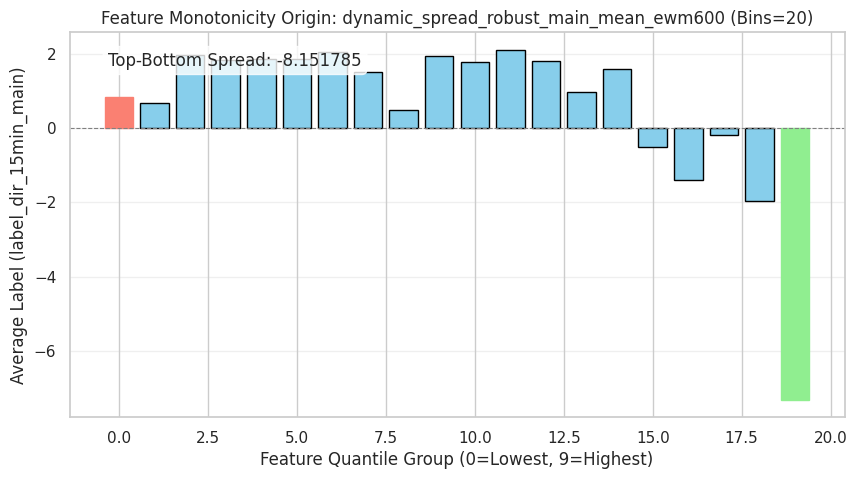

In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_feature_spread(df, feature_col, label_col, quantile=0.1, group_by_day=True, day_col='trade_day'):
    """
    计算特征 Top N% 和 Bottom N% 的 Label 均值差 (Long-Short Spread)
    
    Args:
        df: DataFrame
        feature_col: 特征列名
        label_col: 标签列名 (预测目标，如收益率)
        quantile: 前后百分比 (默认 0.1，即 10%)
        group_by_day: 是否按天分组计算 (强烈建议 True，防止不同日期的市场Beta干扰)
        day_col: 日期列名 (当 group_by_day=True 时必填)
        
    Returns:
        dict: 包含 spread, top_mean, bottom_mean 的字典
    """
    
    # 内部函数：处理单个 Group 或整个 DataFrame
    def _calc_single_group(sub_df):
        # 去除空值
        sub_df = sub_df.dropna(subset=[feature_col, label_col])
        if len(sub_df) == 0:
            return pd.Series({'top': np.nan, 'bottom': np.nan, 'spread': np.nan})
            
        # 确定切分点
        n = len(sub_df)
        k = int(n * quantile)
        
        if k == 0: # 数据太少不足以切分
            return pd.Series({'top': np.nan, 'bottom': np.nan, 'spread': np.nan})
        
        # 按特征排序
        # ascending=True: 头部是小值(Bottom), 尾部是大值(Top)
        sorted_df = sub_df.sort_values(by=feature_col, ascending=True)
        
        # 提取 Bottom (特征最小的 10%)
        bottom_part = sorted_df.iloc[:k]
        # 提取 Top (特征最大的 10%)
        top_part = sorted_df.iloc[-k:]
        
        # 计算 Label 均值
        bottom_mean = bottom_part[label_col].mean()
        top_mean = top_part[label_col].mean()
        
        return pd.Series({
            'top_mean': top_mean,
            'bottom_mean': bottom_mean,
            'spread': top_mean - bottom_mean
        })

    # --- 模式 A: 按天分组计算 (推荐) ---
    if group_by_day:
        if day_col not in df.columns:
            raise ValueError(f"按天分组模式下，DataFrame 必须包含 '{day_col}' 列")
            
        print(f"正在按 {day_col} 分组计算每日 Spread...")
        daily_stats = df.groupby(day_col).apply(_calc_single_group)
        
        # 计算所有天数的平均值
        final_stats = daily_stats.mean()
        
        # 也可以返回 daily_stats 以便画出 spread 的时序图
        return {
            'spread': final_stats['spread'],
            'top_mean': final_stats['top_mean'], 
            'bottom_mean': final_stats['bottom_mean'],
            'daily_data': daily_stats # 附带每日详情
        }

    # --- 模式 B: 全局混合计算 (仅用于快速查看分布) ---
    else:
        result = _calc_single_group(df)
        return result.to_dict()

# ==========================================
# 2. 辅助：可视化函数 (分组柱状图)
# ==========================================
def plot_quantile_performance(df, feature_col, label_col, n_bins=20):
    """
    画出特征分层后的单调性柱状图
    """
    df_clean = df.dropna(subset=[feature_col, label_col]).copy()
    
    # 将特征分为 N 组
    # labeling=False 返回 0, 1, ... 9
    df_clean['group'] = pd.qcut(df_clean[feature_col], n_bins, labels=False, duplicates='drop')
    
    # 计算每组的 Label 均值
    group_means = df_clean.groupby('group')[label_col].mean()
    
    plt.figure(figsize=(10, 5))
    bars = plt.bar(group_means.index, group_means.values, color='skyblue', edgecolor='black')
    
    # 标记最高和最低组
    bars[0].set_color('salmon') # Bottom 10%
    bars[-1].set_color('lightgreen') # Top 10%
    
    plt.title(f"Feature Monotonicity Origin: {feature_col} (Bins={n_bins})")
    plt.xlabel("Feature Quantile Group (0=Lowest, 9=Highest)")
    plt.ylabel(f"Average Label ({label_col})")
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.grid(axis='y', alpha=0.3)
    
    # 计算简单的 spread
    spread = group_means.iloc[-1] - group_means.iloc[0]
    plt.text(0.05, 0.95, f"Top-Bottom Spread: {spread:.6f}", 
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))
    
    plt.show()

# ==========================================
# 使用示例
# ==========================================
if __name__ == "__main__":
    
    plot_quantile_performance(final_merged_df, 'dynamic_spread_robust_main_mean_ewm600', 'label_dir_15min_main', n_bins=20)

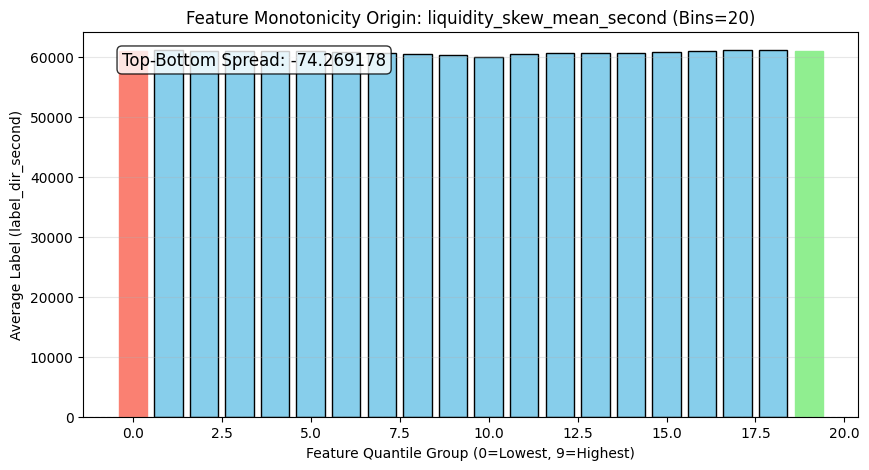

In [62]:
plot_quantile_performance(final_merged_df, 'liquidity_skew_mean_second', 'label_dir_second', n_bins=20)

In [117]:
final_merged_df['liquidity_skew_mean_second'].quantile(0.95)

np.float64(1.005931198304984)

In [123]:
final_merged_df.columns

Index(['type_main', 'source_main', 'trade_day_main', 'action_day_main',
       'inst_main', 'hms_main', 'ms_main', 'last_main', 'volume_main',
       'bp1_main',
       ...
       'dynamic_ask_price_second', 'dynamic_bid_price_second',
       'dynamic_spread_robust_second', 'impact_ask_second',
       'impact_bid_second', 'liquidity_skewness_second',
       'liquidity_skew_mean_second', 'dynamic_spread_robust_second_mean',
       'date', 'time_str'],
      dtype='object', length=187)

In [126]:
final_merged_df[(final_merged_df['liquidity_skew_mean_second']>1.006)&(final_merged_df['label_dir_second']<-6)][['timestamp','impact_ask_second','impact_bid_second','liquidity_skewness_second','liquidity_skew_mean_second']]

,timestamp,impact_ask_second,impact_bid_second,liquidity_skewness_second,liquidity_skew_mean_second
3525,2025-09-18 21:38:42.000,1.944017,1.500102,0.443915,1.025887
3526,2025-09-18 21:38:42.500,1.102170,1.750153,-0.647983,1.035651
3527,2025-09-18 21:38:43.000,1.102170,1.392966,-0.290797,1.024755
3978,2025-09-18 21:42:57.000,3.568675,0.637455,2.931220,1.046704
3979,2025-09-18 21:42:57.500,2.490119,0.000000,2.490119,1.086319
...,...,...,...,...,...
1974639,2025-11-13 11:24:42.500,4.239880,2.737745,1.502135,1.059816
1974640,2025-11-13 11:24:43.000,3.944554,1.604463,2.340090,1.060683
1974641,2025-11-13 11:24:43.500,2.098074,2.305978,-0.207905,1.061722
1974642,2025-11-13 11:24:44.000,0.000000,2.568264,-2.568264,1.036593


In [127]:
final_merged_df[(final_merged_df['liquidity_skew_mean_second']>1.006)&(final_merged_df['label_dir_second']<-6)]['impact_bid_second'].describe()

count    2.476300e+04
mean     2.773182e+00
std      2.501800e+00
min     -1.818989e-12
25%      9.070006e-01
50%      2.189643e+00
75%      3.892429e+00
max      2.613112e+01
Name: impact_bid_second, dtype: float64

In [109]:

daily_corr_main = final_merged_df.groupby('date').apply(
    lambda x: x['dynamic_spread_robust_main_mean'].corr(x['label_main'])
)

# 不活跃合约日均相关性
daily_corr_second = final_merged_df.groupby('date').apply(
    lambda x: x['dynamic_spread_robust_second_mean'].corr(x['label_second'])
)

# 3. 求均值 (Mean IC)
mean_ic_main = daily_corr_main.mean()
mean_ic_second = daily_corr_second.mean()

# 4. (可选) 计算 ICIR (信息比率) = 均值 / 标准差
icir_main = daily_corr_main.mean() / daily_corr_main.std()
icir_second = daily_corr_second.mean() / daily_corr_second.std()

print(f"主力合约日均相关性 (Mean IC): {mean_ic_main:.4f}, ICIR: {icir_main:.4f}")
print(f"不活跃合约日均相关性 (Mean IC): {mean_ic_second:.4f}, ICIR: {icir_second:.4f}")

# 查看每一天的具体相关性数值
print("\n主力合约每日相关性预览:")
print(daily_corr_main.head())

主力合约日均相关性 (Mean IC): 0.1790, ICIR: 1.9019
不活跃合约日均相关性 (Mean IC): 0.1545, ICIR: 1.4181

主力合约每日相关性预览:
date
2025-09-18    0.230900
2025-09-19    0.145829
2025-09-22    0.057679
2025-09-23    0.156460
2025-09-24    0.077288
dtype: float64


In [12]:
# final_merged_df = final_merged_df[pd.to_datetime(final_merged_df['date'])>=pd.to_datetime("2025-09-18")]
final_merged_df['dynamic_spread_robust_main_mean'].corr(final_merged_df['label_main']),final_merged_df['dynamic_spread_robust_second_mean'].corr(final_merged_df['label_second'])

(np.float64(0.3101260995222949), np.float64(0.2351361547156854))

In [65]:
final_merged_df['label_dir_main'].describe()

count    1.633293e+06
mean     6.038117e+04
std      2.726024e+03
min      5.435665e+04
25%      5.941222e+04
50%      6.046651e+04
75%      6.221974e+04
max      6.570206e+04
Name: label_dir_main, dtype: float64

In [111]:
df_result = df_result[pd.to_datetime(df_result['date'])>=pd.to_datetime("2025-09-18")]
df_result['spread_trunc_main_mean'].corr(df_result['label__main']),df_result['spread_trunc_second_mean'].corr(df_result['label__second'])

(np.float64(0.3140396631611134), np.float64(0.2266482419916067))

In [6]:
# df_result = df_result[pd.to_datetime(df_result['date'])>=pd.to_datetime("2025-09-18")]
df_result['spread_zero_main_mean'].corr(df_result['label__main']),df_result['spread_zero_second_mean'].corr(df_result['label__second'])

(np.float64(0.31401179655998385), np.float64(0.22657951289270806))

In [100]:

daily_corr_main = final_merged_df.groupby('date').apply(
    lambda x: x['dynamic_spread_robust_main_mean'].corr(x['label_main'])
)

# 不活跃合约日均相关性
daily_corr_second = final_merged_df.groupby('date').apply(
    lambda x: x['dynamic_spread_robust_second_mean'].corr(x['label_second'])
)
daily_corr_second = daily_corr_second[pd.to_datetime(daily_corr_second.index)>=pd.to_datetime('2025-09-18')]
# 3. 求均值 (Mean IC)
mean_ic_main = daily_corr_main.mean()
mean_ic_second = daily_corr_second.mean()

# 4. (可选) 计算 ICIR (信息比率) = 均值 / 标准差
icir_main = daily_corr_main.mean() / daily_corr_main.std()
icir_second = daily_corr_second.mean() / daily_corr_second.std()

print(f"主力合约日均相关性 (Mean IC): {mean_ic_main:.4f}, ICIR: {icir_main:.4f}")
print(f"不活跃合约日均相关性 (Mean IC): {mean_ic_second:.4f}, ICIR: {icir_second:.4f}")

# 查看每一天的具体相关性数值
print("\n主力合约每日相关性预览:")
print(daily_corr_main.head())

主力合约日均相关性 (Mean IC): 0.1905, ICIR: 1.6674
不活跃合约日均相关性 (Mean IC): 0.1545, ICIR: 1.4181

主力合约每日相关性预览:
date
2025-09-17    0.568283
2025-09-18    0.230900
2025-09-19    0.145829
2025-09-22    0.057679
2025-09-23    0.156460
dtype: float64


In [101]:
df_result.columns

Index(['timestamp', 'mid_price_main', 'adjusted_orderflow_main', 'label__main',
       'spread_trunc_main', 'spread_trunc_main_mean', 'spread_neighbor_main',
       'spread_neighbor_main_mean', 'spread_median_main',
       'spread_median_main_mean', 'spread_zero_main', 'spread_zero_main_mean',
       'mid_price_second', 'adjusted_orderflow_second', 'label__second',
       'spread_trunc_second', 'spread_trunc_second_mean',
       'spread_neighbor_second', 'spread_neighbor_second_mean',
       'spread_median_second', 'spread_median_second_mean',
       'spread_zero_second', 'spread_zero_second_mean', 'date'],
      dtype='object')

In [105]:

daily_corr_main = df_result.groupby('date').apply(
    lambda x: x['spread_neighbor_main_mean'].corr(x['label__main'])
)

# 不活跃合约日均相关性
daily_corr_second = df_result.groupby('date').apply(
    lambda x: x['spread_neighbor_second_mean'].corr(x['label__second'])
)
daily_corr_second = daily_corr_second[pd.to_datetime(daily_corr_second.index)>=pd.to_datetime('2025-09-18')]
# 3. 求均值 (Mean IC)
mean_ic_main = daily_corr_main.mean()
mean_ic_second = daily_corr_second.mean()

# 4. (可选) 计算 ICIR (信息比率) = 均值 / 标准差
icir_main = daily_corr_main.mean() / daily_corr_main.std()
icir_second = daily_corr_second.mean() / daily_corr_second.std()

print(f"主力合约日均相关性 (Mean IC): {mean_ic_main:.4f}, ICIR: {icir_main:.4f}")
print(f"不活跃合约日均相关性 (Mean IC): {mean_ic_second:.4f}, ICIR: {icir_second:.4f}")

# 查看每一天的具体相关性数值
print("\n主力合约每日相关性预览:")
print(daily_corr_main.head())

主力合约日均相关性 (Mean IC): 0.1904, ICIR: 1.6657
不活跃合约日均相关性 (Mean IC): 0.1544, ICIR: 1.4171

主力合约每日相关性预览:
date
2025-09-17    0.568272
2025-09-18    0.230989
2025-09-19    0.144986
2025-09-22    0.057159
2025-09-23    0.156408
dtype: float64


In [93]:
daily_corr_second.index

Index([2025-09-17, 2025-09-18, 2025-09-19, 2025-09-22, 2025-09-23, 2025-09-24,
       2025-09-25, 2025-09-26, 2025-09-29, 2025-10-09, 2025-10-10, 2025-10-13,
       2025-10-14, 2025-10-15, 2025-10-16, 2025-10-17, 2025-10-20, 2025-10-21,
       2025-10-22, 2025-10-23, 2025-10-24, 2025-10-27, 2025-10-28, 2025-10-29,
       2025-10-30, 2025-10-31, 2025-11-03, 2025-11-04, 2025-11-05, 2025-11-06,
       2025-11-07, 2025-11-10, 2025-11-11, 2025-11-12],
      dtype='object', name='date')

In [40]:
final_merged_df[['av1_second','bv1_second']].describe()

,av1_second,bv1_second
count,2.012371e+06,2.012371e+06
mean,3.971126e+00,4.065918e+00
std,6.352160e+00,7.231014e+00
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00
50%,2.000000e+00,2.000000e+00
75%,5.000000e+00,5.000000e+00
max,3.440000e+02,4.010000e+02


In [56]:
final_merged_df.to_pickle('final_merged_data_lee.pkl')

In [ ]:
final_merged_df['dynamic_spread_robust_main_mean_ewm240']

正在聚合数据（计算日内均值）...
开始绘图...


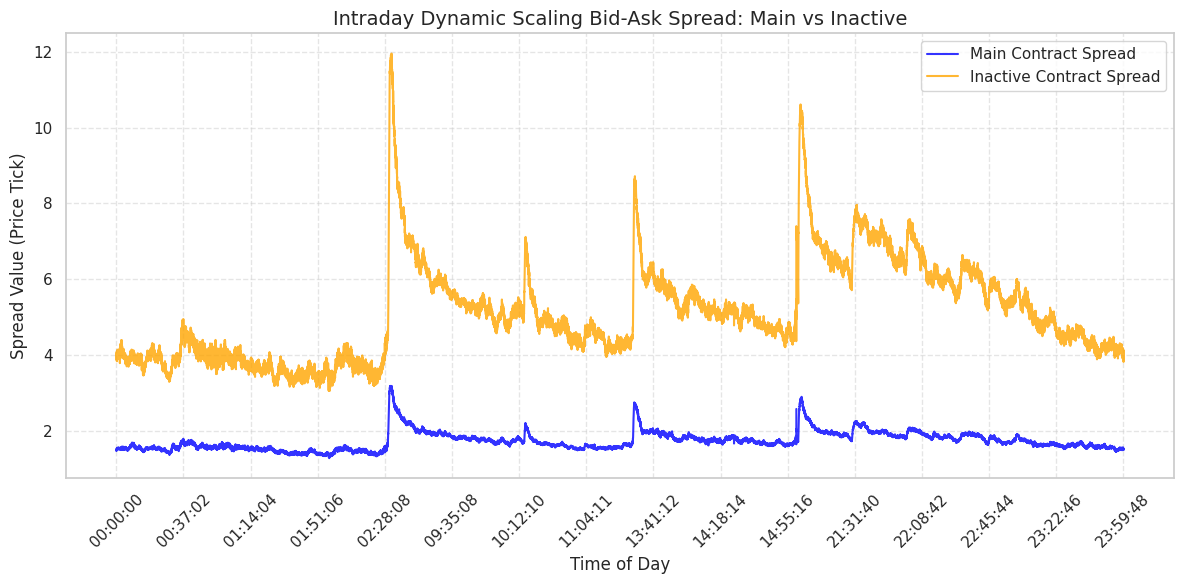

图表已保存为 'bid_ask_spread_comparison.png'


In [570]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_bid_ask_spread(df):
    df['time_str'] = df['timestamp'].dt.strftime('%H:%M:%S')
    
    print("正在聚合数据（计算日内均值）...")
    # 按时间分组，同时计算两个合约价差的均值
    # resulting_df 的索引(index)将是 time_str
    agg_df = df.groupby('time_str')[['dynamic_spread_robust_main_mean_ewm240', 'dynamic_spread_robust_second_mean_ewm240']].mean()
    
    # 3. 绘图
    print("开始绘图...")
    plt.figure(figsize=(12, 6), dpi=100)
    
    # 绘制主力合约曲线
    plt.plot(agg_df.index, agg_df['dynamic_spread_robust_main_mean_ewm240'], 
             label='Main Contract Spread', color='blue', linewidth=1.5, alpha=0.8)
    
    # 绘制不活跃合约曲线
    plt.plot(agg_df.index, agg_df['dynamic_spread_robust_second_mean_ewm240'], 
             label='Inactive Contract Spread', color='orange', linewidth=1.5, alpha=0.8)
    
    # --- 图表美化 ---
    plt.title('Intraday Dynamic Scaling Bid-Ask Spread: Main vs Inactive', fontsize=14)
    plt.ylabel('Spread Value (Price Tick)', fontsize=12)
    plt.xlabel('Time of Day', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # --- X轴刻度优化 ---
    # 因为 tick 数据量很大，X轴标签会非常密集，这里进行稀疏化处理
    # 每隔 total_points / 15 个点显示一个时间标签
    n_ticks = 15
    step = max(1, len(agg_df) // n_ticks)
    plt.xticks(ticks=range(0, len(agg_df), step), 
               labels=agg_df.index[::step], 
               rotation=45)
    
    plt.tight_layout()
    
    # 保存或显示
    plt.savefig('bid_ask_spread_comparison.png')
    plt.show()
    print("图表已保存为 'bid_ask_spread_comparison.png'")

# ================= 执行 =================
# 假设 final_merged_df 是您之前合并好的变量
if __name__ == "__main__":
    # 如果 final_merged_df 还没生成，请先运行上一段合并代码
    # 这里直接调用函数
    if 'final_merged_df' in locals() and not final_merged_df.empty:
        plot_bid_ask_spread(final_merged_df)
    else:
        print("请先确保 final_merged_df 已经加载并包含数据。")

In [ ]:
final_merged_df_au['dynamic_spread_robust_main']

正在聚合数据（计算日内均值）...
正在重排时间轴（符合夜盘->日盘逻辑）...
开始绘图...


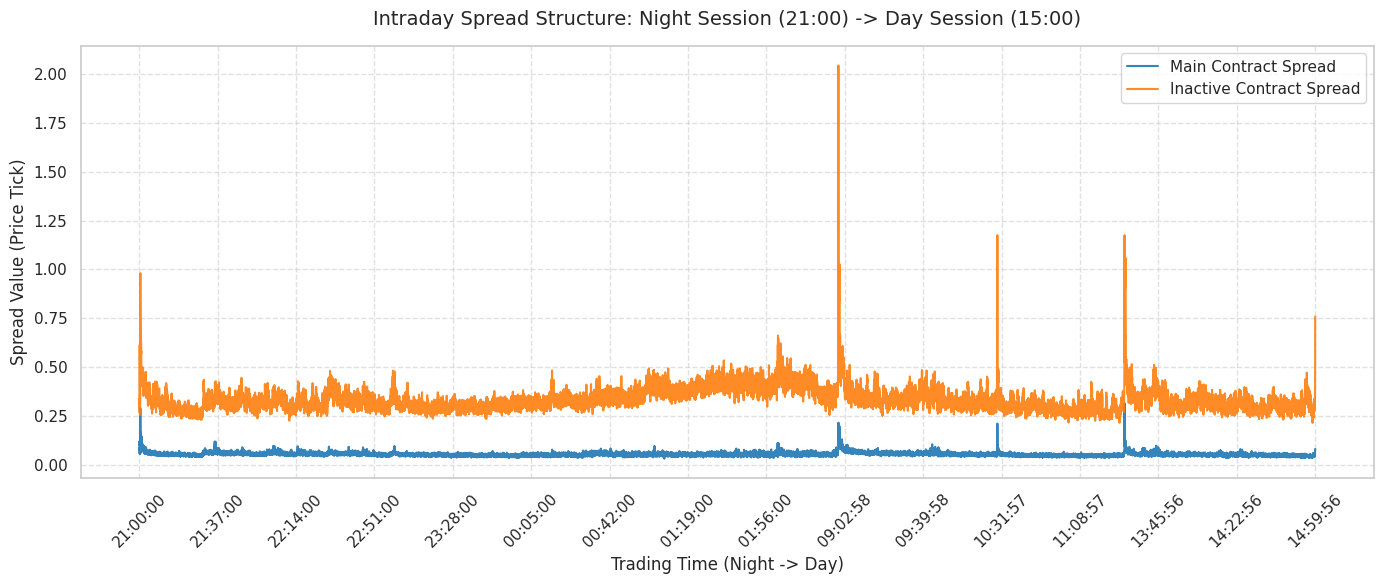

图表已保存为 'bid_ask_spread_trading_logic.png'


In [579]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

def plot_bid_ask_spread_trading_hours(df):
    # 1. 准备数据
    # 确保 timestamp 是 datetime 类型
    if not pd.api.types.is_datetime64_any_dtype(df['timestamp']):
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        
    df['time_str'] = df['timestamp'].dt.strftime('%H:%M:%S')
    _hours = df['timestamp'].dt.hour
    _minutes = df['timestamp'].dt.minute
    
    # 逻辑：保留以下时间段的数据
    # 1. 小时 >= 21 (夜盘：21, 22, 23)
    # 2. 小时 < 15  (日盘：0, 1, 2... 9, 10... 14)
    # 3. 小时 == 15 且 分钟 == 0 (保留 15:00:xx 的收盘数据，剔除 15:01 以后)
    #    (注：如果你做的是股指期货，可能需要保留到 15:15)
    
    condition = (
        (_hours >= 21) | 
        (_hours < 15) | 
        ((_hours == 15) & (_minutes == 0))
    )
    
    # 应用过滤，使用 copy() 避免 SettingWithCopyWarning
    df_clean = df[condition]
    print("正在聚合数据（计算日内均值）...")
    # 按时间分组聚合
    agg_df = df_clean.groupby('time_str')[['dynamic_spread_robust_main', 'dynamic_spread_robust_second']].mean()
    
    # ================= 核心修改部分开始 =================
    print("正在重排时间轴（符合夜盘->日盘逻辑）...")
    
    # 将 index (time_str) 还原为列，方便操作
    agg_df = agg_df.reset_index()
    
    # 定义排序逻辑函数
    def get_trading_sort_key(time_str):
        # 提取小时数
        hour = int(time_str.split(':')[0])
        # 逻辑：中国期货夜盘通常21:00开始。
        # 我们以 18:00 为界限。
        # 大于等于 18:00 的（如21点），保持不变（优先级高，排前面）
        # 小于 18:00 的（如0点、9点、15点），加24（排后面）
        if hour >= 18:
            return hour
        else:
            return hour + 24
            
    # 生成一列用于排序的辅助列
    agg_df['sort_key'] = agg_df['time_str'].apply(get_trading_sort_key)
    
    # 按照自定义的逻辑排序
    # 这里还需要考虑分钟和秒，所以更严谨的做法是结合时间戳，但上面的Hour逻辑在同一个df里通常足够
    # 为了绝对严谨，我们可以用 timedelta 排序：
    def get_timedelta_key(time_str):
        t = pd.to_timedelta(time_str)
        if t.components.hours >= 21:
            return t
        else:
            return t + pd.Timedelta(days=1)
            
    agg_df['sort_val'] = agg_df['time_str'].apply(get_timedelta_key)
    agg_df = agg_df.sort_values('sort_val')
    
    # 重新设置 time_str 为索引，方便画图
    agg_df = agg_df.set_index('time_str')
    # ================= 核心修改部分结束 =================

    # 3. 绘图
    print("开始绘图...")
    plt.figure(figsize=(14, 6), dpi=100) # 稍微加宽一点
    
    # 生成 x 轴的数值序列（0, 1, 2...）用于绘图位置
    x_indices = range(len(agg_df))
    
    # 绘制主力合约
    plt.plot(x_indices, agg_df['dynamic_spread_robust_main'], 
             label='Main Contract Spread', color='#1f77b4', linewidth=1.5, alpha=0.9)
    
    # 绘制非活跃合约
    plt.plot(x_indices, agg_df['dynamic_spread_robust_second'], 
             label='Inactive Contract Spread', color='#ff7f0e', linewidth=1.5, alpha=0.9)
    
    # --- 图表美化 ---
    plt.title('Intraday Spread Structure: Night Session (21:00) -> Day Session (15:00)', fontsize=14, pad=15)
    plt.ylabel('Spread Value (Price Tick)', fontsize=12)
    plt.xlabel('Trading Time (Night -> Day)', fontsize=12)
    plt.legend(loc='upper right')
    
    # 添加网格，横向和纵向都加
    plt.grid(True, which='major', linestyle='--', alpha=0.6)
    
    # --- X轴刻度优化 (Smart Ticks) ---
    # 我们希望刻度显示具体的时间，比如 21:00, 23:00, 09:00, 10:15...
    # 设置想要显示的标签数量
    n_ticks = 15
    step = max(1, len(agg_df) // n_ticks)
    
    # 获取需要显示的索引位置和对应的标签
    tick_locs = x_indices[::step]
    tick_labels = agg_df.index[::step]
    
    plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)
    
    # 可选：标记出夜盘和日盘的分界线（如果数据中存在断点）
    # 这里通过检测时间跳变来画竖线（例如从 02:30 跳到 09:00）
    # 获取 time delta 的差值
    times_series = agg_df['sort_val'].values
    # 计算相邻时间差，如果超过30分钟（视作休市），画一条虚线
    # 注意：这里仅作简单的可视化辅助，非必须
    
    plt.tight_layout()
    
    # 保存或显示
    plt.savefig('bid_ask_spread_trading_logic.png')
    plt.show()
    print("图表已保存为 'bid_ask_spread_trading_logic.png'")

# ================= 测试调用 =================
if __name__ == "__main__":
    if 'final_merged_df' in locals() and not final_merged_df.empty:
        plot_bid_ask_spread_trading_hours(final_merged_df_au)
    else:
        print("请确保 final_merged_df 存在。")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_bid_ask_spread(df):
    df['time_str'] = df['timestamp'].dt.strftime('%H:%M:%S')
    
    print("正在聚合数据（计算日内均值）...")
    # 按时间分组，同时计算两个合约价差的均值
    # resulting_df 的索引(index)将是 time_str
    agg_df = df.groupby('time_str')[['spread_neighbor_main_mean', 'spread_neighbor_second_mean']].mean()
    
    # 3. 绘图
    print("开始绘图...")
    plt.figure(figsize=(12, 6), dpi=100)
    
    # 绘制主力合约曲线
    plt.plot(agg_df.index, agg_df['spread_neighbor_main_mean'], 
             label='Main Contract Spread', color='blue', linewidth=1.5, alpha=0.8)
    
    # 绘制不活跃合约曲线
    plt.plot(agg_df.index, agg_df['spread_neighbor_second_mean'], 
             label='Inactive Contract Spread', color='orange', linewidth=1.5, alpha=0.8)
    
    # --- 图表美化 ---
    plt.title('Intraday Dynamic Scaling Bid-Ask Spread: Main vs Inactive', fontsize=14)
    plt.ylabel('Spread Value (Price Tick)', fontsize=12)
    plt.xlabel('Time of Day', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # --- X轴刻度优化 ---
    # 因为 tick 数据量很大，X轴标签会非常密集，这里进行稀疏化处理
    # 每隔 total_points / 15 个点显示一个时间标签
    n_ticks = 15
    step = max(1, len(agg_df) // n_ticks)
    plt.xticks(ticks=range(0, len(agg_df), step), 
               labels=agg_df.index[::step], 
               rotation=45)
    
    plt.tight_layout()
    
    # 保存或显示
    plt.savefig('bid_ask_spread_comparison.png')
    plt.show()
    print("图表已保存为 'bid_ask_spread_comparison.png'")

# ================= 执行 =================
# 假设 final_merged_df 是您之前合并好的变量
if __name__ == "__main__":
    plot_bid_ask_spread(df_result)


正在聚合数据（计算日内均值）...
开始绘图...


KeyError: 'spread_neighbor_second'

Error in callback <function _draw_all_if_interactive at 0x7032a864e980> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [83]:
final_merged_df[final_merged_df['av4_main']>2*final_merged_df['dynamic_target_size_main']]

,type_main,source_main,trade_day_main,action_day_main,inst_main,hms_main,ms_main,last_main,volume_main,bp1_main,...,trade_qty_second,dynamic_target_size_second,dynamic_orderflow_second,adjusted_orderflow_second,dynamic_ask_price_second,dynamic_bid_price_second,dynamic_spread_robust_second,dynamic_spread_robust_second_mean,date,time_str
11499,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 23:38:23,0,9966.0,169076,9966.0,...,0.0,23.0,0.383333,0.383333,10017.0,10016.0,1.0,1.800000,2025-09-17,23:38:23
11500,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 23:38:23,500,9966.0,169076,9966.0,...,0.0,22.0,0.366667,0.366667,10017.0,10016.0,1.0,1.791667,2025-09-17,23:38:23
11501,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 23:38:28,500,9967.0,169078,9966.0,...,0.0,22.0,0.366667,0.366667,10017.0,10016.0,1.0,1.775000,2025-09-17,23:38:28
11502,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 23:38:35,0,9966.0,169109,9966.0,...,0.0,22.0,0.366667,0.366667,10017.0,10016.0,1.0,1.766667,2025-09-17,23:38:35
11504,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 23:38:37,0,9966.0,169123,9966.0,...,0.0,19.0,0.316667,0.316667,10017.0,10016.0,1.0,1.766667,2025-09-17,23:38:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930759,D,M,2025-11-12,2025-11-12,ag2512,2025-11-12 01:45:01,500,11915.0,385168,11914.0,...,0.0,5.0,0.083333,1.060135,11960.0,11958.0,2.0,1.830929,2025-11-11,01:45:01
1930760,D,M,2025-11-12,2025-11-12,ag2512,2025-11-12 01:45:02,0,11915.0,385168,11914.0,...,0.0,5.0,0.083333,1.060135,11960.0,11958.0,2.0,1.830929,2025-11-11,01:45:02
1930761,D,M,2025-11-12,2025-11-12,ag2512,2025-11-12 01:45:02,500,11915.0,385168,11914.0,...,0.0,5.0,0.083333,1.060135,11961.0,11958.0,3.0,1.839262,2025-11-11,01:45:02
1930762,D,M,2025-11-12,2025-11-12,ag2512,2025-11-12 01:45:03,0,11915.0,385168,11914.0,...,0.0,5.0,0.083333,1.060135,11960.0,11958.0,2.0,1.839262,2025-11-11,01:45:03


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
final_merged_df['delta_orderflow_main'] = final_merged_df['dynamic_buy_orderflow_main'] - final_merged_df['dynamic_sell_orderflow_main']
final_merged_df[final_merged_df['delta_orderflow_main'].abs()>=50][['timestamp','dynamic_buy_orderflow_main','dynamic_sell_orderflow_main']]

,timestamp,dynamic_buy_orderflow_main,dynamic_sell_orderflow_main
59,2025-09-18 21:00:29.000,134.033333,191.166667
60,2025-09-18 21:00:29.500,134.033333,192.500000
61,2025-09-18 21:00:30.000,119.633333,176.800000
63,2025-09-18 21:00:31.500,92.616667,149.483333
66,2025-09-18 21:00:33.000,87.616667,137.750000
...,...,...,...
1959457,2025-11-13 09:00:26.500,74.566667,126.700000
1959458,2025-11-13 09:00:27.000,74.783333,126.916667
1959459,2025-11-13 09:00:27.500,75.100000,127.233333
1959460,2025-11-13 09:00:28.000,75.800000,126.666667


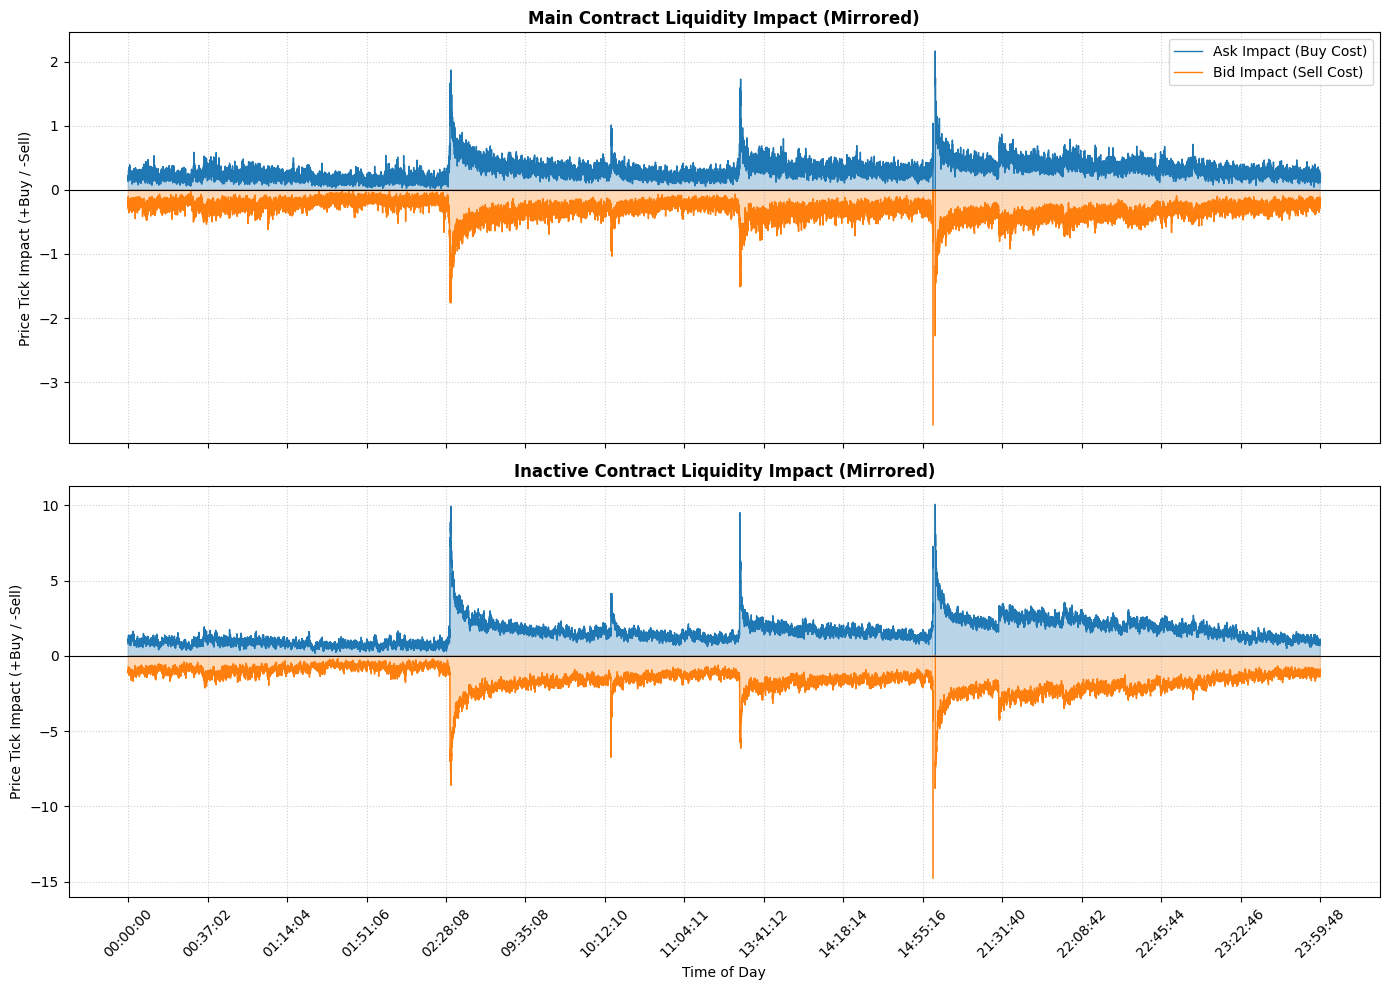

图表已生成：正半轴代表买方冲击，负半轴代表卖方冲击。


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_mirrored_spread(df):
    """
    绘制镜像流动性价差图
    Top Subplot: 主力合约
    Bottom Subplot: 不活跃合约
    Y轴: 正值为 Ask Impact, 负值为 Bid Impact
    """
    # 1. 准备数据
    # 计算单边价差（绝对值）
    # Ask Impact = Dynamic_Ask - Ap1
    df['impact_ask_main'] = (df['dynamic_ask_price_main'] - df['ap1_main']).abs()
    # Bid Impact = Bp1 - Dynamic_Bid
    df['impact_bid_main'] = (df['bp1_main'] - df['dynamic_bid_price_main']).abs()
    
    df['impact_ask_second'] = (df['dynamic_ask_price_second'] - df['ap1_second']).abs()
    df['impact_bid_second'] = (df['bp1_second'] - df['dynamic_bid_price_second']).abs()

    # 提取时间
    df['time_str'] = df['timestamp'].dt.strftime('%H:%M:%S')
    
    # 聚合
    cols = ['impact_ask_main', 'impact_bid_main', 'impact_ask_second', 'impact_bid_second']
    agg_df = df.groupby('time_str')[cols].mean()
    
    # 2. 设置画布 (上下两图)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, dpi=100)
    
    # ================= 子图 1: 主力合约 =================
    x = range(len(agg_df))
    y_ask = agg_df['impact_ask_main']
    y_bid = -agg_df['impact_bid_main'] # 关键：取负值，画在下方
    
    # 绘制线条
    ax1.plot(x, y_ask, color='#1f77b4', linewidth=1, label='Ask Impact (Buy Cost)')
    ax1.plot(x, y_bid, color='#ff7f0e', linewidth=1, label='Bid Impact (Sell Cost)')
    
    # 填充区域 (形成带宽)
    ax1.fill_between(x, y_ask, 0, color='#1f77b4', alpha=0.3) # 上方填充蓝
    ax1.fill_between(x, y_bid, 0, color='#ff7f0e', alpha=0.3) # 下方填充橙
    
    # 辅助线
    ax1.axhline(0, color='black', linewidth=0.8, linestyle='-')
    ax1.set_title('Main Contract Liquidity Impact (Mirrored)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Price Tick Impact (+Buy / -Sell)')
    ax1.legend(loc='upper right')
    ax1.grid(True, linestyle=':', alpha=0.6)

    # ================= 子图 2: 不活跃合约 =================
    y_ask_sec = agg_df['impact_ask_second']
    y_bid_sec = -agg_df['impact_bid_second']
    
    ax2.plot(x, y_ask_sec, color='#1f77b4', linewidth=1, label='Ask Impact')
    ax2.plot(x, y_bid_sec, color='#ff7f0e', linewidth=1, label='Bid Impact')
    
    ax2.fill_between(x, y_ask_sec, 0, color='#1f77b4', alpha=0.3)
    ax2.fill_between(x, y_bid_sec, 0, color='#ff7f0e', alpha=0.3)
    
    ax2.axhline(0, color='black', linewidth=0.8, linestyle='-')
    ax2.set_title('Inactive Contract Liquidity Impact (Mirrored)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Price Tick Impact (+Buy / -Sell)')
    ax2.set_xlabel('Time of Day')
    ax2.grid(True, linestyle=':', alpha=0.6)
    
    # ================= 公共设置 =================
    # X轴刻度稀疏化
    n_ticks = 15
    step = max(1, len(agg_df) // n_ticks)
    
    # 设置刻度
    plt.xticks(ticks=range(0, len(agg_df), step), labels=agg_df.index[::step], rotation=45)
    
    plt.tight_layout()
    plt.savefig('mirrored_spread_comparison.png')
    plt.show()
    print("图表已生成：正半轴代表买方冲击，负半轴代表卖方冲击。")

# 调用
if __name__ == "__main__":
    if 'final_merged_df' in locals():
        plot_mirrored_spread(final_merged_df)

In [34]:
final_merged_df['liquidity_skewness_main'] = final_merged_df['impact_ask_main'] - final_merged_df['impact_bid_main']
final_merged_df['liquidity_skewness_second'] = final_merged_df['impact_ask_second'] - final_merged_df['impact_bid_second']

In [23]:
final_merged_df[final_merged_df['dynamic_spread_robust_main_mean']>=10.0]

,type_main,source_main,trade_day_main,action_day_main,inst_main,hms_main,ms_main,last_main,volume_main,bp1_main,...,dynamic_sell_orderflow_second,dynamic_orderflow_total_second,adjusted_buy_flow_second,adjusted_sell_flow_second,dynamic_ask_price_second,dynamic_bid_price_second,dynamic_spread_robust_second,dynamic_spread_robust_second_mean,date,time_str
582715,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 13:40:03,0,11780.0,1483184,11780.0,...,13.266667,35.733333,497.471236,293.758979,11833.261081,11809.809488,23.451593,21.565254,2025-10-13,13:40:03
582716,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 13:40:03,500,11784.0,1483347,11781.0,...,12.900000,35.566667,501.899764,285.640012,11834.489531,11816.492946,17.996584,21.599700,2025-10-13,13:40:03
582717,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 13:40:04,0,11782.0,1483504,11784.0,...,14.233333,36.566667,494.518885,315.163528,11833.176565,11809.789626,23.386939,21.673713,2025-10-13,13:40:04
582718,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 13:40:04,500,11787.0,1483684,11787.0,...,14.233333,35.766667,476.804775,315.163528,11842.025959,11811.339299,30.686661,21.808886,2025-10-13,13:40:04
582719,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 13:40:05,0,11788.0,1483810,11788.0,...,14.166667,35.766667,478.280951,313.687352,11848.223787,11816.754076,31.469711,21.938069,2025-10-13,13:40:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794023,D,M,2025-10-20,2025-10-17,ag2512,2025-10-17 21:36:32,500,11782.0,446178,11782.0,...,16.866667,26.500000,188.556234,330.136521,11847.283815,11804.117018,43.166797,27.978077,2025-10-17,21:36:32
794024,D,M,2025-10-20,2025-10-17,ag2512,2025-10-17 21:36:33,0,11785.0,446352,11784.0,...,16.866667,26.166667,182.031797,330.136521,11844.653021,11808.640528,36.012493,28.073554,2025-10-17,21:36:33
794025,D,M,2025-10-20,2025-10-17,ag2512,2025-10-17 21:36:33,500,11785.0,446477,11785.0,...,17.366667,26.433333,177.464691,339.923177,11845.427412,11810.677584,34.749828,28.160352,2025-10-17,21:36:33
794026,D,M,2025-10-20,2025-10-17,ag2512,2025-10-17 21:36:34,0,11785.0,446780,11784.0,...,17.033333,26.100000,177.464691,333.398740,11848.052403,11805.141511,42.910892,28.334933,2025-10-17,21:36:34


正在聚合数据（计算日内均值）...
开始绘图...


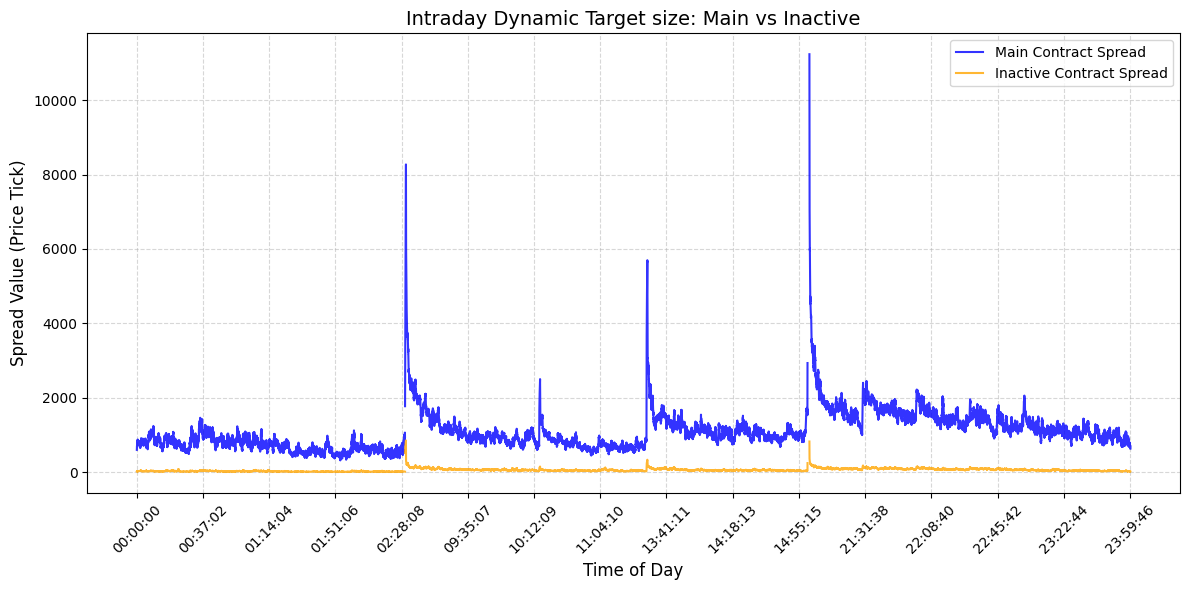

图表已保存为 'bid_ask_spread_comparison.png'


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_bid_ask_spread(df):
    df['time_str'] = df['timestamp'].dt.strftime('%H:%M:%S')
    
    print("正在聚合数据（计算日内均值）...")
    # 按时间分组，同时计算两个合约价差的均值
    # resulting_df 的索引(index)将是 time_str
    agg_df = df.groupby('time_str')[['dynamic_target_size_main', 'dynamic_target_size_second']].mean()
    
    # 3. 绘图
    print("开始绘图...")
    plt.figure(figsize=(12, 6), dpi=100)
    
    # 绘制主力合约曲线
    plt.plot(agg_df.index, agg_df['dynamic_target_size_main'], 
             label='Main Contract Spread', color='blue', linewidth=1.5, alpha=0.8)
    
    # 绘制不活跃合约曲线
    plt.plot(agg_df.index, agg_df['dynamic_target_size_second'], 
             label='Inactive Contract Spread', color='orange', linewidth=1.5, alpha=0.8)
    
    # --- 图表美化 ---
    plt.title('Intraday Dynamic Target size: Main vs Inactive', fontsize=14)
    plt.ylabel('Spread Value (Price Tick)', fontsize=12)
    plt.xlabel('Time of Day', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # --- X轴刻度优化 ---
    # 因为 tick 数据量很大，X轴标签会非常密集，这里进行稀疏化处理
    # 每隔 total_points / 15 个点显示一个时间标签
    n_ticks = 15
    step = max(1, len(agg_df) // n_ticks)
    plt.xticks(ticks=range(0, len(agg_df), step), 
               labels=agg_df.index[::step], 
               rotation=45)
    
    plt.tight_layout()
    
    # 保存或显示
    plt.savefig('bid_ask_spread_comparison.png')
    plt.show()
    print("图表已保存为 'bid_ask_spread_comparison.png'")

# ================= 执行 =================
# 假设 final_merged_df 是您之前合并好的变量
if __name__ == "__main__":
    # 如果 final_merged_df 还没生成，请先运行上一段合并代码
    # 这里直接调用函数
    if 'final_merged_df' in locals() and not final_merged_df.empty:
        plot_bid_ask_spread(final_merged_df)
    else:
        print("请先确保 final_merged_df 已经加载并包含数据。")

In [76]:
final_merged_df[final_merged_df['dynamic_spread_main']>=5.0]

,type_main,source_main,trade_day_main,action_day_main,inst_main,hms_main,ms_main,last_main,volume_main,bp1_main,...,trade_qty_second,dynamic_target_size_second,dynamic_ask_price_second,dynamic_bid_price_second,dynamic_spread_second,l1_spread_mean_second,dynamic_mean_second,spread_main,spread_second,time_str
3,D,M,2025-10-13,2025-10-10,ag2512,2025-10-10 21:00:01,0,11185.0,2228,11180.0,...,41.0,NaN,11217.000000,11210.000000,7.000000,NaN,NaN,5.0,7.0,21:00:01
4,D,M,2025-10-13,2025-10-10,ag2512,2025-10-10 21:00:01,500,11179.0,2646,11174.0,...,33.0,NaN,11221.000000,11217.000000,4.000000,NaN,NaN,5.0,4.0,21:00:01
8,D,M,2025-10-13,2025-10-10,ag2512,2025-10-10 21:00:03,500,11166.0,3807,11161.0,...,4.0,NaN,11207.000000,11206.000000,1.000000,NaN,NaN,5.0,1.0,21:00:03
59,D,M,2025-10-13,2025-10-10,ag2512,2025-10-10 21:00:29,0,11150.0,11383,11148.0,...,0.0,564.0,11193.723404,11185.212766,8.510638,NaN,NaN,2.0,6.0,21:00:29
60,D,M,2025-10-13,2025-10-10,ag2512,2025-10-10 21:00:29,500,11145.0,11484,11145.0,...,1.0,565.0,11191.150442,11186.061947,5.088496,NaN,NaN,4.0,4.0,21:00:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051878,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 14:52:52,0,11490.0,2378120,11490.0,...,0.0,65.0,11538.000000,11534.000000,4.000000,2.541667,2.582618,1.0,4.0,14:52:52
2051902,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 14:53:04,0,11489.0,2379117,11489.0,...,2.0,54.0,11533.000000,11531.000000,2.000000,2.566667,2.607618,1.0,2.0,14:53:04
2052428,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 14:57:29,0,11520.0,2406871,11516.0,...,1.0,67.0,11559.000000,11556.000000,3.000000,2.291667,2.291667,4.0,3.0,14:57:29
2052429,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 14:57:29,500,11517.0,2406908,11517.0,...,7.0,73.0,11563.000000,11558.000000,5.000000,2.316667,2.316667,5.0,5.0,14:57:29


In [31]:
final_merged_df['time_str']

0          18:39:24
1          20:59:00
2          21:00:00
3          21:00:01
4          21:00:01
             ...   
2052718    14:59:57
2052719    14:59:58
2052720    14:59:59
2052721    14:59:59
2052722    15:00:00
Name: time_str, Length: 2052723, dtype: object

<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1374209/144234889.py:30: SyntaxWarning: invalid escape sequence '\m'
  axes[0, 0].plot(x, p_norm, 'r-', linewidth=2, label=f'Normal Fit\n($\mu={mu:.2f}, \sigma={std:.2f}$)')
/tmp/ipykernel_1374209/144234889.py:30: SyntaxWarning: invalid escape sequence '\s'
  axes[0, 0].plot(x, p_norm, 'r-', linewidth=2, label=f'Normal Fit\n($\mu={mu:.2f}, \sigma={std:.2f}$)')


注意：已过滤 20385 个非正数值（对数正态拟合需要正数）。


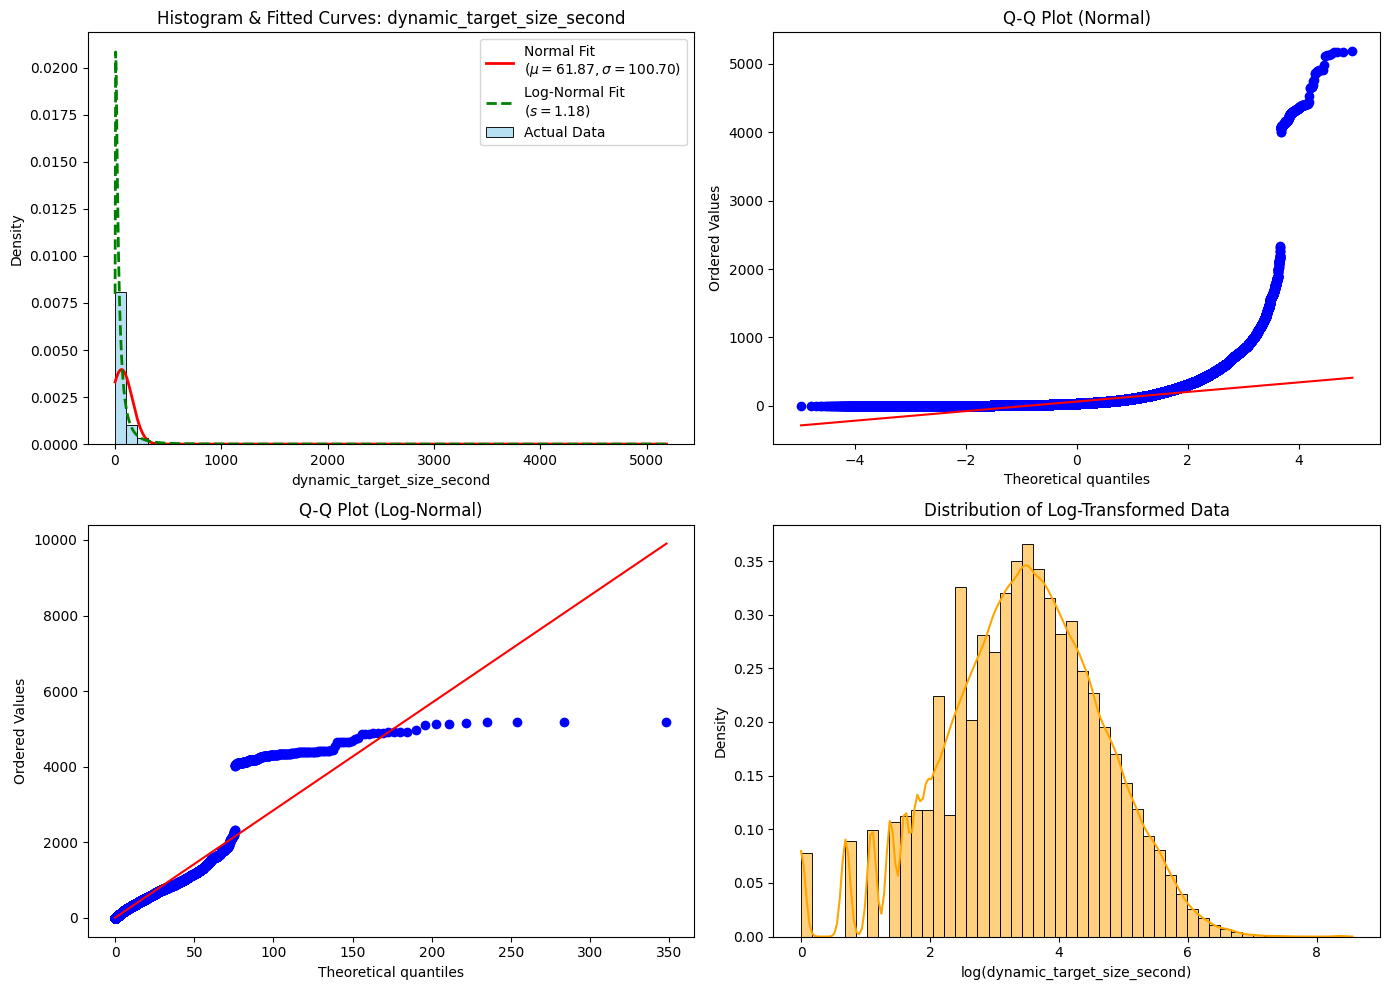

------------------------------
统计检验结果 (K-S Test):
1. 正态分布拟合误差 (D值): 0.2728 (p=0.00e+00)
2. 对数正态拟合误差 (D值): 0.0167 (p=0.00e+00)
------------------------------
结论：列 'dynamic_target_size_second' 更接近 【对数正态分布】


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

def check_distribution(df, col_name):
    """
    绘制指定列的分布图，对比正态分布和对数正态分布的拟合情况
    """
    # 1. 数据清洗（去除空值和非正数，因为对数正态要求数据>0）
    original_data = df[col_name].dropna()
    data = original_data[original_data > 0]
    
    if len(data) < len(original_data):
        print(f"注意：已过滤 {len(original_data) - len(data)} 个非正数值（对数正态拟合需要正数）。")

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # -------------------------------------------------------
    # 图1：直方图 + 拟合曲线 (最直观的对比)
    # -------------------------------------------------------
    sns.histplot(data, kde=False, stat="density", bins=50, ax=axes[0, 0], color='skyblue', label='Actual Data', alpha=0.6)
    
    x = np.linspace(data.min(), data.max(), 1000)
    
    # 拟合正态分布
    mu, std = stats.norm.fit(data)
    p_norm = stats.norm.pdf(x, mu, std)
    axes[0, 0].plot(x, p_norm, 'r-', linewidth=2, label=f'Normal Fit\n($\mu={mu:.2f}, \sigma={std:.2f}$)')
    
    # 拟合对数正态分布 (s=shape/sigma, scale=exp(mu))
    s, loc, scale = stats.lognorm.fit(data)
    p_lognorm = stats.lognorm.pdf(x, s, loc, scale)
    axes[0, 0].plot(x, p_lognorm, 'g--', linewidth=2, label=f'Log-Normal Fit\n($s={s:.2f}$)')
    
    axes[0, 0].set_title(f'Histogram & Fitted Curves: {col_name}')
    axes[0, 0].legend()
    
    # -------------------------------------------------------
    # 图2：正态分布 Q-Q 图
    # -------------------------------------------------------
    # 如果点贴合红线，说明符合正态分布
    stats.probplot(data, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title('Q-Q Plot (Normal)')
    
    # -------------------------------------------------------
    # 图3：对数正态分布 Q-Q 图
    # -------------------------------------------------------
    # 如果点贴合红线，说明符合对数正态分布
    stats.probplot(data, dist="lognorm", sparams=(s,), plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot (Log-Normal)')
    
    # -------------------------------------------------------
    # 图4：对数变换后的分布
    # -------------------------------------------------------
    # 对数正态分布的本质：取对数后呈现正态分布
    log_data = np.log(data)
    sns.histplot(log_data, kde=True, stat="density", bins=50, ax=axes[1, 1], color='orange')
    axes[1, 1].set_title('Distribution of Log-Transformed Data')
    axes[1, 1].set_xlabel(f'log({col_name})')

    plt.tight_layout()
    plt.show() # 如果在脚本中运行请改为 plt.savefig('dist_analysis.png')
    
    # -------------------------------------------------------
    # 统计检验 (Kolmogorov-Smirnov Test)
    # -------------------------------------------------------
    # D statistic (statistic值) 越小，说明拟合越好
    print("-" * 30)
    print("统计检验结果 (K-S Test):")
    
    ks_norm = stats.kstest(data, 'norm', args=(mu, std))
    ks_lognorm = stats.kstest(data, 'lognorm', args=(s, loc, scale))
    
    print(f"1. 正态分布拟合误差 (D值): {ks_norm.statistic:.4f} (p={ks_norm.pvalue:.2e})")
    print(f"2. 对数正态拟合误差 (D值): {ks_lognorm.statistic:.4f} (p={ks_lognorm.pvalue:.2e})")
    
    print("-" * 30)
    if ks_lognorm.statistic < ks_norm.statistic:
        print(f"结论：列 '{col_name}' 更接近 【对数正态分布】")
    else:
        print(f"结论：列 '{col_name}' 更接近 【正态分布】")

# ================= 使用示例 =================
# 假设您的 dataframe 叫 final_merged_df，想分析 'l1_spread' 列
check_distribution(final_merged_df, 'dynamic_target_size_second')

In [21]:
final_merged_df[['dynamic_target_size_main','dynamic_target_size_second']].describe()

,dynamic_target_size_main,dynamic_target_size_second
count,2.050659e+06,2.050658e+06
mean,1.123429e+03,6.125295e+01
std,1.257784e+03,1.003859e+02
min,1.500000e+01,0.000000e+00
25%,4.040000e+02,1.400000e+01
50%,7.370000e+02,3.200000e+01
75%,1.366000e+03,7.100000e+01
max,3.617100e+04,5.187000e+03


In [9]:
final_merged_df['dynamic_mean_1tick_main'].corr(final_merged_df['label_main']),final_merged_df['dynamic_mean_1tick_second'].corr(final_merged_df['label_second'])

(np.float64(0.3184092472743839), np.float64(0.2090145428150188))

In [10]:
final_merged_df['dynamic_mean_6tick_main'].corr(final_merged_df['label_main']),final_merged_df['dynamic_mean_6tick_second'].corr(final_merged_df['label_second'])

(np.float64(0.32108158698232586), np.float64(0.26744550229665076))

In [52]:
final_merged_df['dynamic_mean_2tick_main'].corr(final_merged_df['label_main']),final_merged_df['dynamic_mean_2tick_second'].corr(final_merged_df['label_second'])

(np.float64(0.3176091151231156), np.float64(0.26514990932405097))

In [63]:
final_merged_df['dynamic_spread_robust_main_mean'].corr(final_merged_df['label_main']),final_merged_df['dynamic_spread_robust_second_mean'].corr(final_merged_df['label_second'])

(np.float64(0.27895645624447846), np.float64(0.228191064157654))

In [44]:
final_merged_df['dynamic_spread_robust_main_mean'].corr(final_merged_df['label_main']),final_merged_df['dynamic_spread_robust_second_mean'].corr(final_merged_df['label_second'])

(np.float64(0.32044280422942695), np.float64(0.22468549064537613))

In [11]:
final_merged_df['dynamic_mean_10tick_main'].corr(final_merged_df['label_main']),final_merged_df['dynamic_mean_10tick_second'].corr(final_merged_df['label_second'])

(np.float64(0.315164427380265), np.float64(0.26864261613385504))

In [3]:
final_merged_df['deep_spread_mean_main'].corr(final_merged_df['label_main']),final_merged_df['deep_spread_mean_second'].corr(final_merged_df['label_second'])

(np.float64(0.03594939683864474), np.float64(0.11869354280228733))

In [81]:
final_merged_df['l1_spread_mean_main'].corr(final_merged_df['label_main']),final_merged_df['l1_spread_mean_second'].corr(final_merged_df['label_second'])

(np.float64(0.27260910668806915), np.float64(0.15836068507391166))

In [216]:
final_merged_df['dynamic_orderflow_total_main'].describe()

count    1.985831e+06
mean     3.755229e+01
std      4.208272e+01
min      0.000000e+00
25%      1.350000e+01
50%      2.463333e+01
75%      4.570000e+01
max      1.205700e+03
Name: dynamic_orderflow_total_main, dtype: float64

In [ ]:
final_merged_df['']

In [226]:
import pandas as pd
import numpy as np

def analyze_large_order_impact(df, label_col='label_dir', suffix='_main'):
    """
    识别大单并评估其对市场方向及波动率的影响
    
    新增逻辑:
    同时计算 Label 的绝对值均值 (Volatility Proxy)，以区分方向性影响和波动性放大效应。
    """
    label_col = label_col+suffix
    df_res = df.copy()
    
    # --- 预计算波动率代理变量 ---
    # 使用 Label 的绝对值来代表这段时间的波动幅度/趋势强度
    df_res['label_abs'] = df_res[label_col].abs()
    
    impact_stats = []
    levels = range(1, 6)
    sides = ['a', 'b']
    
    for side in sides:
        for i in levels:
            vol_col = f'{side}v{i}{suffix}'
            flag_col = f'is_large_{vol_col}{suffix}' # 保持列名唯一性
            
            # --- 核心识别逻辑 ---
            # 1. 绝对大单
            cond_abs = df_res[vol_col] >= 500
            
            # 2. 相对大单
            dyn_flow_col = f'dynamic_orderflow_total{suffix}'
            if dyn_flow_col not in df_res.columns:
                # 兼容性处理，如果没有带后缀的列，尝试找不带后缀的
                dyn_flow_col = 'dynamic_orderflow_total'
            
            dyn_flow = df_res[dyn_flow_col].fillna(0)
            
            cond_rel = (df_res[vol_col] >= 100) & \
                       (df_res[vol_col] < 500) & \
                       (df_res[vol_col] > 2 * dyn_flow)
            
            # 生成标记
            mask_large = (cond_abs | cond_rel)
            df_res[flag_col] = mask_large.astype(int)
            
            # --- 3. 统计分析 (分组计算) ---
            # 提取两组数据：有大单时刻 vs 正常时刻
            # A. 方向性 (Signed)
            group_large_signed = df_res.loc[mask_large, label_col]
            group_normal_signed = df_res.loc[~mask_large, label_col]
            
            # B. 波动性 (Absolute)
            group_large_abs = df_res.loc[mask_large, 'label_abs']
            group_normal_abs = df_res.loc[~mask_large, 'label_abs']
            
            count_large = mask_large.sum()
            
            # 计算均值
            mean_dir_large = group_large_signed.mean()
            mean_dir_normal = group_normal_signed.mean()
            
            mean_vol_large = group_large_abs.mean()
            mean_vol_normal = group_normal_abs.mean()
            
            # 计算差异 (Impact)
            # 方向差异: 大单时刻的方向 - 正常时刻的方向
            diff_dir = mean_dir_large - mean_dir_normal
            
            # 波动差异: 大单时刻的波动 - 正常时刻的波动
            diff_vol = mean_vol_large - mean_vol_normal
            
            # 波动率倍数 (Ratio): 大单时刻波动是平时的几倍
            vol_ratio = mean_vol_large / mean_vol_normal if mean_vol_normal != 0 else 1.0
            
            # 预期方向
            expected_sign = 1 if side == 'b' else -1
            
            impact_stats.append({
                'Level': f'{side.upper()}V{i}',
                'Large_Order_Count': count_large,
                'Freq (%)': round(count_large / len(df_res) * 100, 2),
                
                # 方向性指标
                'Dir_Mean_Large': mean_dir_large,
                'Dir_Mean_Normal': mean_dir_normal,
                'Dir_Diff': diff_dir,          # 核心指标1：方向偏离
                
                # 波动性指标
                'Vol_Mean_Large': mean_vol_large,
                'Vol_Mean_Normal': mean_vol_normal,
                'Vol_Diff': diff_vol,          # 核心指标2：波动偏离
                'Vol_Ratio': vol_ratio,        # 辅助判断：是否仅仅是因为波动大
                
                # 原始判断逻辑
                'Is_Effective': (diff_dir * expected_sign) > 0
            })
            
    stats_df = pd.DataFrame(impact_stats)
    return df_res, stats_df

import matplotlib.pyplot as plt
import seaborn as sns

def plot_large_order_impact(stats_df):
    plt.figure(figsize=(12, 6))
    
    # 颜色映射：Bid用红，Ask用绿 (国内习惯: 红涨绿跌)
    colors = ['red' if 'B' in x else 'green' for x in stats_df['Level']]
    
    sns.barplot(data=stats_df, x='Level', y='Dir_Diff', palette=colors)
    
    plt.axhline(0, color='black', linestyle='--')
    plt.title("Impact of Large Orders on Future Price Direction (Label_Dir)", fontsize=14)
    plt.ylabel("Impact (Mean Label w/ Large - Mean Label Normal)")
    plt.xlabel("Order Book Level")
    plt.grid(axis='y', linestyle=':', alpha=0.5)
    
    # 添加注释
    plt.text(0, stats_df['Dir_Diff'].max(), 'Expect Positive for Bid', color='red')
    plt.text(5, stats_df['Dir_Diff'].min(), 'Expect Negative for Ask', color='green')
    
    plt.show()

final_merged_df, impact_report = analyze_large_order_impact(final_merged_df,suffix='_second')

In [227]:
impact_report

,Level,Large_Order_Count,Freq (%),Dir_Mean_Large,Dir_Mean_Normal,Dir_Diff,Vol_Mean_Large,Vol_Mean_Normal,Vol_Diff,Vol_Ratio,Is_Effective
0,AV1,1296,0.07,-0.143586,0.253210,-0.396796,5.476192,8.573682,-3.097491,0.638721,True
1,AV2,2580,0.13,0.043024,0.253224,-0.210199,6.907583,8.573820,-1.666237,0.805660,True
2,AV3,15056,0.76,0.353904,0.252176,0.101727,7.352531,8.580973,-1.228442,0.856841,False
3,AV4,66116,3.33,0.880008,0.231250,0.648758,7.448094,8.610521,-1.162427,0.864999,False
4,AV5,71705,3.61,0.923523,0.227724,0.695799,8.115966,8.588783,-0.472817,0.944949,False
5,BV1,1703,0.09,2.761465,0.250889,2.510576,8.028585,8.572088,-0.543503,0.936596,True
6,BV2,3502,0.18,0.362519,0.252758,0.109761,7.167074,8.574092,-1.407018,0.835899,True
7,BV3,17635,0.89,0.543045,0.250350,0.292696,7.799289,8.578563,-0.779274,0.909160,True
8,BV4,74244,3.74,0.922990,0.226844,0.696146,7.705511,8.605386,-0.899875,0.895429,True
9,BV5,75332,3.79,0.825690,0.230284,0.595406,8.094036,8.590542,-0.496506,0.942203,True


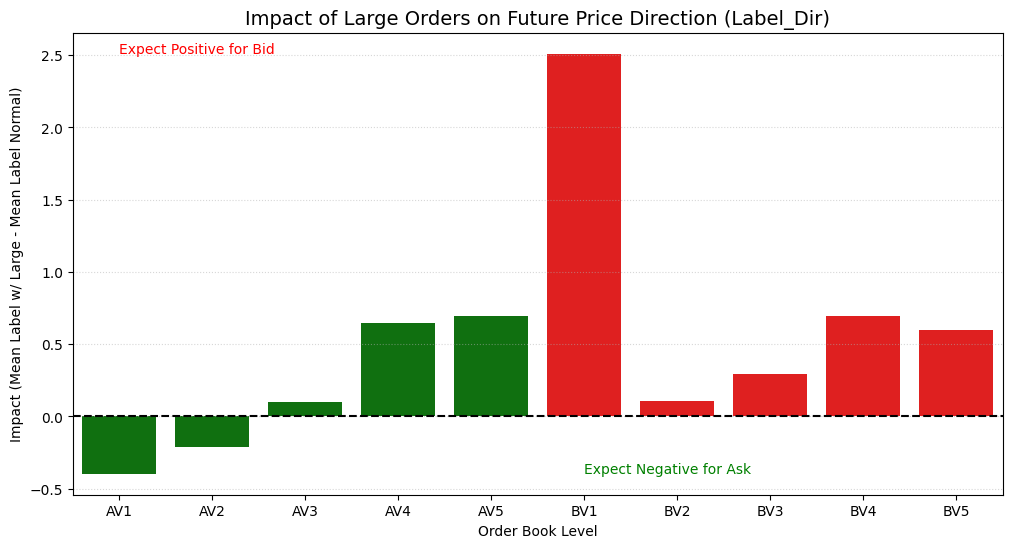

In [228]:
plot_large_order_impact(impact_report)

In [230]:
import pandas as pd
import numpy as np
from tqdm import tqdm  # 建议安装 tqdm 显示进度条: pip install tqdm

def track_large_order_lifecycle_daily(df, suffix='_main', look_ahead_window=120, tick_size=0.2):
    """
    按日期分组，精准分析大单的成交概率（基于价格锁定与队列晋升）
    
    参数:
    - suffix: 列名后缀 (例如 '_main' 或 '_sub')
    - look_ahead_window: 向前追踪多少个tick
    - tick_size: 最小变动价位 (用于判断 Cancelled Near)
    """
    
    # 容器，用于存储每一笔大单的最终命运
    all_events = []
    
    # 必需列名检查
    req_cols = [f'av1{suffix}', f'bv1{suffix}', f'ap1{suffix}', f'bp1{suffix}']
    for c in req_cols:
        if c not in df.columns:
            raise ValueError(f"Missing required column: {c}")

    # --- 按日期分组遍历 ---
    # 使用 tqdm 显示进度，因为循环处理可能较慢
    grouped = df.groupby('date')
    
    for date, day_df in tqdm(grouped, desc="Processing Dates"):
        # 1. 每日数据预处理
        # 必须重置索引，以便 iloc 和 loc 对齐，且方便相对位置索引
        day_df = day_df.reset_index(drop=True)
        
        # 构造参考价格 (Last Price 近似值: Mid Price)
        # 如果有真实的 last_price 列，请替换此处
        price_col = 'last_price_proxy'
        day_df[price_col] = (day_df[f'ap1{suffix}'] + day_df[f'bp1{suffix}']) / 2
        
        # 获取动态流速阈值 (填充 NaN 防止报错)
        flow_col = f'dynamic_orderflow_total{suffix}'
        if flow_col in day_df.columns:
            dyn_flow = day_df[flow_col].fillna(0)
        else:
            dyn_flow = pd.Series(100, index=day_df.index) # 默认值
            
        # 遍历 2-5 档 (Ask/Bid)
        levels = range(2, 6)
        sides = ['a', 'b']
        
        for side in sides:
            for lvl in levels:
                # 构造当前循环的列名 (带后缀)
                col_vol = f'{side}v{lvl}{suffix}'
                col_price = f'{side}p{lvl}{suffix}'
                
                # --- A. 识别大单 ---
                # 逻辑: > 500 或 (>100 且 > 2倍流速)
                is_large = (day_df[col_vol] >= 500) | \
                           ((day_df[col_vol] >= 100) & (day_df[col_vol] > 2 * dyn_flow))
                
                large_indices = day_df.index[is_large].tolist()
                
                if not large_indices:
                    continue
                
                # --- B. 采样去重 (防止同一笔单子在连续tick被重复统计) ---
                # 简单逻辑：如果当前大单索引与上一个采样的索引距离 < 10，跳过
                sampled_indices = [large_indices[0]]
                for idx in large_indices[1:]:
                    if idx - sampled_indices[-1] > 10:
                        sampled_indices.append(idx)
                
                # --- C. 追踪生命周期 ---
                for idx in sampled_indices:
                    # 边界检查：如果剩余时间不足 window，跳过
                    if idx + look_ahead_window >= len(day_df):
                        continue
                        
                    # 获取初始状态
                    target_price = day_df.at[idx, col_price]
                    # 截取未来窗口
                    future_window = day_df.iloc[idx+1 : idx+1+look_ahead_window]
                    
                    outcome = 'Unknown'
                    
                    if side == 'a': # Ask (卖单)
                        # 判定 1: 成交 (Filled)
                        # 只要未来窗口内的最高价 >= 目标价，视为成交
                        max_reach = future_window[price_col].max()
                        
                        if max_reach >= target_price:
                            outcome = 'Filled'
                        else:
                            # 判定 2: 撤单 (Cancelled)
                            # 价格没到，但是单子没了。区分是在附近撤的(心虚)，还是远端撤的。
                            # 观察未来窗口中，价格最接近目标价的一刻
                            min_dist = (target_price - future_window[price_col]).min()
                            
                            # 如果逼近到了 2 个 tick 以内，且没成交
                            if min_dist <= 2 * tick_size:
                                outcome = 'Cancelled_Near (Spoof)'
                            else:
                                outcome = 'Cancelled_Far'
                                
                    else: # Bid (买单)
                        # 判定 1: 成交 (Filled)
                        min_reach = future_window[price_col].min()
                        
                        if min_reach <= target_price:
                            outcome = 'Filled'
                        else:
                            # 判定 2: 撤单
                            min_dist = (future_window[price_col] - target_price).min()
                            
                            if min_dist <= 2 * tick_size:
                                outcome = 'Cancelled_Near (Spoof)'
                            else:
                                outcome = 'Cancelled_Far'
                    
                    # 记录事件
                    all_events.append({
                        'Date': date,
                        'Time_Idx': idx, # 日内相对索引
                        'Side': 'Ask' if side == 'a' else 'Bid',
                        'Start_Level': f'L{lvl}', # 记录是 L2 还是 L3 起步
                        'Target_Price': target_price,
                        'Outcome': outcome
                    })
    
    # 转换为 DataFrame
    events_df = pd.DataFrame(all_events)
    return events_df

def calc_lifecycle_stats_summary(events_df):
    """
    基于追踪结果表，统计各档位大单的实际成交概率
    """
    if events_df.empty:
        print("No large order events detected.")
        return pd.DataFrame()
    
    # 1. 聚合统计：按 Side 和 Start_Level 分组
    # 统计 Outcome 列中各种结果的数量
    summary = events_df.groupby(['Side', 'Start_Level', 'Outcome']).size().unstack(fill_value=0)
    
    # 确保列存在 (防止某天没有 Fill 数据导致报错)
    required_cols = ['Filled', 'Cancelled_Near (Spoof)', 'Cancelled_Far']
    for c in required_cols:
        if c not in summary.columns:
            summary[c] = 0
            
    # 2. 计算核心指标
    summary['Total_Events'] = summary.sum(axis=1)
    
    # 真实成交率 (衡量"硬度")
    summary['Fill_Probability'] = summary['Filled'] / summary['Total_Events']
    
    # 临阵脱逃率 (衡量"虚假度" / Spoofing)
    # 分母通常取 (Filled + Cancelled_Near)，即"面临成交风险时的样本总数"
    # 或者取 Total_Events 也可以，这里取 Total 以展示整体分布
    summary['Spoof_Probability'] = summary['Cancelled_Near (Spoof)'] / summary['Total_Events']
    
    # 格式化百分比方便阅读
    res_display = summary.copy()
    res_display['Fill_Probability'] = (res_display['Fill_Probability'] * 100).round(2).astype(str) + '%'
    res_display['Spoof_Probability'] = (res_display['Spoof_Probability'] * 100).round(2).astype(str) + '%'
    
    return summary, res_display

events_log = track_large_order_lifecycle_daily(final_merged_df, suffix='_main', look_ahead_window=120, tick_size=1.0)

stats_raw, stats_view = calc_lifecycle_stats_summary(events_log)

print("=== 主力合约大单成交概率表 ===")
print(stats_view)

events_log_sub = track_large_order_lifecycle_daily(final_merged_df, suffix='_second', look_ahead_window=120, tick_size=1.0)
stats_raw_sub, stats_view_sub = calc_lifecycle_stats_summary(events_log_sub)

print("\n=== 非主力合约大单成交概率表 ===")
print(stats_view_sub)

Processing Dates:   0%|          | 0/33 [00:00<?, ?it/s]

Processing Dates: 100%|██████████| 33/33 [00:23<00:00,  1.41it/s]


=== 主力合约大单成交概率表 ===
Outcome           Cancelled_Far  Cancelled_Near (Spoof)  Filled  Total_Events  \
Side Start_Level                                                                
Ask  L2                     657                    5712   14084         20453   
     L3                    3630                    6920   14329         24879   
     L4                    7988                    6602   13190         27780   
     L5                   12590                    6211   11368         30169   
Bid  L2                     713                    5572   13428         19713   
     L3                    3487                    6470   13148         23105   
     L4                    7380                    6085   11824         25289   
     L5                   11388                    5648   10421         27457   

Outcome          Fill_Probability Spoof_Probability  
Side Start_Level                                     
Ask  L2                    68.86%            27.93%  
     L3

Processing Dates: 100%|██████████| 33/33 [00:15<00:00,  2.10it/s]



=== 非主力合约大单成交概率表 ===
Outcome           Cancelled_Far  Cancelled_Near (Spoof)  Filled  Total_Events  \
Side Start_Level                                                                
Ask  L2                     246                     369     740          1355   
     L3                    2090                    1773    3194          7057   
     L4                    7326                    4300    7945         19571   
     L5                   11076                    5026    9420         25522   
Bid  L2                     274                     474     937          1685   
     L3                    2478                    2023    3649          8150   
     L4                    8358                    4462    8128         20948   
     L5                   11932                    4978    9158         26068   

Outcome          Fill_Probability Spoof_Probability  
Side Start_Level                                     
Ask  L2                    54.61%            27.23%  
     

In [109]:
import pandas as pd
import numpy as np
import os
import glob
import warnings

# 忽略 pandas 的一些切片警告
warnings.filterwarnings('ignore')

# ================= 配置区域 =================
folder_main = '/home/zyyuan/market_data_au2512'    # 主力合约
folder_second = '/home/zyyuan/market_data_au2606'  # 不活跃合约
file_pattern = '*.csv' 

# ================= 核心算法 1: 交易方向分类 (Lee-Ready) =================
def calc_active_flow_lee_ready(df):
    """
    基于改良 Lee-Ready 规则将成交量拆分为主动买入和主动卖出
    """
    # 1. 计算增量成交量 (Volume Delta)
    df['delta_vol'] = df['volume'].diff().fillna(0).clip(lower=0)
    
    # 2. 获取上一时刻的 Ask1, Bid1, MidPrice
    # shift(1) 代表 t-1 时刻
    prev_ask = df['ap1'].shift(1)
    prev_bid = df['bp1'].shift(1)
    prev_mid = df['mid_price'].shift(1)
    
    # current_price = df['mid_price'] # 如果有 last_price 最好用 last_price
    current_price = df['last']
    
    # 3. 初始化买卖比例 (0.5 代表无法判断时平分)
    buy_ratio = pd.Series(0.5, index=df.index)
    
    # --- 规则 A: Quote Rule (报价规则) ---
    # 价格 >= 上一时刻卖一价 -> 主动买入
    mask_buy = current_price >= prev_ask
    # 价格 <= 上一时刻买一价 -> 主动卖出
    mask_sell = current_price <= prev_bid
    
    # --- 规则 B: Tick Rule (价格变动规则) ---
    # 价格在中间，看涨跌
    mask_up = (current_price > prev_mid) & (~mask_buy)
    mask_down = (current_price < prev_mid) & (~mask_sell)
    
    # 应用分类
    buy_ratio[mask_buy] = 1.0
    buy_ratio[mask_sell] = 0.0
    buy_ratio[mask_up] = 1.0
    buy_ratio[mask_down] = 0.0
    
    # 4. 计算结果
    df['active_buy_vol'] = df['delta_vol'] * buy_ratio
    df['active_sell_vol'] = df['delta_vol'] * (1 - buy_ratio)
    
    return df

# ================= 核心算法 2: 冲击成本计算 (Robust) =================
def get_weighted_price_robust(row, price_cols, vol_cols, target_vol):
    """
    计算吃掉 target_vol 量后的加权均价 (Robust Version)
    包含平方根阻尼模型
    """
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]

    remains = target_vol
    total_cost = 0
    filled_vol = 0
    
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        if np.isnan(p) or np.isnan(v): continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        filled_vol += take
        if remains <= 0: break
    
    if remains > 0:
        p1 = row[price_cols[0]]
        p5 = row[price_cols[-1]]
        last_price = p5
        
        # 判断方向
        if row[price_cols[0]] < row[price_cols[-1]]: is_ask = True
        elif row[price_cols[0]] > row[price_cols[-1]]: is_ask = False
        else: is_ask = True 

        current_width = abs(p5 - p1)
        min_width = 1.0 
        if current_width < 1e-6: current_width = min_width

        total_depth_5 = max(filled_vol, 1.0)
        ratio = remains / total_depth_5
        sensitivity = 0.5 
        
        extra_slippage = current_width * np.sqrt(ratio) * sensitivity
        max_slippage = max(current_width * 5.0, 20.0) 
        extra_slippage = min(extra_slippage, max_slippage)
        
        avg_price_deviation = min_width + (extra_slippage / 2)
        
        if is_ask: penalty_price = last_price + avg_price_deviation
        else: penalty_price = last_price - avg_price_deviation
            
        total_cost += remains * penalty_price
        
    return total_cost / target_vol

# ================= 基础数据处理 (读取、清洗、分类) =================
def process_single_file_basic(file_path):
    """
    读取单日文件，计算基础指标
    新增：调用 Lee-Ready 算法并计算滚动买卖需求
    """
    try:
        df = pd.read_csv(file_path)
        
        # 1. 时间处理
        df['hms'] = pd.to_datetime(df['hms'])
        ms_delta = pd.to_timedelta(df['ms'], unit='ms')
        df['timestamp'] = df['hms'] + ms_delta
        
        # 2. 基础价差与中间价
        df['mid_price'] = (df['ap1'] + df['bp1']) / 2
        df.loc[df['bp1'] == 0, 'mid_price'] = df.loc[df['bp1'] == 0, 'ap1']
        df.loc[df['ap1'] == 0, 'mid_price'] = df.loc[df['ap1'] == 0, 'bp1']
        df['vwap_300'] = (df['turnover'].diff(600) / (df['volume'].diff(600).replace(0,np.nan)*1000)).shift(-600)
        df['label'] = (df['vwap_300'] - df['mid_price']).abs()
        df['label_ap'] = (df['vwap_300'] - df['ap1'])
        df['label_bp'] = df['bp1'] - df['vwap_300']
        df['label_dir'] = df['vwap_300'] - df['mid_price']
        # 3. 计算主动买卖流 (New Implementation)
        # 先应用 Lee-Ready 分类
        # df = calc_active_flow_lee_ready(df)
        # df = calc_active_flow_bvc(df)
        # df = calc_active_flow_interval_vwap(df)
        df = calc_active_flow_matrix(df, price_type='mid', algo_type='proportional')
        # 4. 计算滚动流动性需求 (Rolling Window 30s)
        # 假设数据频率约 500ms, window=60 代表约 30s
        window_size = 60
        
        # 计算过去30s的累计主动买入量
        df['rolling_active_buy'] = df['active_buy_vol'].rolling(window=window_size).sum().fillna(0)
        # 计算过去30s的累计主动卖出量
        df['rolling_active_sell'] = df['active_sell_vol'].rolling(window=window_size).sum().fillna(0)
        
        # 生成 Orderflow 指标 (平均每周期流量)
        df['dynamic_buy_orderflow'] = (df['rolling_active_buy'] / window_size)/2
        df['dynamic_sell_orderflow'] = (df['rolling_active_sell'] / window_size)/2
        
        # 为了兼容之前的代码逻辑，保留一个总的 orderflow 用于跨日比例计算参考
        # 但实际计算 spread 时将使用分开的 buy/sell flow
        df['dynamic_orderflow_total'] = (df['dynamic_buy_orderflow'] + df['dynamic_sell_orderflow'])
        
        # 5. 获取当日总成交量 (用于后续计算跨日比例)
        total_vol = df['volume'].iloc[-1]
        
        # 6. 【修复日期报错】使用 normalize() 返回 Timestamp 对象
        current_date_ts = df['hms'].dt.normalize().iloc[0]
        
        return df, total_vol, current_date_ts
        
    except Exception as e:
        print(f"基础处理出错 {file_path}: {e}")
        return None, 0, None

def calc_final_spread(df, is_main, multiplier=1.0):
    """
    应用调整系数并计算最终价差
    修改点：分别对 Buy 和 Sell 的 Orderflow 进行调整和应用
    """
    # 1. 应用调整系数 (同时放大买卖需求)
    # 买方需求放大 -> 冲击 Ask
    df['adjusted_buy_flow'] = df['dynamic_buy_orderflow'] * multiplier
    # 卖方需求放大 -> 冲击 Bid
    df['adjusted_sell_flow'] = df['dynamic_sell_orderflow'] * multiplier
    
    # 2. 准备列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # 3. 计算动态 Ask Price (由主动买单冲击卖方挂单)
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['adjusted_buy_flow']), 
        axis=1
    )
    
    # 4. 计算动态 Bid Price (由主动卖单冲击买方挂单)
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['adjusted_sell_flow']), 
        axis=1
    )
    
    # 5. 计算价差
    suffix = '_main' if is_main else '_second'
    col_name = f'dynamic_spread_robust{suffix}'
    
    df[col_name] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    df['impact_ask'] = (df['dynamic_ask_price'] - df['ap1'])
    df['impact_bid'] = (df['bp1'] - df['dynamic_bid_price'])
    df['liquidity_skewness'] = df['impact_ask'] - df['impact_bid']
    df['liquidity_skew_mean'] = df['liquidity_skewness'].rolling(120).mean()
    # 滚动均值
    df[f'{col_name}_mean'] = df[col_name].rolling(120).mean()
    
    return df
import numpy as np
import pandas as pd

def calc_final_spread_adjust(df, is_main, multiplier=1.0, lambda_adj=0.3, active_col_suffix='_mid_proportional'):
    """
    应用调整系数并计算最终价差 (包含 OFI 补充流修正)
    
    参数:
    multiplier: 流量放大系数 (模拟主力/非主力差异)
    lambda_adj: 补充流修正的阻尼系数 (0.3 表示最大修正幅度 +/-30%)
    active_col_suffix: 指定使用的 active volume 列后缀 (例如 '_mid_proportional')
    """
    
    # ================= 1. 流量准备 =================
    # 1.1 应用调整系数 (放大攻击侧需求)
    # 买方需求放大 -> 冲击 Ask
    df['adjusted_buy_flow'] = df['dynamic_buy_orderflow'] * multiplier
    # 卖方需求放大 -> 冲击 Bid
    df['adjusted_sell_flow'] = df['dynamic_sell_orderflow'] * multiplier
    
    # 1.2 准备列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # ================= 2. 计算原始冲击成本 (Raw Impact) =================
    # Ask Side (Raw)
    df['dynamic_ask_price_raw'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['adjusted_buy_flow']), 
        axis=1
    )
    
    # Bid Side (Raw)
    df['dynamic_bid_price_raw'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['adjusted_sell_flow']), 
        axis=1
    )
    
    # 计算原始单边 Impact (绝对值)
    raw_impact_ask = (df['dynamic_ask_price_raw'] - df['ap1']).abs()
    raw_impact_bid = (df['bp1'] - df['dynamic_bid_price_raw']).abs()
    
    # ================= 3. OFI 补充流计算 (Replenishment Logic) =================
    # 注意：计算补充能力时，使用"真实"发生的 Active Volume，而不是"模拟"放大后的 Flow
    # 这样能真实反映该合约做市商的习惯
    
    act_buy_col = f'active_buy_vol'
    act_sell_col = f'active_sell_vol'
    
    # 检查列是否存在，如果不存在则跳过修正
    if act_buy_col not in df.columns:
        print(f"Warning: {act_buy_col} not found. Skipping replenishment adjustment.")
        df['impact_ask'] = raw_impact_ask
        df['impact_bid'] = raw_impact_bid
        df['dynamic_ask_price'] = df['dynamic_ask_price_raw']
        df['dynamic_bid_price'] = df['dynamic_bid_price_raw']
    else:
        # --- 3.1 Ask 侧补充流 (对抗买压) ---
        ask_p_curr = df['ap1']
        ask_p_prev = df['ap1'].shift(1)
        ask_v_curr = df['av1']
        ask_v_prev = df['av1'].shift(1)
        
        # Cont's Method 计算深度变化
        delta_ask_depth = pd.Series(0.0, index=df.index)
        # 价格不变，直接减
        delta_ask_depth[ask_p_curr == ask_p_prev] = ask_v_curr - ask_v_prev
        # 价格涨了(卖单被吃光/撤光)，原深度全部损失
        delta_ask_depth[ask_p_curr > ask_p_prev] = -ask_v_prev
        # 价格跌了(新卖单插入)，新深度全部为增量
        delta_ask_depth[ask_p_curr < ask_p_prev] = ask_v_curr
        
        # 净补充 = 深度变化 + 被吃掉的量
        replenishment_ask = delta_ask_depth + df[act_buy_col]
        
        # --- 3.2 Bid 侧补充流 (对抗卖压) ---
        bid_p_curr = df['bp1']
        bid_p_prev = df['bp1'].shift(1)
        bid_v_curr = df['bv1']
        bid_v_prev = df['bv1'].shift(1)
        
        delta_bid_depth = pd.Series(0.0, index=df.index)
        delta_bid_depth[bid_p_curr == bid_p_prev] = bid_v_curr - bid_v_prev
        delta_bid_depth[bid_p_curr < bid_p_prev] = -bid_v_prev # 价格跌，买单没了
        delta_bid_depth[bid_p_curr > bid_p_prev] = bid_v_curr  # 价格涨，新买单
        
        replenishment_bid = delta_bid_depth + df[act_sell_col]
        
        # --- 3.3 计算修正系数 (Resilience Factor) ---
        # 归一化分母：使用过去 120 window 的平均成交量变化 * 5 作为 Scale
        # 避免分母为 0
        scale = df['volume'].diff().rolling(120).mean().abs().replace(0, 1) * 5
        
        # Tanh 限制在 [-1, 1] * lambda
        factor_ask = np.tanh(replenishment_ask / scale) * lambda_adj
        factor_bid = np.tanh(replenishment_bid / scale) * lambda_adj
        
        # --- 3.4 应用修正 ---
        # 补充强(Factor>0) -> Impact变小 (乘 1-0.3 = 0.7)
        # 撤单多(Factor<0) -> Impact变大 (乘 1-(-0.3) = 1.3)
        df['impact_ask'] = raw_impact_ask * (1 - factor_ask)
        df['impact_bid'] = raw_impact_bid * (1 - factor_bid)
        
        # 反推修正后的动态价格 (用于计算 Spread)
        # Ask Price = Ap1 + Impact
        df['dynamic_ask_price'] = df['ap1'] + df['impact_ask']
        # Bid Price = Bp1 - Impact
        df['dynamic_bid_price'] = df['bp1'] - df['impact_bid']

    # ================= 4. 计算最终指标 =================
    suffix = '_main' if is_main else '_second'
    
    # 4.1 最终价差 (修正后)
    col_spread = f'dynamic_spread_robust{suffix}'
    df[col_spread] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    
    # 4.2 滚动价差均值
    df[f'{col_spread}_mean'] = df[col_spread].rolling(120).mean()
    
    # 4.3 流动性偏度 (Skewness)
    # 修正后的偏度: 如果 Impact Ask 很大(买入难)，Skew > 0
    # 如果 Impact Bid 很大(卖出难)，Skew < 0
    # 注意：这里的 impact_ask/bid 已经是修正过的列
    col_skew = f'liquidity_skewness{suffix}'
    df[col_skew] = df['impact_ask'] - df['impact_bid']
    
    col_skew_mean = f'liquidity_skew_mean{suffix}'
    df[col_skew_mean] = df[col_skew].rolling(120).mean()
    
    # 4.4 保存中间变量 (可选，用于调试)
    # df[f'replenishment_ask{suffix}'] = replenishment_ask
    # df[f'replenishment_bid{suffix}'] = replenishment_bid
    
    return df
# ================= 主控制流 =================
def calc_final_spread_vol(df, is_main, multiplier=1.0, lambda_adj=0.3):
    """
    应用调整系数并计算最终价差 (基于补充流修正成交量)
    
    修改逻辑：
    不再修正 Impact Cost 结果，而是根据补充流直接修正 Input Flow (Volume)。
    高补充 -> Flow 变小 -> 难以推升价格
    高撤单 -> Flow 变大 -> 容易推升价格
    """
    
    # ================= 1. 基础流量放大 (模拟主力/非主力差异) =================
    # 这是第一层修正：基于成交量倍数
    raw_buy_flow = df['dynamic_buy_orderflow'] * multiplier
    raw_sell_flow = df['dynamic_sell_orderflow'] * multiplier
    
    # 准备列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # ================= 2. OFI 补充流计算 (Replenishment Logic) =================
    
    act_buy_col = f'active_buy_vol'
    act_sell_col = f'active_sell_vol'
    
    # 默认有效流量等于原始流量 (如果无法计算补充流)
    df['effective_buy_flow'] = raw_buy_flow
    df['effective_sell_flow'] = raw_sell_flow
    
    if act_buy_col in df.columns:
        # --- 2.1 Ask 侧补充流 (抵抗买方攻击) ---
        ask_p_curr = df['ap1']
        ask_p_prev = df['ap1'].shift(1)
        ask_v_curr = df['av1']
        ask_v_prev = df['av1'].shift(1)
        
        # 计算深度净变化 (Cont's Method)
        delta_ask_depth = pd.Series(0.0, index=df.index)
        delta_ask_depth[ask_p_curr == ask_p_prev] = ask_v_curr - ask_v_prev
        delta_ask_depth[ask_p_curr > ask_p_prev] = -ask_v_prev # 涨了，原卖单全灭
        delta_ask_depth[ask_p_curr < ask_p_prev] = ask_v_curr  # 跌了，新卖单全增
        
        # 净补充 = 深度变化 + 被消耗的量
        # 含义：如果没有成交，挂单量增加了多少？
        replenishment_ask = delta_ask_depth + df[act_buy_col]
        
        # --- 2.2 Bid 侧补充流 (抵抗卖方攻击) ---
        bid_p_curr = df['bp1']
        bid_p_prev = df['bp1'].shift(1)
        bid_v_curr = df['bv1']
        bid_v_prev = df['bv1'].shift(1)
        
        delta_bid_depth = pd.Series(0.0, index=df.index)
        delta_bid_depth[bid_p_curr == bid_p_prev] = bid_v_curr - bid_v_prev
        delta_bid_depth[bid_p_curr < bid_p_prev] = -bid_v_prev # 跌了，原买单全灭
        delta_bid_depth[bid_p_curr > bid_p_prev] = bid_v_curr  # 涨了，新买单全增
        
        replenishment_bid = delta_bid_depth + df[act_sell_col]
        
        # --- 2.3 计算流量修正系数 (Flow Adjustment Factor) ---
        # 归一化分母
        scale = df['volume'].diff().rolling(120).mean().abs().replace(0, 1) * 5
        
        # 计算弹性系数 [-lambda, +lambda]
        # 注意逻辑方向：
        # Ask侧补充强(Rep>0) -> 抵抗强 -> 有效买入流应该变小 -> Factor > 0 -> (1-Factor) < 1
        # Ask侧撤单快(Rep<0) -> 抵抗弱 -> 有效买入流应该变大 -> Factor < 0 -> (1-Factor) > 1
        resilience_ask = np.tanh(replenishment_ask / scale) * lambda_adj
        resilience_bid = np.tanh(replenishment_bid / scale) * lambda_adj
        
        # --- 2.4 应用修正到流量 ---
        df['effective_buy_flow'] = raw_buy_flow * (1 - resilience_ask)
        df['effective_sell_flow'] = raw_sell_flow * (1 - resilience_bid)
        
        # 边界保护：流量不能为负 (虽然tanh限制了不小于0，但防一手浮点误差)
        df['effective_buy_flow'] = df['effective_buy_flow'].clip(lower=0)
        df['effective_sell_flow'] = df['effective_sell_flow'].clip(lower=0)
        
        # 调试保存 (可选)
        # df['rep_ask'] = replenishment_ask
        # df['rep_bid'] = replenishment_bid
        
    else:
        print("Warning: Active volume columns not found. Using raw orderflow.")

    # ================= 3. 计算冲击成本 (使用 Effective Flow) =================
    
    # Ask Side Impact (使用修正后的买入流)
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['effective_buy_flow']), 
        axis=1
    )
    
    # Bid Side Impact (使用修正后的卖出流)
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['effective_sell_flow']), 
        axis=1
    )
    
    # ================= 4. 计算最终指标 =================
    suffix = '_main' if is_main else '_second'
    
    # 4.1 价差
    col_spread = f'dynamic_spread_robust{suffix}'
    df[col_spread] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    df[f'{col_spread}_mean'] = df[col_spread].rolling(120).mean()
    
    # 4.2 单边冲击与偏度
    # Impact = 模拟成交价 - 盘口最优价
    df['impact_ask'] = (df['dynamic_ask_price'] - df['ap1'])
    df['impact_bid'] = (df['bp1'] - df['dynamic_bid_price'])
    
    col_skew = f'liquidity_skewness{suffix}'
    df[col_skew] = df['impact_ask'] - df['impact_bid']
    
    col_skew_mean = f'liquidity_skew_mean{suffix}'
    df[col_skew_mean] = df[col_skew].rolling(120).mean()
    
    return df
def calc_structural_liquidity_correction(df, is_main_contract):
    """
    [修正算法 1] DSSP 模型：基于距离和规模的结构化流动性修正
    
    Output: 新增列 av1_eff, bv1_eff ... av5_eff, bv5_eff
    """
    df_res = df.copy()
    
    # === 参数配置 ===
    if is_main_contract:
        # 主力合约: 浅层硬，深层虚，大单Spoof多 -> 衰减快，惩罚重
        lambda_decay = 0.1  
        gamma_penalty = 0.2
    else:
        # 非主力合约: 整体较虚但结构平缓，大单是实墙 -> 衰减慢，惩罚轻
        lambda_decay = 0.1  
        gamma_penalty = 0.2
        
    # 获取动态流速用于判断大单
    if 'dynamic_orderflow_total' in df_res.columns:
        dyn_flow = df_res['dynamic_orderflow_total'].fillna(0)
    else:
        dyn_flow = pd.Series(100, index=df_res.index)

    # === 向量化计算 ===
    levels = np.array([1, 2, 3, 4, 5])
    # 距离权重
    distance_weights = np.exp(-lambda_decay * (levels - 1))
    
    sides = ['a', 'b'] # av, bv
    
    for side in sides:
        for i, dist_w in zip(levels, distance_weights):
            raw_col = f'{side}v{i}'      # av1
            eff_col = f'{side}v{i}_eff'  # av1_eff
            
            if raw_col not in df_res.columns: continue

            # A. 识别大单 (Large Order Identification)
            raw_val = df_res[raw_col]
            is_large = (raw_val >= 500) | ((raw_val >= 100) & (raw_val > 2 * dyn_flow))
            
            # B. 计算规模系数 (Size Factor)
            # 大单打折，小单保留
            size_factor = np.where(is_large, (1 - gamma_penalty), 1.0)
            
            # C. 综合修正
            df_res[eff_col] = raw_val * dist_w * size_factor
            
    return df_res
def calc_final_spread_rolling(df, is_main, 
                              multiplier=1.0, 
                              lambda_adj=0.3, 
                              rolling_window=60,  # 新增：滚动窗口大小
                              depth_mode='L1'):   # 新增：'L1' 或 'L1_5'
    """
    计算最终价差 (包含基于滚动窗口的补充流修正)
    
    参数:
    rolling_window: 计算补充速度的时间窗口 (例如 60 ticks)
    depth_mode: 'L1' (仅基于最优档) 或 'L1_5' (基于前5档总和)
    """
    
    # 1. 流量准备
    raw_buy_flow = df['dynamic_buy_orderflow'] * multiplier
    raw_sell_flow = df['dynamic_sell_orderflow'] * multiplier
    
    # 准备价格和量列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # ================= 2. OFI 补充流计算 (Rolling Logic) =================
    
    act_buy_col = f'active_buy_vol'
    act_sell_col = f'active_sell_vol'
    
    # 初始化修正流
    df['effective_buy_flow'] = raw_buy_flow
    df['effective_sell_flow'] = raw_sell_flow
    
    if act_buy_col in df.columns:
        # --- 2.1 确定深度 (Depth) 和 价格基准 (Price Basis) ---
        if depth_mode == 'L1':
            # 模式 A: 仅使用 L1
            ask_depth = df['av1']
            bid_depth = df['bv1']
            # L1 模式下，严格使用 ap1/bp1 变化判断 OFI
            ask_p = df['ap1']
            bid_p = df['bp1']
            
        elif depth_mode == 'L1_5':
            # 模式 B: 使用 L1-L5 总和
            # 聚合 5 档挂单量
            ask_depth = df[ask_vols].sum(axis=1)
            bid_depth = df[bid_vols].sum(axis=1)
            # L1-L5 模式下，通常使用 Mid Price 或 ap1/bp1 作为整体移动的锚点
            # 这里依然使用 ap1/bp1，假设如果最优价变了，整个 Orderbook 都在移动
            ask_p = df['ap1']
            bid_p = df['bp1']
        else:
            raise ValueError("depth_mode must be 'L1' or 'L1_5'")
            
        # --- 2.2 计算瞬时 OFI (Cont's Method) ---
        # 这里的 delta_depth 代表：排除价格变动干扰后的"净挂单增量"
        
        # Ask Side
        ask_p_prev = ask_p.shift(1)
        ask_d_curr = ask_depth
        ask_d_prev = ask_depth.shift(1)
        
        delta_ask_depth = pd.Series(0.0, index=df.index)
        # 价格不变：直接看量的变化
        delta_ask_depth[ask_p == ask_p_prev] = ask_d_curr - ask_d_prev
        # 价格涨了 (Ask被攻破/撤退)：旧的深度视为全部损失
        delta_ask_depth[ask_p > ask_p_prev] = -ask_d_prev 
        # 价格跌了 (Ask压进/补充)：新的深度视为全部增量
        delta_ask_depth[ask_p < ask_p_prev] = ask_d_curr 
        
        # 瞬时补充 = 深度净变化 + 被吃掉的量 (Active Buy)
        # 注意：如果用 L1_5 模式，理论上应该加回 "L1-5 范围内所有的成交"，
        # 但我们只有 total active buy，这里近似认为 active buy 消耗的是整体深度。
        replenishment_ask_inst = delta_ask_depth + df[act_buy_col]

        # Bid Side
        bid_p_prev = bid_p.shift(1)
        bid_d_curr = bid_depth
        bid_d_prev = bid_depth.shift(1)
        
        delta_bid_depth = pd.Series(0.0, index=df.index)
        delta_bid_depth[bid_p == bid_p_prev] = bid_d_curr - bid_d_prev
        delta_bid_depth[bid_p < bid_p_prev] = -bid_d_prev # 跌了，Bid被攻破
        delta_bid_depth[bid_p > bid_p_prev] = bid_d_curr # 涨了，Bid顶上
        
        replenishment_bid_inst = delta_bid_depth + df[act_sell_col]
        
        # --- 2.3 【核心修改】计算滚动平均补充速度 ---
        # 使用 rolling mean 平滑噪音
        # min_periods=1 保证刚开始也有数据
        rep_ask_rolling = replenishment_ask_inst.rolling(window=rolling_window, min_periods=1).mean()
        rep_bid_rolling = replenishment_bid_inst.rolling(window=rolling_window, min_periods=1).mean()
        
        # --- 2.4 计算修正系数 (使用滚动后的值) ---
        # 归一化分母 Scale 也必须是滚动平均的，且量级要匹配
        # 如果是 L1_5 模式，深度总量大，Replenishment 也大，Scale 也应该基于 Volume 调整吗？
        # Cont 的 OFI 是基于 Volume 的，所以用 Volume 的滚动均值做分母是合理的。
        # 注意：如果 depth_mode='L1_5'，replenishment 数值会很大，scale 需要相应放大吗？
        # 实际上不需要，因为我们衡量的是"补充量相对于成交量的倍数"。
        
        vol_change_rolling = df['volume'].diff().abs().rolling(rolling_window, min_periods=1).mean()
        scale = vol_change_rolling.replace(0, 1) * 5 # *5 是一个经验放缩系数
        
        # 计算弹性系数
        resilience_ask = np.tanh(rep_ask_rolling / scale) * lambda_adj
        resilience_bid = np.tanh(rep_bid_rolling / scale) * lambda_adj
        
        # --- 2.5 应用修正 ---
        df['effective_buy_flow'] = raw_buy_flow * (1 - resilience_ask)
        df['effective_sell_flow'] = raw_sell_flow * (1 - resilience_bid)
        
        # 裁剪
        df['effective_buy_flow'] = df['effective_buy_flow'].clip(lower=0)
        df['effective_sell_flow'] = df['effective_sell_flow'].clip(lower=0)
        
    else:
        print("Warning: Active volume columns not found.")

    # ================= 3. 计算冲击成本 & 最终指标 =================
    
    # 计算 Impact
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['effective_buy_flow']), 
        axis=1
    )
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['effective_sell_flow']), 
        axis=1
    )
    
    # 最终价差与偏度
    suffix = '_main' if is_main else '_second'
    col_spread = f'dynamic_spread_robust{suffix}'
    df[col_spread] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    # df[f'{col_spread}_mean'] = df[col_spread].rolling(240).mean()
    df[f'{col_spread}_mean'] = agg_ewma(df,col_spread,span = 240)
    col_skew = f'liquidity_skewness{suffix}'
    df[col_skew] = (df['dynamic_ask_price'] - df['ap1']) - (df['bp1'] - df['dynamic_bid_price'])
    # df[f'liquidity_skew_mean{suffix}'] = df[col_skew].rolling(240).mean()
    df[f'liquidity_skew_mean{suffix}'] = agg_ewma(df,col_skew,span = 240)
    
    return df

def calc_final_spread_rolling_fixed(df, is_main, 
                              multiplier=1.0, 
                              lambda_adj=0.3, 
                              rolling_window=60,
                              depth_mode='L1_5'):
    """
    计算最终价差 (双重修正版：DSSP结构修正 + OFI弹性修正)
    """
    
    # ================= Step 0: 结构化流动性修正 (Supply Side) =================
    # 生成 av1_eff, bv1_eff 等列
    df = calc_structural_liquidity_correction(df, is_main_contract=is_main)
    
    # ================= Step 1: 流量准备 (Demand Side) =================
    # 应用倍数放大 (模拟主力/非主力流量差异)
    raw_buy_flow = df['dynamic_buy_orderflow'] * multiplier
    raw_sell_flow = df['dynamic_sell_orderflow'] * multiplier
    
    # 价格列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    
    # 修正后的量 (用于 Impact 计算)
    ask_vols_eff = [f'av{i}_eff' for i in range(1, 6)]
    bid_vols_eff = [f'bv{i}_eff' for i in range(1, 6)]
    
    # 原始量 (用于 OFI 计算，反映真实做市行为)
    ask_vols_raw = [f'av{i}' for i in range(1, 6)]
    bid_vols_raw = [f'bv{i}' for i in range(1, 6)]
    
    # ================= Step 2: OFI 补充流计算 (Resilience Logic) =================
    act_buy_col = 'active_buy_vol'
    act_sell_col = 'active_sell_vol'
    
    # 默认值
    df['effective_buy_flow'] = raw_buy_flow
    df['effective_sell_flow'] = raw_sell_flow
    
    if act_buy_col in df.columns:
        # --- 2.1 确定深度基准 ---
        # OFI 计算必须基于原始深度变化
        if depth_mode == 'L1':
            ask_depth = df['av1']
            bid_depth = df['bv1']
            ask_p = df['ap1']
            bid_p = df['bp1']
        else: # L1_5
            ask_depth = df[ask_vols_raw].sum(axis=1)
            bid_depth = df[bid_vols_raw].sum(axis=1)
            ask_p = df['ap1']
            bid_p = df['bp1']

        # --- 2.2 计算瞬时 OFI ---
        # Ask Side
        ask_p_prev = ask_p.shift(1)
        delta_ask_depth = pd.Series(0.0, index=df.index)
        # 价格不变，深度差
        delta_ask_depth[ask_p == ask_p_prev] = ask_depth - ask_depth.shift(1)
        # 价格涨，原卖单被吃/撤
        delta_ask_depth[ask_p > ask_p_prev] = -ask_depth.shift(1) 
        # 价格跌，新卖单插入
        delta_ask_depth[ask_p < ask_p_prev] = ask_depth           
        
        replenishment_ask_inst = delta_ask_depth + df[act_buy_col]

        # Bid Side
        bid_p_prev = bid_p.shift(1)
        delta_bid_depth = pd.Series(0.0, index=df.index)
        delta_bid_depth[bid_p == bid_p_prev] = bid_depth - bid_depth.shift(1)
        delta_bid_depth[bid_p < bid_p_prev] = -bid_depth.shift(1) 
        delta_bid_depth[bid_p > bid_p_prev] = bid_depth           
        
        replenishment_bid_inst = delta_bid_depth + df[act_sell_col]
        
        # --- 2.3 滚动平滑 ---
        rep_ask_rolling = replenishment_ask_inst.rolling(window=rolling_window, min_periods=1).mean()
        rep_bid_rolling = replenishment_bid_inst.rolling(window=rolling_window, min_periods=1).mean()
        
        # 归一化因子
        vol_change_rolling = df['volume'].diff().abs().rolling(rolling_window, min_periods=1).mean()
        scale = vol_change_rolling.replace(0, 1) * 5
        
        # --- 2.4 计算弹性系数 ---
        resilience_ask = np.tanh(rep_ask_rolling / scale) * lambda_adj
        resilience_bid = np.tanh(rep_bid_rolling / scale) * lambda_adj
        
        # --- 2.5 应用修正到流量 ---
        # 补充强 -> 攻击流减弱; 撤单多 -> 攻击流增强
        df['effective_buy_flow'] = raw_buy_flow * (1 - resilience_ask)
        df['effective_sell_flow'] = raw_sell_flow * (1 - resilience_bid)
        
        df['effective_buy_flow'] = df['effective_buy_flow'].clip(lower=0)
        df['effective_sell_flow'] = df['effective_sell_flow'].clip(lower=0)
    
    # ================= Step 3: 计算冲击成本 =================
    # 核心：使用 Effective Flow 冲击 Effective Depth
    
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols_eff, x['effective_buy_flow']), 
        axis=1
    )
    
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols_eff, x['effective_sell_flow']), 
        axis=1
    )
    
    # ================= Step 4: 指标聚合 =================
    suffix = '_main' if is_main else '_second'
    
    col_spread = f'dynamic_spread_robust{suffix}'
    df[col_spread] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    
    # 使用 EWMA 聚合
    df[f'{col_spread}_mean'] = agg_ewma(df, col_spread, span=240)
    
    col_skew = f'liquidity_skewness{suffix}'
    # Skewness = Ask Impact - Bid Impact
    df[col_skew] = (df['dynamic_ask_price'] - df['ap1']) - (df['bp1'] - df['dynamic_bid_price'])
    
    df[f'liquidity_skew_mean{suffix}'] = agg_ewma(df, col_skew, span=240)
    
    return df

def calc_aligned_depth_change(df, ask_cols, bid_cols, tick_size=1.0):
    """
    计算基于价格对齐的 L5 深度净变化 (Jump-Aware Logic)
    
    逻辑:
    1. 计算价格变动的 tick 数 (k)。
    2. 如果变动 < 5 ticks，说明订单簿大部分是平移，直接用总量相减即可捕捉净变化。
    3. 如果变动 >= 5 ticks，说明订单簿完全刷新，采用重置逻辑。
    """
    
    # 1. 计算 5 档总量
    sum_ask_curr = df[ask_cols].sum(axis=1)
    sum_bid_curr = df[bid_cols].sum(axis=1)
    
    # 2. 获取上一时刻的总量和价格
    sum_ask_prev = sum_ask_curr.shift(1).fillna(0)
    sum_bid_prev = sum_bid_curr.shift(1).fillna(0)
    
    ask_p_curr = df['ap1']
    ask_p_prev = df['ap1'].shift(1)
    
    bid_p_curr = df['bp1']
    bid_p_prev = df['bp1'].shift(1)
    
    # 3. 计算价格位移 (Tick Shift)
    # round 是为了防止浮点数误差，例如 0.9999 -> 1
    k_ask = ((ask_p_curr - ask_p_prev) / tick_size).round().fillna(0).astype(int)
    k_bid = ((bid_p_curr - bid_p_prev) / tick_size).round().fillna(0).astype(int)
    
    # ================= ASK SIDE (卖方) =================
    delta_ask = pd.Series(0.0, index=df.index)
    
    # Case A: 小幅移动 (|k| < 5) -> 存在重叠 -> 直接差分
    # 无论是价格不变 (k=0) 还是平移 (k=1)，总量差分都能正确反映"净增减"
    mask_small_ask = k_ask.abs() < 5
    delta_ask[mask_small_ask] = sum_ask_curr[mask_small_ask] - sum_ask_prev[mask_small_ask]
    
    # Case B: 大幅上涨 (k >= 5) -> 旧书完全被掏空/撤单 -> 深度全部损失
    mask_huge_up = k_ask >= 5
    delta_ask[mask_huge_up] = -sum_ask_prev[mask_huge_up]
    
    # Case C: 大幅下跌 (k <= -5) -> 新书完全是新挂单 -> 深度全部新增
    mask_huge_down = k_ask <= -5
    delta_ask[mask_huge_down] = sum_ask_curr[mask_huge_down]
    
    # ================= BID SIDE (买方) =================
    delta_bid = pd.Series(0.0, index=df.index)
    
    # Case A: 小幅移动 (|k| < 5)
    mask_small_bid = k_bid.abs() < 5
    delta_bid[mask_small_bid] = sum_bid_curr[mask_small_bid] - sum_bid_prev[mask_small_bid]
    
    # Case B: 大幅下跌 (k <= -5) -> 旧买单全灭 (被击穿)
    mask_huge_drop = k_bid <= -5
    delta_bid[mask_huge_drop] = -sum_bid_prev[mask_huge_drop]
    
    # Case C: 大幅上涨 (k >= 5) -> 新买单全进
    mask_huge_rise = k_bid >= 5
    delta_bid[mask_huge_rise] = sum_bid_curr[mask_huge_rise]
    
    return delta_ask, delta_bid
import pandas as pd
import numpy as np
from numba import jit

# ==========================================
# 核心加速引擎 (Numba JIT Backend)
# ==========================================

@jit(nopython=True)
def _numba_calc_vwma(values, weights, window):
    """
    Numba 加速的滚动成交量加权平均
    """
    n = len(values)
    out = np.empty(n)
    out[:] = np.nan
    
    # 从 window-1 开始计算 (为了对齐 pandas rolling 行为)
    for i in range(window - 1, n):
        # 切片范围：包括当前 i
        start = i - window + 1
        end = i + 1
        
        w_slice = weights[start:end]
        v_slice = values[start:end]
        
        sum_w = np.sum(w_slice)
        
        if sum_w > 0:
            out[i] = np.sum(v_slice * w_slice) / sum_w
        else:
            out[i] = np.nan # 如果这一段完全没有成交量，则无法计算
            
    return out

@jit(nopython=True)
def _numba_calc_adaptive(values, vol_array, base_window, target_vol, min_win=5, max_win=500):
    """
    Numba 加速的波动率自适应窗口聚合
    """
    n = len(values)
    out = np.empty(n)
    out[:] = np.nan
    
    # 遍历每一个时刻
    for i in range(n):
        curr_vol = vol_array[i]
        
        # 1. 计算动态窗口长度
        # 逻辑: 波动越大 (curr_vol 高)，分母越大 -> window 越小 (灵敏)
        # 防止除零错误
        if curr_vol <= 1e-8:
            curr_window = max_win # 波动极小，窗口拉满
        else:
            # 公式: N_t = Base * (Sigma_target / Sigma_t)
            raw_window = base_window * (target_vol / curr_vol)
            curr_window = int(round(raw_window))
        
        # 2. 边界限制 (Clipping)
        if curr_window < min_win:
            curr_window = min_win
        elif curr_window > max_win:
            curr_window = max_win
            
        # 3. 确定切片范围
        # 如果历史数据不足以覆盖当前所需的窗口，就取能取到的最大范围
        start = max(0, i - curr_window + 1)
        end = i + 1
        
        # 4. 计算切片均值 (也可以改成加权，这里演示算术平均)
        slc = values[start:end]
        if len(slc) > 0:
            out[i] = np.mean(slc)
            
    return out

# ==========================================
# 用户接口函数 (Python Frontend)
# ==========================================

def agg_ewma(df, col_name='liquidity_skewness', span=120):
    """
    1. 时间衰减聚合 (EWMA)
    """
    result_col = f'{col_name}_ewma_{span}'
    print(f"Calculating EWMA (span={span})...")
    
    # adjust=False: 采用递归公式 y_t = alpha * x_t + (1-alpha) * y_{t-1}
    # 这更符合"当前权重最高，过去指数衰减"的直觉
    return df[col_name].ewm(span=span, adjust=False).mean()

def agg_vwma(df, col_name='liquidity_skewness', vol_col='volume', window=120):
    """
    2. 强度加权聚合 (Volume-Weighted)
    """
    print(f"Calculating VWMA (window={window})...")
    
    values = df[col_name].values.astype(float)
    weights = df[vol_col].values.astype(float)
    
    # 调用 Numba 引擎
    vwma_values = _numba_calc_vwma(values, weights, window)
    
    return pd.Series(vwma_values, index=df.index)

def agg_adaptive_window(df, col_name='liquidity_skewness', price_col='mid_price', 
                        base_window=120, vol_window=60):
    """
    3. 波动率自适应窗口 (Volatility-Adaptive)
    
    参数:
    price_col: 用于计算波动率的基准价格列 (如 mid_price 或 last_price)
    base_window: 基准窗口长度 (当波动率处于平均水平时)
    vol_window: 用于计算瞬时波动率的回看窗口
    """
    print(f"Calculating Adaptive Window Aggregation...")
    
    # 1. 计算瞬时波动率 (例如: 收益率的标准差)
    # 使用 log return 或 simple return 均可
    ret = df[price_col].pct_change().fillna(0)
    
    # 这里的 rolling std 代表当前的"市场活跃度/剧烈程度"
    curr_vol = ret.rolling(window=vol_window).std().fillna(0).values
    
    # 2. 确定目标波动率 (Target Volatility)
    # 通常取全样本的平均波动率，或者过去一段时间的均值
    target_vol = np.nanmean(curr_vol)
    if target_vol == 0:
        target_vol = 1.0 # 防止全 0 报错
        
    values = df[col_name].values.astype(float)
    
    # 调用 Numba 引擎
    # 设定最小窗口为 10 ticks，最大为 base_window 的 5 倍
    adaptive_values = _numba_calc_adaptive(
        values, curr_vol, base_window, target_vol, min_win=10, max_win=base_window*5
    )
    
    return pd.Series(adaptive_values, index=df.index)
def calc_final_spread_accurate(df, is_main, 
                              multiplier=1.0, 
                              lambda_adj=0.3, 
                              rolling_window=60,  # 新增：滚动窗口大小
                              depth_mode='L1'):   # 新增：'L1' 或 'L1_5'
    """
    计算最终价差 (包含基于滚动窗口的补充流修正)
    
    参数:
    rolling_window: 计算补充速度的时间窗口 (例如 60 ticks)
    depth_mode: 'L1' (仅基于最优档) 或 'L1_5' (基于前5档总和)
    """
    
    # 1. 流量准备
    raw_buy_flow = df['dynamic_buy_orderflow'] * multiplier
    raw_sell_flow = df['dynamic_sell_orderflow'] * multiplier
    
    # 准备价格和量列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # ================= 2. OFI 补充流计算 (Rolling Logic) =================
    
    act_buy_col = f'active_buy_vol'
    act_sell_col = f'active_sell_vol'
    
    # 初始化修正流
    df['effective_buy_flow'] = raw_buy_flow
    df['effective_sell_flow'] = raw_sell_flow
    
    if act_buy_col in df.columns:
        # --- 2.1 确定深度 (Depth) 和 价格基准 (Price Basis) ---
        ask_cols = [f'av{i}' for i in range(1, 6)]
        bid_cols = [f'bv{i}' for i in range(1, 6)]
        
        # 调用改进后的计算函数
        delta_ask_depth, delta_bid_depth = calc_aligned_depth_change(df, ask_cols, bid_cols, tick_size=1.0)
        
        # 补充流 = 净深度变化 + 主动消耗
        replenishment_ask_inst = delta_ask_depth + df['active_buy_vol']
        replenishment_bid_inst = delta_bid_depth + df['active_sell_vol']
        rep_ask_rolling = replenishment_ask_inst.rolling(window=rolling_window, min_periods=1).mean()
        rep_bid_rolling = replenishment_bid_inst.rolling(window=rolling_window, min_periods=1).mean()
        vol_change_rolling = df['volume'].diff().abs().rolling(rolling_window, min_periods=1).mean()
        scale = vol_change_rolling.replace(0, 1) * 5 # *5 是一个经验放缩系数
        
        # 计算弹性系数
        resilience_ask = np.tanh(rep_ask_rolling / scale) * lambda_adj
        resilience_bid = np.tanh(rep_bid_rolling / scale) * lambda_adj
        
        # --- 2.5 应用修正 ---
        df['effective_buy_flow'] = raw_buy_flow * (1 - resilience_ask)
        df['effective_sell_flow'] = raw_sell_flow * (1 - resilience_bid)
        
        # 裁剪
        df['effective_buy_flow'] = df['effective_buy_flow'].clip(lower=0)
        df['effective_sell_flow'] = df['effective_sell_flow'].clip(lower=0)
        
    else:
        print("Warning: Active volume columns not found.")

    # ================= 3. 计算冲击成本 & 最终指标 =================
    
    # 计算 Impact
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['effective_buy_flow']), 
        axis=1
    )
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['effective_sell_flow']), 
        axis=1
    )
    
    # 最终价差与偏度
    suffix = '_main' if is_main else '_second'
    col_spread = f'dynamic_spread_robust{suffix}'
    df[col_spread] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    df[f'{col_spread}_mean'] = df[col_spread].rolling(120).mean()
    # df[f'{col_spread}_mean'] = agg_ewma(df,col_spread,span = 120)
    
    col_skew = f'liquidity_skewness{suffix}'
    df[col_skew] = (df['dynamic_ask_price'] - df['ap1']) - (df['bp1'] - df['dynamic_bid_price'])
    df[f'liquidity_skew_mean{suffix}'] = df[col_skew].rolling(120).mean()
    # df[f'liquidity_skew_mean{suffix}'] = agg_ewma(df,col_skew,span = 120)
    return df

def main_pipeline():
    # 1. 获取文件列表
    files_main = sorted(glob.glob(os.path.join(folder_main, file_pattern)))
    files_second = sorted(glob.glob(os.path.join(folder_second, file_pattern)))
    
    # 2. 预读取所有基础数据
    data_map_main = {}
    vol_map_main = {}
    data_map_second = {}
    vol_map_second = {}
    
    print(">>> 步骤1: 预读取主力合约数据 (含 Trade Classification)...")
    for f in files_main:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_main[date] = df
            vol_map_main[date] = vol
            
    print(">>> 步骤2: 预读取不活跃合约数据 (含 Trade Classification)...")
    for f in files_second:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_second[date] = df
            vol_map_second[date] = vol
    
    # 3. 找到共有的日期
    print(data_map_main.keys(),data_map_second.keys())
    common_dates = sorted(list(set(data_map_main.keys()) & set(data_map_second.keys())))
    print(f"\n共找到 {len(common_dates)} 个匹配的交易日。")
    
    final_results = []
    
    # 状态变量
    prev_vol_main = 0
    prev_vol_second = 0
    
    # 4. 逐日处理
    print("\n>>> 步骤3: 开始逐日同步计算与调整...")
    for i, date in enumerate(common_dates):
        df_m = data_map_main[date]
        df_s = data_map_second[date]
        
        # --- 计算跨日调整系数 ---
        if i > 0 and prev_vol_second > 0:
            multiplier = prev_vol_main / prev_vol_second
            if multiplier > 500: multiplier = 500
            log_msg = f"调整系数: {multiplier:.2f}"
        else:
            multiplier = 1.0
            log_msg = "首日或数据不足，系数: 1.0"
            
        print(f"[{date.date()}] {log_msg}") # .date() 只打印日期部分方便查看
        
        # --- 计算主力 (系数 1.0) ---
        # res_m = calc_final_spread(df_m, is_main=True, multiplier=1.0)
        
        # # --- 计算非主力 (应用 Multiplier) ---
        # res_s = calc_final_spread(df_s, is_main=False, multiplier=multiplier)

        # --- 计算主力 (系数 1.0) ---
        res_m = calc_final_spread_rolling(df_m, is_main=True, multiplier=1.0,lambda_adj=0.7,depth_mode='L1_5')
        # res_m = calc_final_spread_rolling_fixed(df_m, is_main=True, multiplier=1.0,lambda_adj=0.7,depth_mode='L1_5')
        # --- 计算非主力 (应用 Multiplier) ---
        res_s = calc_final_spread_rolling(df_s, is_main=False, multiplier=multiplier,lambda_adj=0.7,depth_mode='L1_5')
        # res_s = calc_final_spread_rolling_fixed(df_s, is_main=False, multiplier=multiplier,lambda_adj=0.7,depth_mode='L1_5')
        # --- 合并 ---
        daily_merged = pd.merge(
            res_m, 
            res_s, 
            on='timestamp', 
            how='inner',
            suffixes=('_main', '_second')
        )
        daily_merged['date'] = date
        final_results.append(daily_merged)
        
        # --- 更新状态 ---
        prev_vol_main = vol_map_main[date]
        prev_vol_second = vol_map_second[date]
        
    # 5. 生成最终结果
    if final_results:
        # 跳过第一天(因为第一天没有前一日参考，通常不做分析)
        total_df = pd.concat(final_results[1:], ignore_index=True)
        print("\n>>> 处理完成!")
        
        # 打印部分结果验证 Active Flow 是否生效
        check_cols = [
            'timestamp', 
            'adjusted_buy_flow_main', 'dynamic_ask_price_main', 
            'adjusted_sell_flow_main', 'dynamic_bid_price_main',
            'dynamic_spread_robust_main'
        ]
        # 注意：合并后列名可能会带后缀，需要动态查找
        print(total_df.filter(regex='timestamp|adjusted_buy|dynamic_spread').head())
        
        return total_df
    else:
        print("未生成任何数据。")

if __name__ == "__main__":
    final_merged_df_au = main_pipeline()

>>> 步骤1: 预读取主力合约数据 (含 Trade Classification)...
>>> 步骤2: 预读取不活跃合约数据 (含 Trade Classification)...
dict_keys([Timestamp('2025-09-17 00:00:00'), Timestamp('2025-09-18 00:00:00'), Timestamp('2025-09-19 00:00:00'), Timestamp('2025-09-22 00:00:00'), Timestamp('2025-09-23 00:00:00'), Timestamp('2025-09-24 00:00:00'), Timestamp('2025-09-25 00:00:00'), Timestamp('2025-09-26 00:00:00'), Timestamp('2025-09-29 00:00:00'), Timestamp('2025-10-09 00:00:00'), Timestamp('2025-10-10 00:00:00'), Timestamp('2025-10-13 00:00:00'), Timestamp('2025-10-14 00:00:00'), Timestamp('2025-10-15 00:00:00'), Timestamp('2025-10-16 00:00:00'), Timestamp('2025-10-17 00:00:00'), Timestamp('2025-10-20 00:00:00'), Timestamp('2025-10-21 00:00:00'), Timestamp('2025-10-22 00:00:00'), Timestamp('2025-10-23 00:00:00'), Timestamp('2025-10-24 00:00:00'), Timestamp('2025-10-27 00:00:00'), Timestamp('2025-10-28 00:00:00'), Timestamp('2025-10-29 00:00:00'), Timestamp('2025-10-30 00:00:00'), Timestamp('2025-10-31 00:00:00'), Timestamp(

In [110]:
final_merged_df_au['liquidity_skew_mean_main'].corr(final_merged_df_au['label_dir_main']),final_merged_df_au['liquidity_skew_mean_second'].corr(final_merged_df_au['label_dir_second'])

(np.float64(0.0041645471254197946), np.float64(0.0057745528078526525))

In [111]:
final_merged_df_au['dynamic_spread_robust_main_mean'].corr(final_merged_df_au['label_main']),final_merged_df_au['dynamic_spread_robust_second_mean'].corr(final_merged_df_au['label_second'])

(np.float64(0.2987789871045472), np.float64(0.21172843573975345))

正在聚合数据（计算日内均值）...
开始绘图...


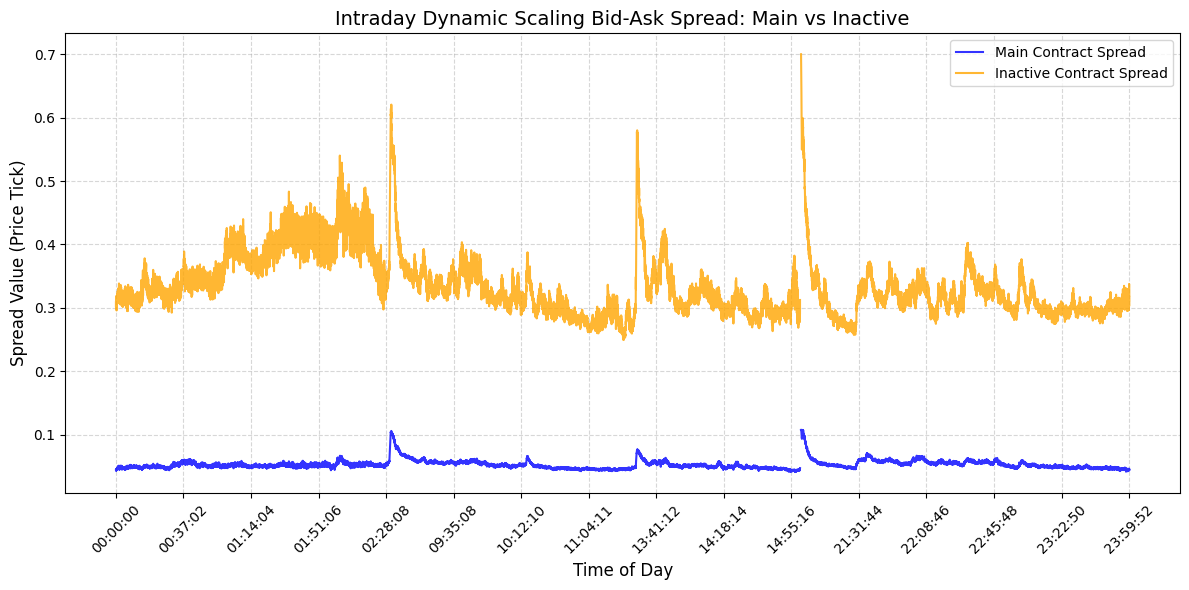

图表已保存为 'bid_ask_spread_comparison.png'


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_bid_ask_spread(df):
    df['time_str'] = df['timestamp'].dt.strftime('%H:%M:%S')
    
    print("正在聚合数据（计算日内均值）...")
    # 按时间分组，同时计算两个合约价差的均值
    # resulting_df 的索引(index)将是 time_str
    agg_df = df.groupby('time_str')[['dynamic_spread_robust_main_mean', 'dynamic_spread_robust_second_mean']].mean()
    
    # 3. 绘图
    print("开始绘图...")
    plt.figure(figsize=(12, 6), dpi=100)
    
    # 绘制主力合约曲线
    plt.plot(agg_df.index, agg_df['dynamic_spread_robust_main_mean'], 
             label='Main Contract Spread', color='blue', linewidth=1.5, alpha=0.8)
    
    # 绘制不活跃合约曲线
    plt.plot(agg_df.index, agg_df['dynamic_spread_robust_second_mean'], 
             label='Inactive Contract Spread', color='orange', linewidth=1.5, alpha=0.8)
    
    # --- 图表美化 ---
    plt.title('Intraday Dynamic Scaling Bid-Ask Spread: Main vs Inactive', fontsize=14)
    plt.ylabel('Spread Value (Price Tick)', fontsize=12)
    plt.xlabel('Time of Day', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # --- X轴刻度优化 ---
    # 因为 tick 数据量很大，X轴标签会非常密集，这里进行稀疏化处理
    # 每隔 total_points / 15 个点显示一个时间标签
    n_ticks = 15
    step = max(1, len(agg_df) // n_ticks)
    plt.xticks(ticks=range(0, len(agg_df), step), 
               labels=agg_df.index[::step], 
               rotation=45)
    
    plt.tight_layout()
    
    # 保存或显示
    plt.savefig('bid_ask_spread_comparison.png')
    plt.show()
    print("图表已保存为 'bid_ask_spread_comparison.png'")

# ================= 执行 =================
# 假设 final_merged_df 是您之前合并好的变量
if __name__ == "__main__":
    # 如果 final_merged_df 还没生成，请先运行上一段合并代码
    # 这里直接调用函数
    if 'final_merged_df_au' in locals() and not final_merged_df_au.empty:
        plot_bid_ask_spread(final_merged_df_au)
    else:
        print("请先确保 final_merged_df 已经加载并包含数据。")

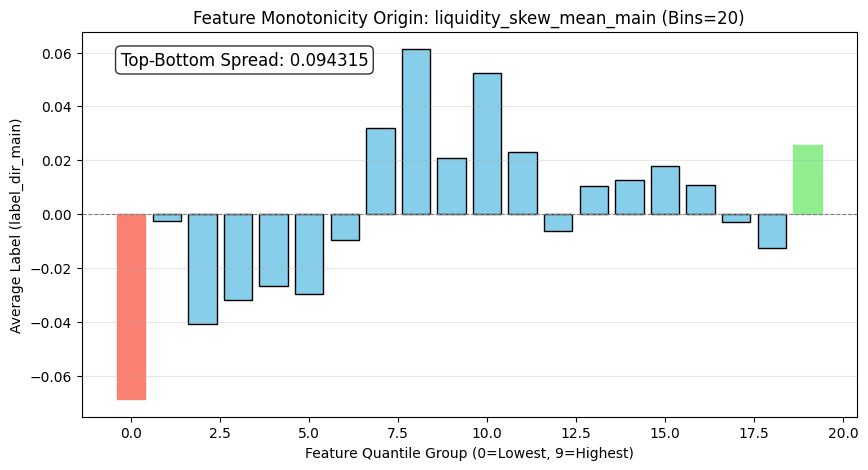

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_feature_spread(df, feature_col, label_col, quantile=0.1, group_by_day=True, day_col='trade_day'):
    """
    计算特征 Top N% 和 Bottom N% 的 Label 均值差 (Long-Short Spread)
    
    Args:
        df: DataFrame
        feature_col: 特征列名
        label_col: 标签列名 (预测目标，如收益率)
        quantile: 前后百分比 (默认 0.1，即 10%)
        group_by_day: 是否按天分组计算 (强烈建议 True，防止不同日期的市场Beta干扰)
        day_col: 日期列名 (当 group_by_day=True 时必填)
        
    Returns:
        dict: 包含 spread, top_mean, bottom_mean 的字典
    """
    
    # 内部函数：处理单个 Group 或整个 DataFrame
    def _calc_single_group(sub_df):
        # 去除空值
        sub_df = sub_df.dropna(subset=[feature_col, label_col])
        if len(sub_df) == 0:
            return pd.Series({'top': np.nan, 'bottom': np.nan, 'spread': np.nan})
            
        # 确定切分点
        n = len(sub_df)
        k = int(n * quantile)
        
        if k == 0: # 数据太少不足以切分
            return pd.Series({'top': np.nan, 'bottom': np.nan, 'spread': np.nan})
        
        # 按特征排序
        # ascending=True: 头部是小值(Bottom), 尾部是大值(Top)
        sorted_df = sub_df.sort_values(by=feature_col, ascending=True)
        
        # 提取 Bottom (特征最小的 10%)
        bottom_part = sorted_df.iloc[:k]
        # 提取 Top (特征最大的 10%)
        top_part = sorted_df.iloc[-k:]
        
        # 计算 Label 均值
        bottom_mean = bottom_part[label_col].mean()
        top_mean = top_part[label_col].mean()
        
        return pd.Series({
            'top_mean': top_mean,
            'bottom_mean': bottom_mean,
            'spread': top_mean - bottom_mean
        })

    # --- 模式 A: 按天分组计算 (推荐) ---
    if group_by_day:
        if day_col not in df.columns:
            raise ValueError(f"按天分组模式下，DataFrame 必须包含 '{day_col}' 列")
            
        print(f"正在按 {day_col} 分组计算每日 Spread...")
        daily_stats = df.groupby(day_col).apply(_calc_single_group)
        
        # 计算所有天数的平均值
        final_stats = daily_stats.mean()
        
        # 也可以返回 daily_stats 以便画出 spread 的时序图
        return {
            'spread': final_stats['spread'],
            'top_mean': final_stats['top_mean'], 
            'bottom_mean': final_stats['bottom_mean'],
            'daily_data': daily_stats # 附带每日详情
        }

    # --- 模式 B: 全局混合计算 (仅用于快速查看分布) ---
    else:
        result = _calc_single_group(df)
        return result.to_dict()

# ==========================================
# 2. 辅助：可视化函数 (分组柱状图)
# ==========================================
def plot_quantile_performance(df, feature_col, label_col, n_bins=20):
    """
    画出特征分层后的单调性柱状图
    """
    df_clean = df.dropna(subset=[feature_col, label_col]).copy()
    
    # 将特征分为 N 组
    # labeling=False 返回 0, 1, ... 9
    df_clean['group'] = pd.qcut(df_clean[feature_col], n_bins, labels=False, duplicates='drop')
    
    # 计算每组的 Label 均值
    group_means = df_clean.groupby('group')[label_col].mean()
    
    plt.figure(figsize=(10, 5))
    bars = plt.bar(group_means.index, group_means.values, color='skyblue', edgecolor='black')
    
    # 标记最高和最低组
    bars[0].set_color('salmon') # Bottom 10%
    bars[-1].set_color('lightgreen') # Top 10%
    
    plt.title(f"Feature Monotonicity Origin: {feature_col} (Bins={n_bins})")
    plt.xlabel("Feature Quantile Group (0=Lowest, 9=Highest)")
    plt.ylabel(f"Average Label ({label_col})")
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.grid(axis='y', alpha=0.3)
    
    # 计算简单的 spread
    spread = group_means.iloc[-1] - group_means.iloc[0]
    plt.text(0.05, 0.95, f"Top-Bottom Spread: {spread:.6f}", 
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))
    
    plt.show()

# ==========================================
# 使用示例
# ==========================================
if __name__ == "__main__":
    plot_quantile_performance(final_merged_df_au, 'liquidity_skew_mean_main', 'label_dir_main', n_bins=20)

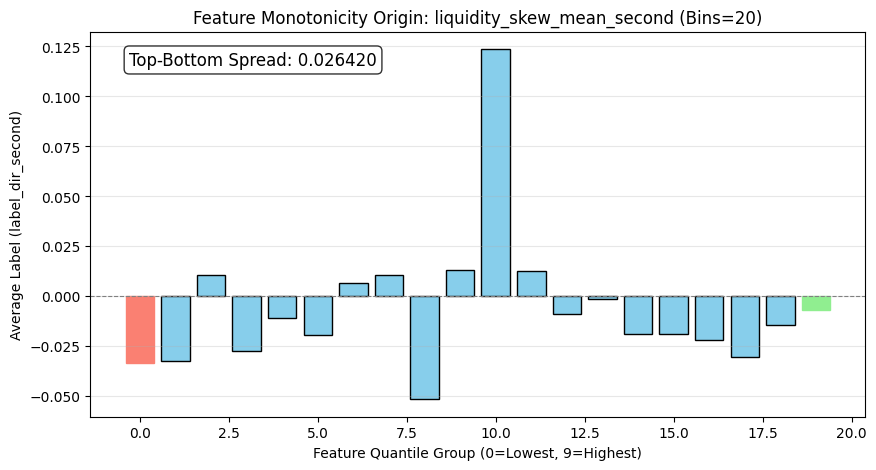

In [114]:
plot_quantile_performance(final_merged_df_au, 'liquidity_skew_mean_second', 'label_dir_second', n_bins=20)

In [88]:
(final_merged_df_au['ap5_main'] - final_merged_df_au['ap1_main']).describe()

count    1.649070e+06
mean     1.049483e-01
std      3.466714e-02
min      8.000000e-02
25%      8.000000e-02
50%      1.000000e-01
75%      1.200000e-01
max      9.600000e-01
dtype: float64

In [89]:
(final_merged_df_au['bp5_main'] - final_merged_df_au['bp1_main']).describe()

count    1.649070e+06
mean    -1.053608e-01
std      3.451379e-02
min     -1.280000e+00
25%     -1.200000e-01
50%     -1.000000e-01
75%     -8.000000e-02
max     -8.000000e-02
dtype: float64

In [90]:
(final_merged_df_au['bp5_second'] - final_merged_df_au['bp1_second']).describe()

count    1.649070e+06
mean    -3.099185e-01
std      1.768253e-01
min     -1.134000e+01
25%     -4.000000e-01
50%     -2.800000e-01
75%     -1.800000e-01
max     -8.000000e-02
dtype: float64

In [91]:
(final_merged_df_au['ap5_second'] - final_merged_df_au['ap1_second']).describe()

count    1.649070e+06
mean     3.057827e-01
std      1.749829e-01
min      8.000000e-02
25%      1.800000e-01
50%      2.800000e-01
75%      4.000000e-01
max      1.800000e+01
dtype: float64

In [117]:
import pandas as pd
daily_data = pd.read_parquet("/home/zyyuan/project2/feature_generate_all_np_ag_v5_intern_parquet/ag2506_20250425_features.parquet",columns = ['ExchActionDay'])
daily_data

,ExchActionDay
0,20250424
1,20250424
2,20250424
3,20250424
4,20250424
...,...
64714,20250425
64715,20250425
64716,20250425
64717,20250425


In [451]:
import pandas as pd
import numpy as np
import os
import glob
import warnings

# 忽略 pandas 的一些切片警告
warnings.filterwarnings('ignore')

# ================= 配置区域 =================
# 这里的路径需要根据你实际的存放位置修改
folder_main = '/home/zyyuan/market_data_au2512'    # 黄金 (Benchmark)
folder_second = '/home/zyyuan/market_data_ag2512'  # 白银 (Target)
file_pattern = '*.csv' 

# ================= 辅助函数: 识别合约乘数 =================
def get_contract_multiplier(file_path):
    """
    根据文件路径或文件名判断合约乘数
    黄金(au): 1000 克/手
    白银(ag): 15 千克/手
    """
    path_lower = file_path.lower()
    if 'au' in path_lower:
        return 1000
    elif 'ag' in path_lower:
        return 15
    else:
        # 默认值，防止未匹配到报错，或者打印警告
        print(f"Warning: 无法从路径 {file_path} 识别品种(au/ag)，默认乘数为 1")
        return 1

def calc_final_spread_rolling(df, is_main, 
                              multiplier=1.0, 
                              lambda_adj=0.3, 
                              rolling_window=60,  # 新增：滚动窗口大小
                              depth_mode='L1'):   # 新增：'L1' 或 'L1_5'
    """
    计算最终价差 (包含基于滚动窗口的补充流修正)
    
    参数:
    rolling_window: 计算补充速度的时间窗口 (例如 60 ticks)
    depth_mode: 'L1' (仅基于最优档) 或 'L1_5' (基于前5档总和)
    """
    
    # 1. 流量准备
    raw_buy_flow = df['dynamic_buy_orderflow'] * multiplier
    raw_sell_flow = df['dynamic_sell_orderflow'] * multiplier
    
    # 准备价格和量列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # ================= 2. OFI 补充流计算 (Rolling Logic) =================
    
    act_buy_col = f'active_buy_vol'
    act_sell_col = f'active_sell_vol'
    
    # 初始化修正流
    df['effective_buy_flow'] = raw_buy_flow
    df['effective_sell_flow'] = raw_sell_flow
    
    if act_buy_col in df.columns:
        # --- 2.1 确定深度 (Depth) 和 价格基准 (Price Basis) ---
        if depth_mode == 'L1':
            # 模式 A: 仅使用 L1
            ask_depth = df['av1']
            bid_depth = df['bv1']
            # L1 模式下，严格使用 ap1/bp1 变化判断 OFI
            ask_p = df['ap1']
            bid_p = df['bp1']
            
        elif depth_mode == 'L1_5':
            # 模式 B: 使用 L1-L5 总和
            # 聚合 5 档挂单量
            ask_depth = df[ask_vols].sum(axis=1)
            bid_depth = df[bid_vols].sum(axis=1)
            # L1-L5 模式下，通常使用 Mid Price 或 ap1/bp1 作为整体移动的锚点
            # 这里依然使用 ap1/bp1，假设如果最优价变了，整个 Orderbook 都在移动
            ask_p = df['ap1']
            bid_p = df['bp1']
        else:
            raise ValueError("depth_mode must be 'L1' or 'L1_5'")
            
        # --- 2.2 计算瞬时 OFI (Cont's Method) ---
        # 这里的 delta_depth 代表：排除价格变动干扰后的"净挂单增量"
        
        # Ask Side
        ask_p_prev = ask_p.shift(1)
        ask_d_curr = ask_depth
        ask_d_prev = ask_depth.shift(1)
        
        delta_ask_depth = pd.Series(0.0, index=df.index)
        # 价格不变：直接看量的变化
        delta_ask_depth[ask_p == ask_p_prev] = ask_d_curr - ask_d_prev
        # 价格涨了 (Ask被攻破/撤退)：旧的深度视为全部损失
        delta_ask_depth[ask_p > ask_p_prev] = -ask_d_prev 
        # 价格跌了 (Ask压进/补充)：新的深度视为全部增量
        delta_ask_depth[ask_p < ask_p_prev] = ask_d_curr 
        
        # 瞬时补充 = 深度净变化 + 被吃掉的量 (Active Buy)
        # 注意：如果用 L1_5 模式，理论上应该加回 "L1-5 范围内所有的成交"，
        # 但我们只有 total active buy，这里近似认为 active buy 消耗的是整体深度。
        replenishment_ask_inst = delta_ask_depth + df[act_buy_col]

        # Bid Side
        bid_p_prev = bid_p.shift(1)
        bid_d_curr = bid_depth
        bid_d_prev = bid_depth.shift(1)
        
        delta_bid_depth = pd.Series(0.0, index=df.index)
        delta_bid_depth[bid_p == bid_p_prev] = bid_d_curr - bid_d_prev
        delta_bid_depth[bid_p < bid_p_prev] = -bid_d_prev # 跌了，Bid被攻破
        delta_bid_depth[bid_p > bid_p_prev] = bid_d_curr # 涨了，Bid顶上
        
        replenishment_bid_inst = delta_bid_depth + df[act_sell_col]
        
        # --- 2.3 【核心修改】计算滚动平均补充速度 ---
        # 使用 rolling mean 平滑噪音
        # min_periods=1 保证刚开始也有数据
        rep_ask_rolling = replenishment_ask_inst.rolling(window=rolling_window, min_periods=1).mean()
        rep_bid_rolling = replenishment_bid_inst.rolling(window=rolling_window, min_periods=1).mean()
        
        vol_change_rolling = df['volume'].diff().abs().rolling(rolling_window, min_periods=1).mean()
        scale = vol_change_rolling.replace(0, 1) * 5 # *5 是一个经验放缩系数
        
        # 计算弹性系数
        resilience_ask = np.tanh(rep_ask_rolling / scale) * lambda_adj
        resilience_bid = np.tanh(rep_bid_rolling / scale) * lambda_adj
        
        # --- 2.5 应用修正 ---
        df['effective_buy_flow'] = raw_buy_flow * (1 - resilience_ask)
        df['effective_sell_flow'] = raw_sell_flow * (1 - resilience_bid)
        
        # 裁剪
        df['effective_buy_flow'] = df['effective_buy_flow'].clip(lower=0)
        df['effective_sell_flow'] = df['effective_sell_flow'].clip(lower=0)
        
    else:
        print("Warning: Active volume columns not found.")

    # ================= 3. 计算冲击成本 & 最终指标 =================
    
    # 计算 Impact
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['effective_buy_flow']), 
        axis=1
    )
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['effective_sell_flow']), 
        axis=1
    )
    
    # 最终价差与偏度
    suffix = '_main' if is_main else '_second'
    col_spread = f'dynamic_spread_robust'
    df[col_spread] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    # df[f'{col_spread}_mean'] = df[col_spread].rolling(240).mean()
    df[f'{col_spread}_mean'] = agg_ewma(df,col_spread,span = 240)
    col_skew = f'liquidity_skewness'
    df[col_skew] = (df['dynamic_ask_price'] - df['ap1']) - (df['bp1'] - df['dynamic_bid_price'])
    # df[f'liquidity_skew_mean{suffix}'] = df[col_skew].rolling(240).mean()
    df[f'liquidity_skew_mean'] = agg_ewma(df,col_skew,span = 240)
    
    return df

# ================= 基础数据处理 (修改版) =================
def process_single_file_basic(file_path):
    """
    读取单日文件，计算基础指标
    修正点：
    1. 根据品种自动匹配合约乘数 (1000 vs 15)
    2. 修正 VWAP 计算公式：Turnover_Diff / (Volume_Diff * Multiplier)
    """
    try:
        df = pd.read_csv(file_path)
        
        # 1. 自动获取合约乘数
        contract_size = get_contract_multiplier(file_path)
        
        # 2. 时间处理
        df['hms'] = pd.to_datetime(df['hms'])
        ms_delta = pd.to_timedelta(df['ms'], unit='ms')
        df['timestamp'] = df['hms'] + ms_delta
        
        # 3. 基础价差与中间价
        df['mid_price'] = (df['ap1'] + df['bp1']) / 2
        # 处理涨跌停
        df.loc[df['bp1'] == 0, 'mid_price'] = df.loc[df['bp1'] == 0, 'ap1']
        df.loc[df['ap1'] == 0, 'mid_price'] = df.loc[df['ap1'] == 0, 'bp1']
        
        # 4. 【核心修改】计算 VWAP 标签
        # 公式: 区间成交额 / (区间成交手数 * 合约乘数)
        if 'turnover' in df.columns:
            # 计算区间增量 (例如 600 ticks)
            vol_diff = df['volume'].diff(600)
            turnover_diff = df['turnover'].diff(600)
            
            # 替换 0 为 NaN 防止除零错误
            vol_diff = vol_diff.replace(0, np.nan)
            
            # 计算 VWAP (元/克 或 元/千克)
            # shift(-600) 表示这是未来一段时间的均价(Label)
            df['vwap_300'] = (turnover_diff / (vol_diff * contract_size)).shift(-600)
            
            # 补充: 如果开头有 NaN (diff导致) 或 结尾有 NaN (shift导致)，可根据需求填充
            # df['vwap_300'] = df['vwap_300'].fillna(method='bfill')
            
        else:
            # 降级方案
            df['vwap_300'] = df['mid_price'].shift(-600)

        # 其他标签计算 (依赖 vwap_300)
        df['label'] = (df['vwap_300'] - df['mid_price']).abs()
        df['label_ap'] = (df['vwap_300'] - df['ap1'])
        df['label_bp'] = df['bp1'] - df['vwap_300']
        df['label_dir'] = df['vwap_300'] - df['mid_price']

        df = calc_active_flow_matrix(df, price_type='mid', algo_type='proportional')

        # 6. 计算滚动流动性需求
        window_size = 60
        # 确保列存在
        if 'active_buy_vol' in df.columns:
            df['rolling_active_buy'] = df['active_buy_vol'].rolling(window=window_size).sum().fillna(0)
            df['rolling_active_sell'] = df['active_sell_vol'].rolling(window=window_size).sum().fillna(0)
            
            df['dynamic_buy_orderflow'] = (df['rolling_active_buy'] / window_size) * 2
            df['dynamic_sell_orderflow'] = (df['rolling_active_sell'] / window_size) * 2
            df['dynamic_orderflow_total'] = (df['dynamic_buy_orderflow'] + df['dynamic_sell_orderflow'])
        else:
            # 如果没有 active vol，给默认值防止报错
            df['dynamic_buy_orderflow'] = 0
            df['dynamic_sell_orderflow'] = 0
        
        # 7. 获取当日总成交额 (Turnover)
        if 'turnover' in df.columns:
            total_turnover = df['turnover'].iloc[-1]
        else:
            # 估算: Vol * Price * ContractSize
            total_turnover = df['volume'].iloc[-1] * df['mid_price'].iloc[-1] * contract_size

        current_date_ts = df['hms'].dt.normalize().iloc[0]
        
        return df, total_turnover, current_date_ts
        
    except Exception as e:
        print(f"基础处理出错 {file_path}: {e}")
        return None, 0, None

# ================= 主控制流 (黄金 vs 白银) =================
def main_pipeline():
    # 1. 获取文件列表
    files_au = sorted(glob.glob(os.path.join(folder_main, file_pattern)))
    files_ag = sorted(glob.glob(os.path.join(folder_second, file_pattern)))
    
    # 2. 预读取
    data_map_au, to_map_au = {}, {}
    data_map_ag, to_map_ag = {}, {}
    
    print(">>> 步骤1: 读取黄金 (Au) 数据...")
    for f in files_au:
        df, turnover, date = process_single_file_basic(f)
        if df is not None:
            data_map_au[date] = df
            to_map_au[date] = turnover
            
    print(">>> 步骤2: 读取白银 (Ag) 数据...")
    for f in files_ag:
        df, turnover, date = process_single_file_basic(f)
        if df is not None:
            data_map_ag[date] = df
            to_map_ag[date] = turnover
    
    # 3. 匹配日期
    common_dates = sorted(list(set(data_map_au.keys()) & set(data_map_ag.keys())))
    print(f"\n共找到 {len(common_dates)} 个匹配的交易日。")
    
    final_results = []
    
    # 状态变量
    prev_to_au = 0
    prev_to_ag = 0
    
    # 4. 逐日处理
    print("\n>>> 步骤3: 开始逐日计算 (Turnover Ratio Adjustment)...")
    for i, date in enumerate(common_dates):
        df_au = data_map_au[date]
        df_ag = data_map_ag[date]
        
        # --- 计算跨日调整系数 (Multiplier) ---
        # 逻辑：黄金成交额 / 白银成交额
        if i > 0 and prev_to_ag > 0:
            multiplier = 1.0
            
            # 阈值保护
            if multiplier > 50: multiplier = 50 
            if multiplier < 0.02: multiplier = 0.02
            
            log_msg = f"Turnover Ratio (Au/Ag): {multiplier:.2f}"
        else:
            multiplier = 1.0
            log_msg = "Use Default Multiplier: 1.0"
            
        print(f"[{date.date()}] {log_msg}") 
        
        # --- 计算指标 ---
        # 黄金：基准，Multiplier = 1.0
        res_au = calc_final_spread_rolling(
            df_au, is_main=True, multiplier=1.0, 
            lambda_adj=0.7, depth_mode='L1_5'
        )
        # print(res_au['volume'])
        # 白银：Target，应用 Multiplier 放大其 OrderFlow
        res_ag = calc_final_spread_rolling(
            df_ag, is_main=False, multiplier=multiplier, 
            lambda_adj=0.7, depth_mode='L1_5'
        )

        # --- 合并 ---
        daily_merged = pd.merge(
            res_au, 
            res_ag, 
            on='timestamp', 
            how='inner',
            suffixes=('_au', '_ag')
        )
        daily_merged['date'] = date
        daily_merged['turnover_multiplier'] = multiplier 
        
        final_results.append(daily_merged)
        
        # --- 更新状态 ---
        prev_to_au = to_map_au[date]
        prev_to_ag = to_map_ag[date]
        
    # 5. 输出
    if final_results:
        total_df = pd.concat(final_results[1:], ignore_index=True)
        print("\n>>> 处理完成!")
        return total_df
    else:
        print("未生成数据。")
        return None

if __name__ == "__main__":
    # 确保 calc_final_spread_rolling 等核心函数已在上下文中定义
    df_result = main_pipeline()

>>> 步骤1: 读取黄金 (Au) 数据...
>>> 步骤2: 读取白银 (Ag) 数据...

共找到 34 个匹配的交易日。

>>> 步骤3: 开始逐日计算 (Turnover Ratio Adjustment)...
[2025-09-17] Use Default Multiplier: 1.0
Calculating EWMA (span=240)...
Calculating EWMA (span=240)...
Calculating EWMA (span=240)...
Calculating EWMA (span=240)...
[2025-09-18] Turnover Ratio (Au/Ag): 1.00
Calculating EWMA (span=240)...
Calculating EWMA (span=240)...
Calculating EWMA (span=240)...
Calculating EWMA (span=240)...
[2025-09-19] Turnover Ratio (Au/Ag): 1.00
Calculating EWMA (span=240)...
Calculating EWMA (span=240)...
Calculating EWMA (span=240)...
Calculating EWMA (span=240)...
[2025-09-22] Turnover Ratio (Au/Ag): 1.00
Calculating EWMA (span=240)...
Calculating EWMA (span=240)...
Calculating EWMA (span=240)...
Calculating EWMA (span=240)...
[2025-09-23] Turnover Ratio (Au/Ag): 1.00
Calculating EWMA (span=240)...
Calculating EWMA (span=240)...
Calculating EWMA (span=240)...
Calculating EWMA (span=240)...
[2025-09-24] Turnover Ratio (Au/Ag): 1.00
Calculating EW

In [129]:
df_result['dynamic_spread_robust_ag'].describe()

count    2.095760e+06
mean     2.110822e+00
std      1.143086e+00
min      1.000000e+00
25%      1.284506e+00
50%      1.904091e+00
75%      2.553418e+00
max      3.972317e+01
Name: dynamic_spread_robust_ag, dtype: float64

In [ ]:
df_result['mid']

In [132]:
df_result['cost_bps_au'] = (df_result['dynamic_spread_robust_au'] / df_result['mid_price_au']) * 10000
df_result['cost_bps_ag'] = (df_result['dynamic_spread_robust_ag'] / df_result['mid_price_ag']) * 10000

In [134]:
df_result['cost_bps_au'].describe()

count    2.095760e+06
mean     1.092748e+00
std      1.595748e+00
min      1.999220e-01
25%      4.712424e-01
50%      7.069014e-01
75%      1.049379e+00
max      3.588681e+01
Name: cost_bps_au, dtype: float64

正在过滤休市时段数据 (保留 21:00-02:30 及 09:00-15:00)...
正在计算标准化流动性指标 (BPS)...
正在聚合数据并重排时间轴...
开始绘图...


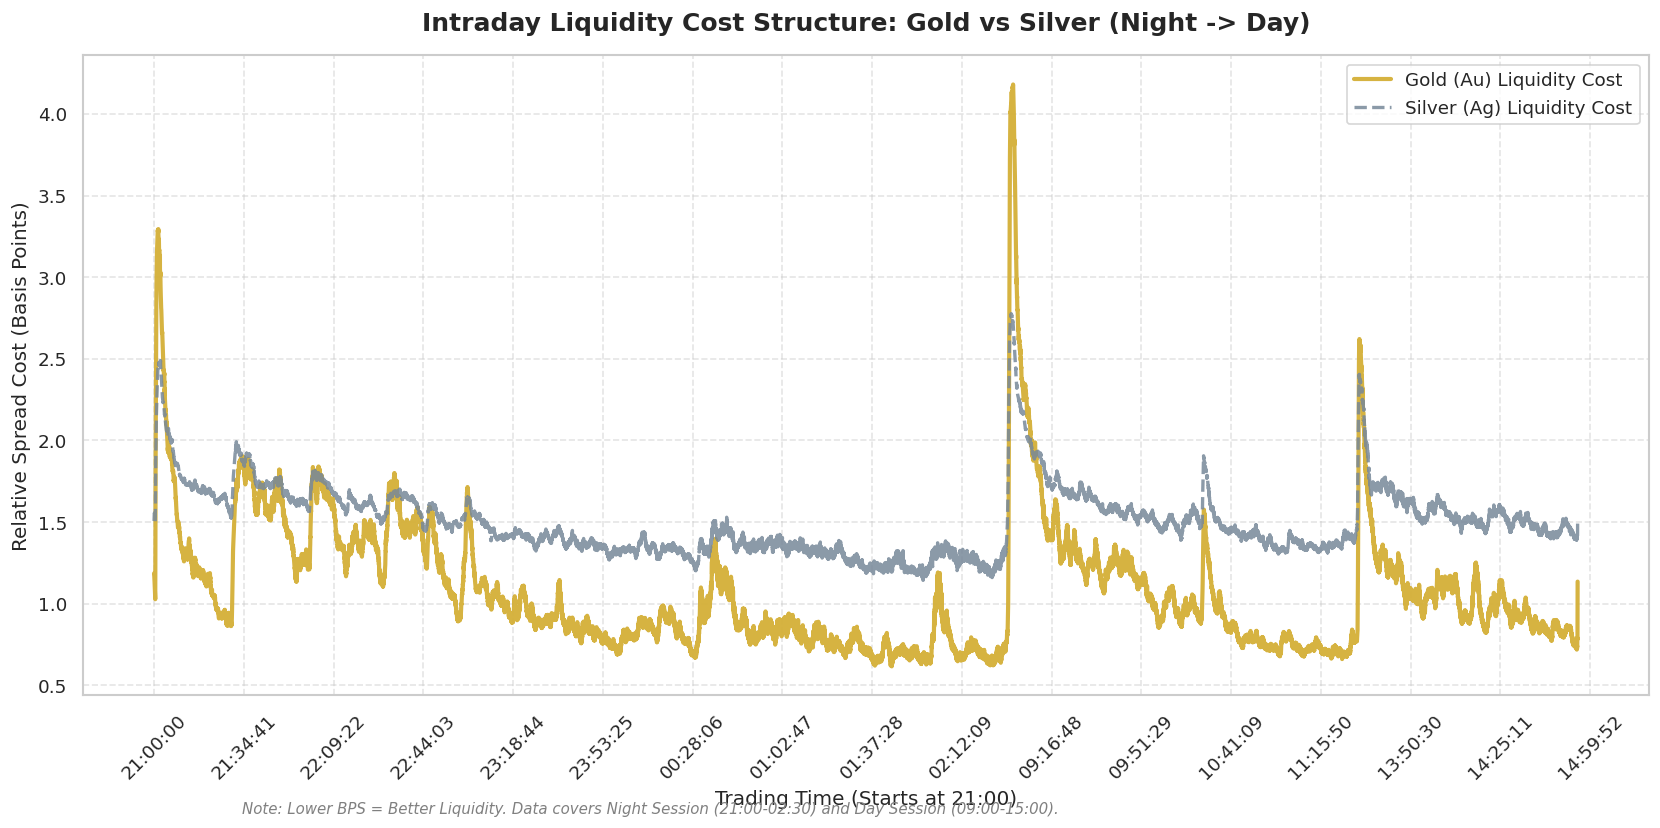

图表已保存为 'gold_vs_silver_liquidity_sorted.png'


In [580]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

def plot_gold_vs_silver_liquidity(df):
    """
    绘制黄金与白银的日内流动性对比图 (标准化为 BPS)，
    并应用交易时间排序 (夜盘 21:00 -> 日盘 15:00)
    """
    # 1. 确保时间格式正确
    if not pd.api.types.is_datetime64_any_dtype(df['timestamp']):
        df['timestamp'] = pd.to_datetime(df['timestamp'])

    # ================= [步骤1] 过滤休市时段 =================
    print("正在过滤休市时段数据 (保留 21:00-02:30 及 09:00-15:00)...")
    _hours = df['timestamp'].dt.hour
    _minutes = df['timestamp'].dt.minute
    
    # 逻辑：
    # 1. 小时 >= 21 (夜盘)
    # 2. 小时 < 15  (日盘)
    # 3. 小时 == 15 且 分钟 == 0 (保留收盘那一刻)
    condition = (
        (_hours >= 21) | 
        (_hours < 15) | 
        ((_hours == 15) & (_minutes == 0))
    )
    
    df_clean = df[condition].copy()
    
    # ================= [步骤2] 计算 BPS (标准化流动性成本) =================
    print("正在计算标准化流动性指标 (BPS)...")
    
    # 容错处理：优先用 VWAP，没有则用 mid_price
    # 黄金 (Au)
    if 'vwap_300_au' in df_clean.columns:
        denom_au = df_clean['vwap_300_au']
    else:
        denom_au = df_clean['mid_price_au']
    
    # 白银 (Ag)
    if 'vwap_300_ag' in df_clean.columns:
        denom_ag = df_clean['vwap_300_ag']
    else:
        denom_ag = df_clean['mid_price_ag']

    # 计算基点公式: (Spread / Price) * 10000
    df_clean['bps_au'] = (df_clean['dynamic_spread_robust_mean_au'] / denom_au) * 10000
    df_clean['bps_ag'] = (df_clean['dynamic_spread_robust_mean_ag'] / denom_ag) * 10000

    # ================= [步骤3] 聚合与排序 =================
    df_clean['time_str'] = df_clean['timestamp'].dt.strftime('%H:%M:%S')

    print("正在聚合数据并重排时间轴...")
    # 按时间分组求均值
    agg_df = df_clean.groupby('time_str')[['bps_au', 'bps_ag']].mean()
    
    # 重置索引以便进行排序操作
    agg_df = agg_df.reset_index()

    # --- 核心排序逻辑 (关键点) ---
    def get_timedelta_key(time_str):
        t = pd.to_timedelta(time_str)
        # 如果是 18:00 之后的时间 (夜盘)，保持原值
        # 如果是 18:00 之前的时间 (凌晨/白天)，加一天，排在后面
        if t.components.hours >= 18:
            return t
        else:
            return t + pd.Timedelta(days=1)
            
    agg_df['sort_val'] = agg_df['time_str'].apply(get_timedelta_key)
    agg_df = agg_df.sort_values('sort_val')
    
    # 恢复索引用于绘图
    agg_df = agg_df.set_index('time_str')

    # ================= [步骤4] 绘图 =================
    print("开始绘图...")
    plt.figure(figsize=(14, 7), dpi=120) 
    
    x_indices = range(len(agg_df))
    
    # --- 绘制黄金曲线 (Gold) ---
    plt.plot(x_indices, agg_df['bps_au'], 
             label='Gold (Au) Liquidity Cost', 
             color='#D4AF37',  # 金属金
             linewidth=2.5,    # 主线稍微加粗
             alpha=0.95)
    
    # --- 绘制白银曲线 (Silver) ---
    plt.plot(x_indices, agg_df['bps_ag'], 
             label='Silver (Ag) Liquidity Cost', 
             color='#778899',  # LightSlateGray
             linewidth=2.0, 
             alpha=0.85,
             linestyle='--')   # 白银用虚线，便于区分
    
    # --- 图表美化 ---
    plt.title('Intraday Liquidity Cost Structure: Gold vs Silver (Night -> Day)', fontsize=15, pad=15, fontweight='bold')
    plt.ylabel('Relative Spread Cost (Basis Points)', fontsize=12)
    plt.xlabel('Trading Time (Starts at 21:00)', fontsize=12)
    
    # 图例
    plt.legend(frameon=True, loc='upper right', fontsize=11)
    
    # 网格
    plt.grid(True, which='major', linestyle='--', alpha=0.5)
    
    # --- X轴刻度优化 (Smart Ticks) ---
    n_ticks = 16
    step = max(1, len(agg_df) // n_ticks)
    
    tick_locs = x_indices[::step]
    tick_labels = agg_df.index[::step]
    
    plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)
    
    # 在图表下方添加说明
    plt.figtext(0.15, 0.02, 
                'Note: Lower BPS = Better Liquidity. Data covers Night Session (21:00-02:30) and Day Session (09:00-15:00).', 
                fontsize=9, color='gray', style='italic')

    plt.tight_layout()
    
    # 保存与显示
    save_path = 'gold_vs_silver_liquidity_sorted.png'
    plt.savefig(save_path)
    plt.show()
    print(f"图表已保存为 '{save_path}'")

# ================= 执行 =================
if __name__ == "__main__":
    # 请确保您的 df_result 包含以下列:
    # 'timestamp', 'mid_price_au', 'mid_price_ag', 
    # 'dynamic_spread_robust_mean_au', 'dynamic_spread_robust_mean_ag'
    if 'df_result' in locals() and not df_result.empty:
        plot_gold_vs_silver_liquidity(df_result)
    else:
        print("请确保 df_result 变量存在且包含数据。")

In [138]:
train_data = pd.read_pickle("/home/zyyuan/project2/traindata_augmented_120_newc.pkl")
train_data.columns

Index(['f_10_1_mean', 'f_10_2_mean', 'f_10_3_mean', 'f_10_4_mean',
       'f_10_5_mean', 'f_10_6_mean', 'f_10_7_mean', 'f_11_1_mean',
       'f_11_2_mean', 'f_11_3_mean',
       ...
       'rolling_amp_map', 'gate_rv_map', 'gate_downside_ratio_map',
       'gate_rv_log_map', 'gate_range_log_map', 'delta_vol_1_map',
       'delta_vol_2_map', 'delta_vol_4_map', 'delta_vol_8_map',
       'delta_vol_16_map'],
      dtype='object', length=4227)

In [143]:
train_data['dynamic_spread_robust_mean'].describe()

count    68157.000000
mean         1.119316
std          0.149931
min          1.000000
25%          1.031363
50%          1.073659
75%          1.151561
max          3.922234
Name: dynamic_spread_robust_mean, dtype: float64

开始重训 (Refitting) - 使用特征数: 79
Training until validation scores don't improve for 50 rounds
[20]	valid_0's rmse: 6.93241
[40]	valid_0's rmse: 6.91964
[60]	valid_0's rmse: 6.9102
[80]	valid_0's rmse: 6.89862
[100]	valid_0's rmse: 6.89076
[120]	valid_0's rmse: 6.88484
[140]	valid_0's rmse: 6.87905
[160]	valid_0's rmse: 6.87057
[180]	valid_0's rmse: 6.86398
[200]	valid_0's rmse: 6.85972
[220]	valid_0's rmse: 6.8552
[240]	valid_0's rmse: 6.85293
[260]	valid_0's rmse: 6.85094
[280]	valid_0's rmse: 6.8496
[300]	valid_0's rmse: 6.84884
Did not meet early stopping. Best iteration is:
[291]	valid_0's rmse: 6.84807

>>> 正在评估重训模型性能...


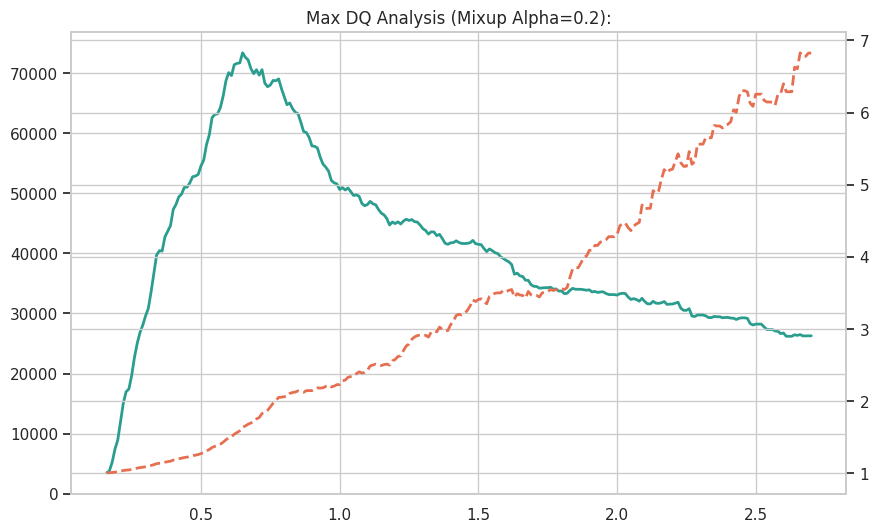

----------------------------------------
Refit Results (Mixup Alpha=0.2):
Feature Count : 79
Validation IC : 0.189828
Validation RMSE: 6.848075
----------------------------------------


In [582]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

LGB_PARAMS = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.01,
    'num_leaves': 63,
    'max_depth': 6,
    'feature_fraction': 0.3,
    'bagging_fraction': 0.8, 
    'bagging_freq': 5,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'n_jobs': 4,
    'verbose': -1,
    'seed': 42
}

# =============================================================================
#  1. 新增：Mixup 数据增强函数
# =============================================================================
def mixup_dataframe(df, feature_cols, label_col, alpha=0.2, augment_ratio=1.0, seed=42):
    """
    对 DataFrame 进行 Mixup 增强
    Args:
        alpha: Beta分布参数 (推荐 0.1~0.4)
        augment_ratio: 增强数据量比例 (1.0 表示增加一倍数据)
    """
    if alpha <= 0 or augment_ratio <= 0:
        return df

    print(f">>> 执行 Mixup 增强 (alpha={alpha}, ratio={augment_ratio})...")
    np.random.seed(seed)
    
    # 提取数据矩阵
    X = df[feature_cols].values
    y = df[label_col].values
    n_samples = len(df)
    n_augment = int(n_samples * augment_ratio)
    
    # 随机索引
    idx_i = np.random.choice(n_samples, n_augment, replace=True) # 样本 A
    idx_j = np.random.permutation(idx_i)                         # 样本 B
    
    # 生成 Lambda (Beta 分布)
    lam = np.random.beta(alpha, alpha, size=n_augment)
    lam_x = lam.reshape(-1, 1) # 广播用于特征矩阵
    print(lam_x)
    # 线性插值
    X_new = lam_x * X[idx_i] + (1 - lam_x) * X[idx_j]
    y_new = lam * y[idx_i] + (1 - lam) * y[idx_j]
    
    # 构建新 DataFrame
    df_new = pd.DataFrame(X_new, columns=feature_cols)
    df_new[label_col] = y_new
    
    # 拼接 (Original + Mixup)
    df_aug = pd.concat([df[feature_cols + [label_col]], df_new], axis=0).reset_index(drop=True)
    
    print(f"    原始样本: {n_samples} -> 增强后: {len(df_aug)}")
    return df_aug
    # return df_new

# =============================================================================
#  2. 修改后的主训练函数
# =============================================================================
def retrain_with_selected_features(train_df, valid_df, selected_features, params=LGB_PARAMS, label_col='prj2_1_label', mixup_alpha=0.2):
    """
    仅使用筛选后的 top_factors 进行重训并评估 (集成了 Mixup)
    """
    print(f"========================================")
    print(f"开始重训 (Refitting) - 使用特征数: {len(selected_features)}")
    print(f"========================================")
    
    # --- [修改点]：在此处对训练集进行 Mixup 增强 ---
    # 仅增强 Train，绝不增强 Valid
    if mixup_alpha > 0:
        train_df_final = mixup_dataframe(
            train_df, 
            selected_features, 
            label_col, 
            alpha=mixup_alpha, 
            augment_ratio=0.0 # 默认增加一倍数据
        )
    else:
        train_df_final = train_df

    # 1. 构建精简版 Dataset
    # 注意：这里使用 train_df_final (可能是增强过的)
    train_data = lgb.Dataset(
        train_df_final[selected_features], 
        label=train_df_final[label_col], 
        feature_name=selected_features
    )
    
    # 验证集保持原样 valid_df
    valid_data = lgb.Dataset(
        valid_df[selected_features], 
        label=valid_df[label_col], 
        feature_name=selected_features,
        reference=train_data 
    )
    
    # 2. 训练模型 (参数保持不变)
    model = lgb.train(
        params,
        train_data,
        num_boost_round=300,
        valid_sets=[valid_data],
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=20)
        ]
    )
    
    # 3. 评估效果 (保持原代码不变)
    print("\n>>> 正在评估重训模型性能...")
    
    # 预测验证集
    valid_preds = model.predict(valid_df[selected_features], num_iteration=model.best_iteration)
    # valid_preds = model.predict(valid_df[selected_features])
    valid_df['pred'] = valid_preds
    thresholds = np.arange(0.0, 10.0, 0.01)
    max_dq = -np.inf
    results = []
    
    for threshold in thresholds:
            buy_mask = valid_df['pred'] > threshold
            sell_mask = valid_df['pred'] <  -1*threshold
            pnl_buy_raw = valid_df.loc[buy_mask,'prj2_1_label'] - (0.5/10000)*valid_df.loc[buy_mask,'LABEL_CAL_DQ_inst1_60']
            pnl_sell_raw = -1*valid_df.loc[sell_mask,'prj2_1_label'] - (0.5/10000)*valid_df.loc[sell_mask,'LABEL_CAL_DQ_inst1_60']
            # print(valid_df.loc[buy_mask,'LABEL_CAL_DQ_inst1_60'].sum(),valid_df.loc[sell_mask,'LABEL_CAL_DQ_inst1_60'].sum())
            # pnl_buy_raw = valid_df.loc[buy_mask,'prj2_1_label']
            # pnl_sell_raw = -1*valid_df.loc[sell_mask,'prj2_1_label']
            DQ_buy = np.sum(pnl_buy_raw)
            DQ_sell = np.sum(pnl_sell_raw)
            # print(0.44*len(pnl_buy_raw),0.44*len(pnl_sell_raw),DQ_buy+DQ_sell)
            DQ = DQ_buy + DQ_sell
            count = len(pnl_buy_raw) + len(pnl_sell_raw)
            if count == 0:
                continue     
            final_DQ = 15 * DQ 
            if final_DQ > max_dq:
                max_dq = final_DQ
            abs_move = np.abs(pnl_buy_raw).sum() + np.abs(pnl_sell_raw).sum()
            dq_neg = (abs_move - DQ) / 2.0
            dq_pos = DQ + dq_neg
            dqr = dq_pos / dq_neg if dq_neg != 0 else 0
            results.append({
                'Threshold': threshold, 
                'DQ': final_DQ, 
                'DQR': dqr, 
                'Count': len(pnl_buy_raw) + len(pnl_sell_raw)
            })
    df_res = pd.DataFrame(results)
    df_res = df_res[(df_res['Count']>160)&(df_res['DQ']>0)]
    df_res['Avg_pnl'] = df_res['DQ']/(df_res['Count']*15)
    if not df_res.empty:
            sns.set_theme(style="whitegrid")
            fig, ax1 = plt.subplots(figsize=(10, 6))
            ax1.plot(df_res['Threshold'], df_res['DQ'], color='#2a9d8f', linewidth=2, label='DQ')
            ax2 = ax1.twinx()
            ax2.plot(df_res['Threshold'], df_res['DQR'], color='#e76f51', linestyle='--', linewidth=2, label='DQR')
            plt.title(f"Max DQ Analysis (Mixup Alpha={mixup_alpha}):")
            plt.show()
            
    # 计算 IC
    ic, p_value = pearsonr(valid_preds, valid_df[label_col].values)
    
    # 计算 RMSE
    mse = np.mean((valid_preds - valid_df[label_col].values) ** 2)
    rmse = np.sqrt(mse)
    
    print(f"----------------------------------------")
    print(f"Refit Results (Mixup Alpha={mixup_alpha}):")
    print(f"Feature Count : {len(selected_features)}")
    print(f"Validation IC : {ic:.6f}")
    print(f"Validation RMSE: {rmse:.6f}")
    print(f"----------------------------------------")
    
    return model, {'ic': ic, 'rmse': rmse},df_res

# ================= 使用示例 =================

if __name__ == "__main__":
    if True:
        # 假设 imp_df 和 train_df, valid_df 已经准备好
        # 这里为了演示，请确保路径和变量名与你实际环境一致
        top_n = 300
        imp_df = pd.read_csv("/home/zyyuan/project2/feature_importance.csv")
        top_factors = imp_df.head(top_n)['feature'].tolist()
        train_new = pd.read_pickle("/home/zyyuan/project2/train_with_vae_new.pkl")
        valid_new = pd.read_pickle("/home/zyyuan/project2/valid_with_vae_new.pkl")
        # train_new = pd.read_pickle("/home/zyyuan/project2/traindata_market.pkl")
        # valid_new = pd.read_pickle("/home/zyyuan/project2/validdata_market.pkl")
        # 调用训练，开启 Mixup
        final_model, metrics,df_res = retrain_with_selected_features(
            train_new, 
            valid_new, 
            # [f'vae_latent_{i}' for i in range(64)]+['is_pm','is_am','is_night','gate_session_decay','gate_open_impulse'],
            [f'vae_latent_{i}' for i in range(64)]+['is_pm','is_am','is_night','gate_session_decay','gate_open_impulse','liquidity_skew_mean','dynamic_spread_robust_mean','ret_kurt_120','PSY_60','amihud_ratio_60','mfi_30m','cci_30','rs_vol_30','channel_position','rp_momentum_600'],
            # [f'vae_latent_{i}' for i in range(64)],
            # top_factors,
            # factor_list+['is_pm','is_am','is_night','gate_session_decay','gate_open_impulse'],
            params=LGB_PARAMS,
            mixup_alpha=0.2  # 开启 Mixup，推荐 0.1 ~ 0.4
        )
        
        final_model.save_model(f'lgbm_mixup_top{top_n}_model.txt')

In [583]:
df_res

,Threshold,DQ,DQR,Count,Avg_pnl
16,0.16,3476.446676,1.008285,12166,0.019050
17,0.17,3806.411316,1.009192,12006,0.021136
18,0.18,5273.756613,1.012918,11842,0.029690
19,0.19,7428.766403,1.018458,11695,0.042347
20,0.20,8937.041822,1.022654,11516,0.051737
...,...,...,...,...,...
266,2.66,26479.526848,6.829022,166,10.634348
267,2.67,26257.916443,6.780238,164,10.673950
268,2.68,26257.916443,6.780238,164,10.673950
269,2.69,26273.739773,6.824854,162,10.812239


In [567]:
df_res[df_res['DQR']>=1.5]['DQ'].max(),df_res[df_res['DQR']>=2]['DQ'].max(),df_res['DQ'].max()

(np.float64(73373.06907730873),
 np.float64(69032.3402586775),
 np.float64(73373.06907730873))

In [327]:
print(valid_new.shape)

(15067, 4657)


In [539]:
if __name__ == "__main__":
    # 假设你之前已经运行了筛选代码，并且有了 feature_imp DataFrame
    # 这里的 feature_imp 是你上一步得到的
    factor_res = pd.DataFrame(columns = ['ic','maxDQ','maxDQ(DQR>=2)'])
    factorlist = train_new.columns[-327:-87]
    context_factors=['is_pm','is_am','is_night','gate_session_decay','gate_open_impulse','liquidity_skew_mean','dynamic_spread_robust_mean','ret_kurt_120','PSY_60','amihud_ratio_60','mfi_30m','cci_30','rs_vol_30','channel_position']
    for factor in factorlist:
        # train_df = pd.read_pickle("/home/zyyuan/project2/train_with_vae.pkl")
        # valid_df = pd.read_pickle("/home/zyyuan/project2/valid_with_vae.pkl")
        # 1. 获取 Top Factors (例如 Top 50 或 累计贡献95%)
        # 策略: 取 Top 50 个最强特征
        if factor in context_factors or (not np.issubdtype(train_new[factor].dtype, np.number)):
             continue
        top_n = 300
        imp_df = pd.read_csv("/home/zyyuan/project2/feature_importance.csv")
        top_factors = imp_df.head(top_n)['feature'].tolist()
        new_factors = imp_df['feature'].tolist()
        # 2. 只有这些特征进行重训
        final_model, metrics,df_res = retrain_with_selected_features(
            train_new, 
            valid_new, 
            # [f'vae_latent_{i}' for i in range(64)],
            # top_factors,
            [f'vae_latent_{i}' for i in range(64)]+context_factors+[factor],
            # [f'market_latent_{i}' for i in range(16)]+[f'vae_latent_{i}' for i in range(64)], 
            # [f'market_latent_{i}' for i in range(64)],
            params=LGB_PARAMS
        )
        factor_res.loc[factor] = [metrics['ic'],df_res['DQ'].max(),df_res[df_res['DQR']>=2]['DQ'].max()]

factor_res.sort_values(by = 'ic',ascending=False)

开始重训 (Refitting) - 使用特征数: 79
Training until validation scores don't improve for 50 rounds
[20]	valid_0's rmse: 6.9332
[40]	valid_0's rmse: 6.92031
[60]	valid_0's rmse: 6.90986
[80]	valid_0's rmse: 6.89765
[100]	valid_0's rmse: 6.89039
[120]	valid_0's rmse: 6.88544
[140]	valid_0's rmse: 6.8819
[160]	valid_0's rmse: 6.87385
[180]	valid_0's rmse: 6.87015
[200]	valid_0's rmse: 6.86736
[220]	valid_0's rmse: 6.86308
[240]	valid_0's rmse: 6.86198
[260]	valid_0's rmse: 6.8594
[280]	valid_0's rmse: 6.85771
[300]	valid_0's rmse: 6.85748
Did not meet early stopping. Best iteration is:
[290]	valid_0's rmse: 6.85683

>>> 正在评估重训模型性能...
----------------------------------------
Refit Results (Mixup Alpha=0.2):
Feature Count : 79
Validation IC : 0.179680
Validation RMSE: 6.856827
----------------------------------------
开始重训 (Refitting) - 使用特征数: 79
Training until validation scores don't improve for 50 rounds
[20]	valid_0's rmse: 6.93336
[40]	valid_0's rmse: 6.92042
[60]	valid_0's rmse: 6.9101
[80]	vali

KeyboardInterrupt: 

In [530]:
factor_res.sort_values(by = 'ic',ascending=False)

,ic,maxDQ,maxDQ(DQR>=2)
ret_600,0.738130,689329.893247,689329.893247
tick100_ret,0.226044,103109.425144,80946.025685
netflow_30min_std,0.196309,64302.478119,58323.314076
weight_buysell_30,0.190355,64522.542286,57730.045623
vol_entropy,0.189694,67342.523491,63036.344804
...,...,...,...
cvar_30,0.156593,57692.030341,35465.276103
ES,0.156141,66539.782556,34735.378728
effective_spread,0.156141,66539.782556,34735.378728
Ivol_30,0.153659,57589.408806,33183.960559


In [256]:
factordata = pd.read_pickle("/home/zyyuan/project2/factor_all.pkl")
train_new = pd.read_pickle("/home/zyyuan/project2/train_with_vae.pkl")
valid_new = pd.read_pickle("/home/zyyuan/project2/valid_with_vae.pkl")
train_new = pd.merge(left = train_new,right = factordata[['timestamp','amihud_ratio_60','spread','effective_spread','amihud_ratio_10']],on = ['timestamp'],how = 'left')
valid_new = pd.merge(left = valid_new,right = factordata[['timestamp','amihud_ratio_60','spread','effective_spread','amihud_ratio_10']],on = ['timestamp'],how = 'left')

In [232]:
factordata['amihud_ratio_10']

59            NaN
119           NaN
179           NaN
239           NaN
299           NaN
           ...   
59219    0.000016
59279    0.000017
59339    0.000016
59399    0.000017
59459    0.000016
Name: amihud_ratio_10, Length: 88869, dtype: float32

In [190]:
train_new['ap1']

KeyError: 'ap1'

>>> 开始计算 SHAP 值...

[1] 全局特征重要性概览 (Summary Plot)


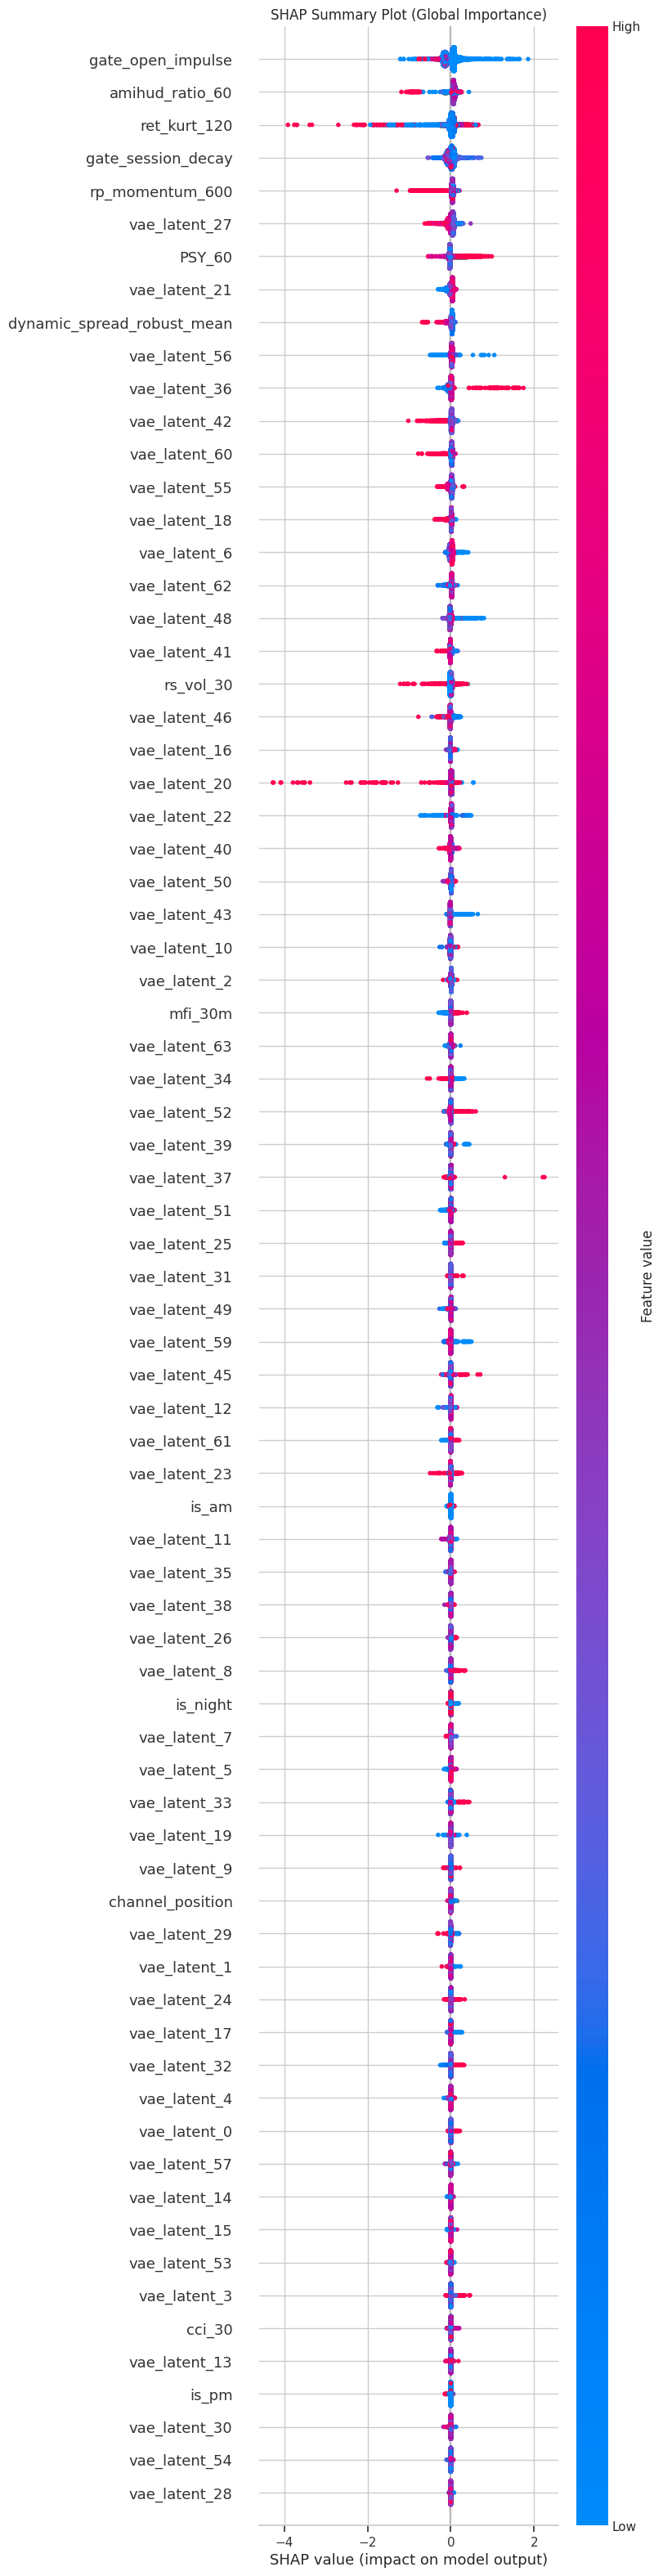


[2] 目标特征依赖分析 (Dependence Plot)


In [542]:
import shap
import matplotlib.pyplot as plt

def analyze_specific_features_shap(model, df, feature_cols, target_features, sample_size=5000):
    """
    计算 SHAP 值并针对特定特征进行可视化
    
    Args:
        model: 训练好的 LightGBM 模型对象
        df: 用于解释的数据集 (建议使用验证集 valid_df)
        feature_cols: 训练时使用的所有特征列表 (顺序必须一致)
        target_features: 需要重点分析的特征列表 ['feat1', 'feat2']
        sample_size: 采样数量，防止数据量过大导致绘图慢
    """
    print(">>> 开始计算 SHAP 值...")
    
    # 1. 数据采样 (SHAP计算较慢，如果数据量大建议采样)
    if len(df) > sample_size:
        X_sample = df[feature_cols].sample(n=sample_size, random_state=42)
    else:
        X_sample = df[feature_cols]
        
    # 2. 创建解释器 (TreeExplainer 针对 GBDT 进行了优化)
    explainer = shap.TreeExplainer(model)
    
    # 3. 计算 SHAP 值
    # shap_values 返回的是一个矩阵，行是样本，列是特征，值是该特征对预测结果的贡献度
    shap_values = explainer.shap_values(X_sample)
    
    # 注意: 如果是二分类问题，shap_values 可能是一个 list，需要取 shap_values[1]
    # 但根据你的代码 'objective': 'regression'，直接使用即可

    # ==========================================
    # 可视化 1: 全局重要性 (Summary Plot)
    # ==========================================
    print(f"\n[1] 全局特征重要性概览 (Summary Plot)")
    plt.figure(figsize=(10, 8))
    # max_display 控制显示的特征数量，我们确保能看到目标特征
    shap.summary_plot(shap_values, X_sample, plot_type="dot", max_display=75, show=False)
    plt.title("SHAP Summary Plot (Global Importance)")
    plt.show()

    # ==========================================
    # 可视化 2: 目标特征依赖图 (Dependence Plot)
    # ==========================================
    print(f"\n[2] 目标特征依赖分析 (Dependence Plot)")
    for feat in target_features:
        if feat in feature_cols:
            print(f"Plotting dependence for: {feat}")
            
            # 创建画布
            fig, ax = plt.subplots(figsize=(8, 5))
            
            # dependence_plot 展示：X轴是特征值，Y轴是SHAP值
            # interaction_index='auto' 会自动寻找最强交互特征并着色
            shap.dependence_plot(
                feat, 
                shap_values, 
                X_sample, 
                interaction_index='auto', # 自动寻找交互特征
                ax=ax,
                show=False
            )
            plt.title(f"SHAP Dependence: {feat}")
            plt.tight_layout()
            plt.show()
        else:
            print(f"Warning: 特征 {feat} 不在模型特征列表中，跳过。")

# ================= 使用示例 =================

# 1. 确定训练时使用的特征列表 (必须与 retrain_with_selected_features 中传入的一致)
feature_cols = [f'vae_latent_{i}' for i in range(64)] + ['is_pm','is_am','is_night','gate_session_decay','gate_open_impulse','liquidity_skew_mean','dynamic_spread_robust_mean','ret_kurt_120','PSY_60','amihud_ratio_60','mfi_30m','cci_30','rs_vol_30','channel_position','rp_momentum_600']

# 2. 确定你要重点观察的两个特征
# target_feats = ['liquidity_skew_mean', 'dynamic_spread_robust_mean']
target_feats = []
# 3. 调用函数 (假设 final_model 和 valid_new 就在上下文中)
# 注意：valid_new 必须包含 feature_cols 中的所有列
if 'final_model' in locals() and 'valid_new' in locals():
    analyze_specific_features_shap(
        model=final_model,
        df=valid_new,
        feature_cols=feature_cols,
        target_features=target_feats,
        sample_size=10000  # 建议取 10000 个样本观察
    )
else:
    print("请先运行训练代码以生成 final_model 和 valid_new。")

>>> 开始计算 SHAP 值 (Pure Mode)...

>>> 绘制目标特征 SHAP 散点图
Plotting for: deep_spread_rolling


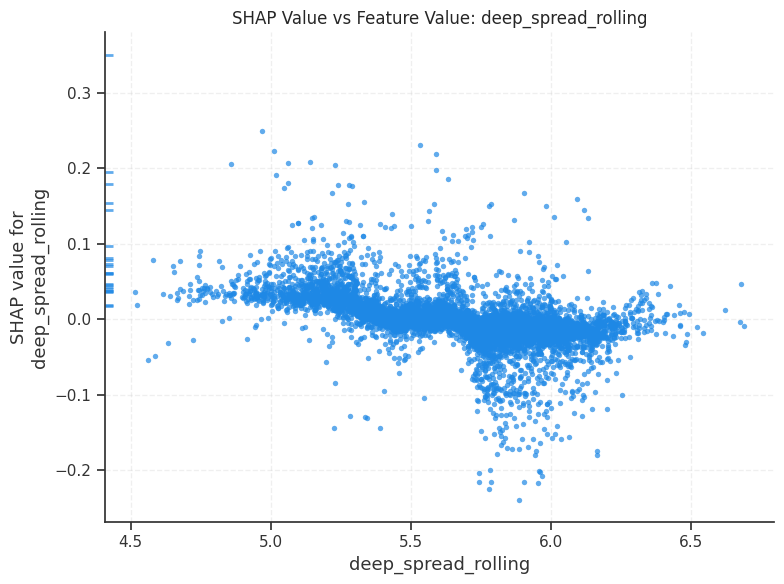

In [285]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_target_feature_shap_pure(model, df, feature_cols, target_features, sample_size=5000):
    """
    计算 SHAP 值并仅展示目标特征的 SHAP 散点图 (不包含交互特征着色)
    
    Args:
        model: 训练好的 LightGBM 模型对象
        df: 用于解释的数据集
        feature_cols: 训练特征列表
        target_features: 需要绘制的目标特征列表
        sample_size: 采样大小
    """
    print(">>> 开始计算 SHAP 值 (Pure Mode)...")
    
    # 1. 数据采样
    if len(df) > sample_size:
        X_sample = df[feature_cols].sample(n=sample_size, random_state=42)
    else:
        X_sample = df[feature_cols]
        
    # 2. 创建解释器
    explainer = shap.TreeExplainer(model)
    
    # 3. 计算 SHAP 值
    shap_values = explainer.shap_values(X_sample)
    
    # 如果是二分类模型，shap_values 是 list，取 index 1 (正类)
    if isinstance(shap_values, list):
        shap_values = shap_values[1]

    # 4. 针对目标特征绘图
    print(f"\n>>> 绘制目标特征 SHAP 散点图")
    
    for feat in target_features:
        if feat in feature_cols:
            print(f"Plotting for: {feat}")
            
            # 创建画布
            fig, ax = plt.subplots(figsize=(8, 6))
            
            # === 核心修改点 ===
            # interaction_index=None : 关闭交互特征查找，不显示颜色条
            # 这样图表只展示：X轴(特征值) vs Y轴(该特征对预测结果的贡献)
            shap.dependence_plot(
                feat, 
                shap_values, 
                X_sample, 
                interaction_index=None,  # <--- 关键修改：设为 None
                ax=ax,
                show=False,
                alpha=0.7,  # 设置透明度，方便看清密集区域
                dot_size=15 # 调整点的大小
            )
            
            plt.title(f"SHAP Value vs Feature Value: {feat}", fontsize=12)
            plt.grid(True, linestyle='--', alpha=0.3) #以此增加网格线辅助观察
            plt.tight_layout()
            plt.show()
        else:
            print(f"Warning: 特征 {feat} 不在模型特征列表中，跳过。")

# ================= 使用示例 =================

# 1. 确定特征列表
feature_cols = [f'vae_latent_{i}' for i in range(64)] + [
    'is_pm', 'is_am', 'is_night', 
    'gate_session_decay', 'gate_open_impulse','deep_spread_rolling'
]

# 2. 确定目标特征
target_feats = ['deep_spread_rolling']

# 3. 运行分析
if 'final_model' in locals() and 'valid_new' in locals():
    plot_target_feature_shap_pure(
        model=final_model,
        df=valid_new,
        feature_cols=feature_cols,
        target_features=target_feats,
        sample_size=10000
    )
else:
    print("请确保 final_model 和 valid_new 已经存在。")

In [239]:
df_res

,Threshold,DQ,DQR,Count
18,0.18,27.474863,1.000067,11872
19,0.19,2388.443502,1.005959,11714
20,0.20,6284.387950,1.016004,11531
21,0.21,7039.854035,1.018240,11336
22,0.22,9669.392350,1.025589,11149
...,...,...,...,...
357,3.57,18959.751180,8.532215,83
358,3.58,18959.751180,8.532215,83
359,3.59,18873.758868,8.498052,82
360,3.60,18309.032787,8.273701,81



>>> Top 10 Feature Importance (gain):
              feature    importance  norm_importance
0  gate_session_decay  1.436828e+06         0.061053
1   gate_open_impulse  1.340101e+06         0.056943
2       vae_latent_56  7.002203e+05         0.029754
3       vae_latent_20  6.250433e+05         0.026559
4       vae_latent_42  5.595174e+05         0.023775
5       vae_latent_37  5.467651e+05         0.023233
6       vae_latent_55  5.092482e+05         0.021639
7       vae_latent_60  4.984908e+05         0.021182
8       vae_latent_34  4.879518e+05         0.020734
9       vae_latent_22  4.835964e+05         0.020549


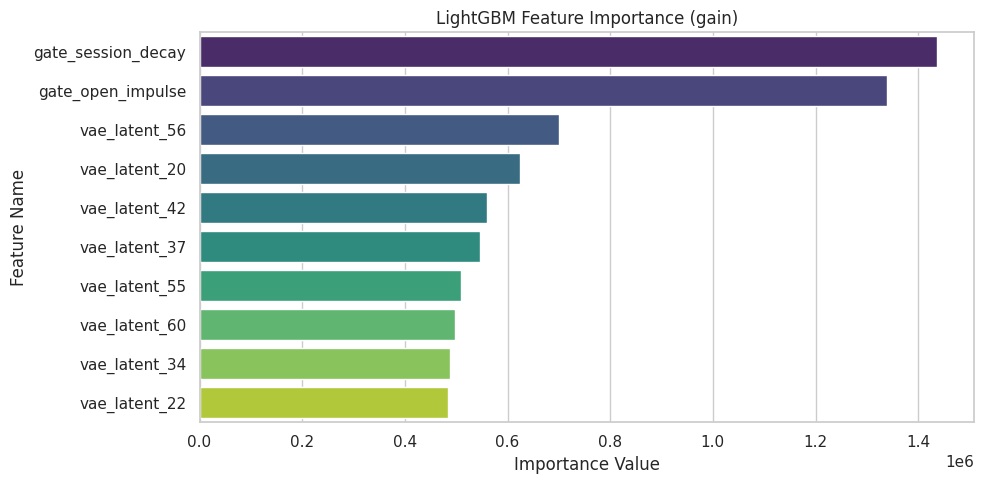

,feature,importance,norm_importance
0,gate_session_decay,1.436828e+06,0.061053
1,gate_open_impulse,1.340101e+06,0.056943
2,vae_latent_56,7.002203e+05,0.029754
3,vae_latent_20,6.250433e+05,0.026559
4,vae_latent_42,5.595174e+05,0.023775
...,...,...,...
65,vae_latent_54,1.476998e+05,0.006276
66,vae_latent_0,1.445844e+05,0.006144
67,is_am,1.430484e+05,0.006078
68,vae_latent_28,1.383007e+05,0.005877


In [272]:
def show_feature_importance(model, importance_type='gain', top_n=10, plot=True):
    """
    提取并可视化 LightGBM 特征重要性
    Args:
        model: 训练好的 LGBM Booster 对象
        importance_type: 'gain' (增益, 推荐) 或 'split' (分裂次数)
        top_n: 显示前 N 个特征
        plot: 是否绘图
    Returns:
        pd.DataFrame: 包含特征名和重要性的 DataFrame
    """
    # 1. 获取特征名和重要性数值
    feature_names = model.feature_name()
    importance_values = model.feature_importance(importance_type=importance_type)
    
    # 2. 构建 DataFrame 并排序
    imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance_values
    }).sort_values(by='importance', ascending=False).reset_index(drop=True)
    
    # 3. 计算相对重要性 (百分比)
    imp_df['norm_importance'] = imp_df['importance'] / imp_df['importance'].sum()
    
    # 4. 打印 Top N
    print(f"\n>>> Top {top_n} Feature Importance ({importance_type}):")
    print(imp_df.head(top_n))
    
    # 5. 绘图
    if plot:
        plt.figure(figsize=(10, int(top_n * 0.5)))
        sns.barplot(x='importance', y='feature', data=imp_df.head(top_n), palette='viridis')
        plt.title(f'LightGBM Feature Importance ({importance_type})')
        plt.xlabel('Importance Value')
        plt.ylabel('Feature Name')
        plt.tight_layout()
        plt.show()
        
    return imp_df

show_feature_importance(final_model)

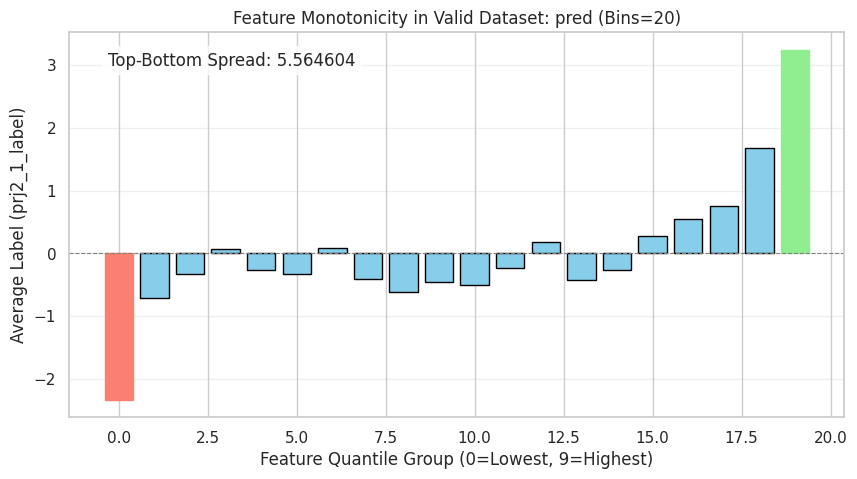

In [568]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_feature_spread(df, feature_col, label_col, quantile=0.1, group_by_day=True, day_col='trade_day'):
    """
    计算特征 Top N% 和 Bottom N% 的 Label 均值差 (Long-Short Spread)
    
    Args:
        df: DataFrame
        feature_col: 特征列名
        label_col: 标签列名 (预测目标，如收益率)
        quantile: 前后百分比 (默认 0.1，即 10%)
        group_by_day: 是否按天分组计算 (强烈建议 True，防止不同日期的市场Beta干扰)
        day_col: 日期列名 (当 group_by_day=True 时必填)
        
    Returns:
        dict: 包含 spread, top_mean, bottom_mean 的字典
    """
    
    # 内部函数：处理单个 Group 或整个 DataFrame
    def _calc_single_group(sub_df):
        # 去除空值
        sub_df = sub_df.dropna(subset=[feature_col, label_col])
        if len(sub_df) == 0:
            return pd.Series({'top': np.nan, 'bottom': np.nan, 'spread': np.nan})
            
        # 确定切分点
        n = len(sub_df)
        k = int(n * quantile)
        
        if k == 0: # 数据太少不足以切分
            return pd.Series({'top': np.nan, 'bottom': np.nan, 'spread': np.nan})
        
        # 按特征排序
        # ascending=True: 头部是小值(Bottom), 尾部是大值(Top)
        sorted_df = sub_df.sort_values(by=feature_col, ascending=True)
        
        # 提取 Bottom (特征最小的 10%)
        bottom_part = sorted_df.iloc[:k]
        # 提取 Top (特征最大的 10%)
        top_part = sorted_df.iloc[-k:]
        
        # 计算 Label 均值
        bottom_mean = bottom_part[label_col].mean()
        top_mean = top_part[label_col].mean()
        
        return pd.Series({
            'top_mean': top_mean,
            'bottom_mean': bottom_mean,
            'spread': top_mean - bottom_mean
        })

    # --- 模式 A: 按天分组计算 (推荐) ---
    if group_by_day:
        if day_col not in df.columns:
            raise ValueError(f"按天分组模式下，DataFrame 必须包含 '{day_col}' 列")
            
        print(f"正在按 {day_col} 分组计算每日 Spread...")
        daily_stats = df.groupby(day_col).apply(_calc_single_group)
        
        # 计算所有天数的平均值
        final_stats = daily_stats.mean()
        
        # 也可以返回 daily_stats 以便画出 spread 的时序图
        return {
            'spread': final_stats['spread'],
            'top_mean': final_stats['top_mean'], 
            'bottom_mean': final_stats['bottom_mean'],
            'daily_data': daily_stats # 附带每日详情
        }

    # --- 模式 B: 全局混合计算 (仅用于快速查看分布) ---
    else:
        result = _calc_single_group(df)
        return result.to_dict()

# ==========================================
# 2. 辅助：可视化函数 (分组柱状图)
# ==========================================
def plot_quantile_performance(df, feature_col, label_col, n_bins=20):
    """
    画出特征分层后的单调性柱状图
    """
    df_clean = df.dropna(subset=[feature_col, label_col]).copy()
    
    # 将特征分为 N 组
    # labeling=False 返回 0, 1, ... 9
    df_clean['group'] = pd.qcut(df_clean[feature_col], n_bins, labels=False, duplicates='drop')
    
    # 计算每组的 Label 均值
    group_means = df_clean.groupby('group')[label_col].mean() - df_clean[label_col].mean()
    
    plt.figure(figsize=(10, 5))
    bars = plt.bar(group_means.index, group_means.values, color='skyblue', edgecolor='black')
    
    # 标记最高和最低组
    bars[0].set_color('salmon') # Bottom 10%
    bars[-1].set_color('lightgreen') # Top 10%
    
    plt.title(f"Feature Monotonicity in Valid Dataset: {feature_col} (Bins={n_bins})")
    plt.xlabel("Feature Quantile Group (0=Lowest, 9=Highest)")
    plt.ylabel(f"Average Label ({label_col})")
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.grid(axis='y', alpha=0.3)
    
    # 计算简单的 spread
    spread = group_means.iloc[-1] - group_means.iloc[0]
    plt.text(0.05, 0.95, f"Top-Bottom Spread: {spread:.6f}", 
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))
    
    plt.show()

# ==========================================
# 使用示例
# ==========================================
if __name__ == "__main__":
    
    plot_quantile_performance(valid_new, 'pred', 'prj2_1_label', n_bins=20)

In [544]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

def calculate_decile_means(df, factor_cols, label_col):
    """
    计算因子十分位分组的 Label 均值
    
    Args:
        df: 包含因子和 Label 的 DataFrame
        factor_cols: 因子列名列表
        label_col: Label 列名
        
    Returns:
        pd.DataFrame: Index为因子名，Columns为 Decile_1 到 Decile_10
    """
    stats_dict = {}
    
    # 使用 tqdm 显示进度
    for factor in tqdm(factor_cols, desc="Grouping Factors"):
        try:
            # 1. 剔除因子或Label为空的行 (可选，视数据质量而定)
            curr_df = df[[factor, label_col]].dropna()
            
            if len(curr_df) < 10: # 数据太少跳过
                continue
                
            # 2. qcut 分组
            # labels=False: 返回 0-9 的整数索引
            # duplicates='drop': 如果因子有大量重复值导致无法分成10组，会自动合并组
            bins = pd.qcut(curr_df[factor], 10, labels=False, duplicates='drop')
            
            # 3. 计算各组 Label 均值
            group_means = curr_df.groupby(bins)[label_col].mean()
            
            # 4. 强制重新索引到 0-9
            # 这一步是为了处理 duplicates='drop' 导致少于 10 组的情况，以及对齐格式
            # 缺失的组会填充 NaN
            group_means = group_means.reindex(range(10))
            
            stats_dict[factor] = group_means
            
        except Exception as e:
            print(f"Error processing {factor}: {e}")
            
    # 5. 转换为 DataFrame (转置，使得 Index 是因子)
    result_df = pd.DataFrame(stats_dict).T
    
    # 6. 重命名列名 (1-10)
    result_df.columns = [f'D{i+1}' for i in range(10)]
    
    # 7. 计算多空收益差 (Spread: D10 - D1) 和 单调性分数 (可选)
    # 这里的 D10 是最大值组，D1 是最小值组
    result_df['Spread'] = result_df['D10'] - result_df['D1']
    
    return result_df
factor_test = pd.read_pickle("/home/zyyuan/project2/factor_all_test.pkl")
res_test = calculate_decile_means(factor_test,factordata.columns[86:],'label')
res_test['score'] = res_test['Spread'].abs()
res_test

Grouping Factors: 100%|██████████| 241/241 [00:00<00:00, 259.94it/s]


,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,Spread,score
order_imbalance,1.135814,0.824382,0.755343,0.845245,0.670790,0.697205,0.568400,0.497626,0.421034,0.540472,-0.595342,0.595342
OI_MA_10,1.177137,0.956602,0.762611,0.752619,0.753990,0.619860,0.672575,0.461766,0.367724,0.431457,-0.745681,0.745681
OI_MA_60,1.107299,1.067679,0.944473,0.874557,0.582917,0.713911,0.582007,0.478204,0.270842,0.334513,-0.772786,0.772786
OI_MA_120,1.045297,1.102273,1.059209,0.869244,0.737424,0.698673,0.559154,0.352022,0.266236,0.270277,-0.775020,0.775020
OI_MA_300,1.020763,1.148735,1.095919,1.019041,0.795450,0.678376,0.568819,0.307677,0.224206,0.082266,-0.938497,0.938497
...,...,...,...,...,...,...,...,...,...,...,...,...
ma20,0.613028,0.196958,0.168322,0.411365,0.601661,0.592749,0.275430,-0.001608,1.114289,2.500967,1.887939,1.887939
upper_bb,1.720221,0.846010,0.832408,0.889266,0.826954,0.938366,0.922426,0.713236,0.372950,-1.588676,-3.308897,3.308897
lower_bb,2.833288,1.516074,0.814322,0.637455,0.395441,0.409317,0.188663,0.146622,0.016774,-0.484795,-3.318084,3.318084
turnover_5min,0.169108,0.281155,0.427450,0.389936,0.513479,0.681341,0.856958,0.882004,1.396831,1.343048,1.173939,1.173939


In [564]:
res_test.loc['PSY_60']

D1       -0.635777
D2       -0.403320
D3       -0.017403
D4        0.049680
D5        0.254334
D6        0.646502
D7        0.911689
D8        1.473766
D9        2.089933
D10       2.405185
Spread    3.040961
score     3.040961
Name: PSY_60, dtype: float32